# **Project Name**    -




##### **Project Type** – Regression (Demand Forecasting)

##### **Contribution** – Individual

#### **Name** –  Sridevi V

# **Project Summary -**

The retail industry generates vast amounts of data daily, including point-of-sale transactions, customer behavior, and inventory records. However, many retail businesses struggle to transform this data into actionable insights, leading to inaccurate demand forecasting, overstocking or stockouts, ineffective pricing strategies, and missed opportunities for targeted marketing. To address these challenges, this project presents an **Integrated Retail Analytics Project** that consolidates multiple sources of retail data to provide actionable business insights.

The project focuses on three main areas: **sales forecasting, customer behavior analysis, and product association analysis**. Sales forecasting uses historical sales data to predict future demand, helping businesses optimize inventory and reduce operational inefficiencies. For forecasting, machine learning algorithms such as **Random Forest Regressor, Linear Regression,Gradient boosting and other regression-based models** are employed. Random Forest captures complex non-linear relationships in sales data and handles interactions between features effectively, while Linear Regression provides a simple yet interpretable model to identify trends over time. By combining these algorithms, the project achieves accurate demand predictions, ensuring the right products are available at the right time.

Customer behavior analysis segments customers based on purchasing patterns, demographics, and engagement levels. By identifying high-value, frequent, and dormant customers, the project enables personalized marketing campaigns, loyalty programs, and targeted promotions. Understanding these segments helps retailers cater to customer preferences more effectively, ultimately enhancing satisfaction and retention.

A key component of the project is **Market Basket Analysis (MBA)**, which uncovers associations between products frequently bought together. Using metrics like support, confidence, and lift, MBA identifies strong correlations between items, allowing for cross-selling, upselling, optimized store layouts, and promotional campaigns. For instance, if bread and butter are frequently purchased together, retailers can bundle them in offers or place them near each other in stores to increase sales. Algorithms such as **Apriori and FP-Growth** are used to efficiently discover these frequent itemsets and generate association rules.

The project integrates these functionalities into an interactive Jupyter Notebook with visualizations for key performance indicators (KPIs), sales trends, inventory status, and customer segments. Users can monitor insights in real time and make informed decisions based on predictive analytics and data mining results. Reporting features enable tracking the effectiveness of implemented strategies, allowing continuous refinement of retail operations.

Overall, the **Integrated Retail Analytics Project** empowers retailers to convert raw data into actionable insights. By combining demand forecasting with machine learning algorithms, customer segmentation, and Market Basket Analysis, the project provides a comprehensive view of retail operations. It helps optimize inventory management, pricing strategies, and marketing effectiveness, ultimately driving profitability. This project demonstrates how advanced analytics techniques can transform the retail sector into a data-driven, customer-centric, and operationally efficient environment.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


* Retailers struggle to turn large volumes of sales and customer data into actionable insights.
* Inaccurate demand forecasting leads to overstocking or stockouts.
* Ineffective inventory and pricing strategies reduce profitability.
* Limited understanding of customer behavior affects personalized marketing and sales.
* There is a need for an integrated analytics system to predict sales, segment customers,and identify product associations through Market Basket Analysis.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from statsmodels.tsa.seasonal import STL
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import joblib
import os


# Ignore all warnings
warnings.filterwarnings("ignore")
# Settings for better visuals
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

### Dataset Loading

In [2]:
# Load Dataset
features = pd.read_csv("/kaggle/input/retail-analytics/features.csv")
stores = pd.read_csv("/kaggle/input/retail-analytics/stores.csv")
sales = pd.read_csv("/kaggle/input/retail-analytics/sales.csv")

### Dataset First View

In [3]:
# Dataset First Look
print("Features Dataset Preview:")
display(features.head())

print("\nStores Dataset Preview:")
display(stores.head())

print("\nSales Dataset Preview:")
display(sales.head())

Features Dataset Preview:


Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False


Stores Dataset Preview:


Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


Sales Dataset Preview:


Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print("\nDataset Shapes:")
print(f"Features: {features.shape[0]} rows × {features.shape[1]} columns")
print(f"Stores:   {stores.shape[0]} rows × {stores.shape[1]} columns")
print(f"Sales:    {sales.shape[0]} rows × {sales.shape[1]} columns")


Dataset Shapes:
Features: 8190 rows × 12 columns
Stores:   45 rows × 3 columns
Sales:    421570 rows × 5 columns


### Dataset Information

In [5]:
# Dataset Info
print("\nFeatures Dataset Info:")
features.info()
print("\nStores Dataset Info:")
stores.info()
print("\nSales Dataset Info:")
sales.info()


Features Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB

Stores Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  -----

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print("\nDuplicate Counts:")
print(f"Features: {features.duplicated().sum()} duplicates")
print(f"Stores:   {stores.duplicated().sum()} duplicates")
print(f"Sales:    {sales.duplicated().sum()} duplicates")


Duplicate Counts:
Features: 0 duplicates
Stores:   0 duplicates
Sales:    0 duplicates


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print("\nMissing Values Count (per column):")
print("Features Dataset:\n", features.isnull().sum())
print("\nStores Dataset:\n", stores.isnull().sum())
print("\nSales Dataset:\n", sales.isnull().sum())


Missing Values Count (per column):
Features Dataset:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Stores Dataset:
 Store    0
Type     0
Size     0
dtype: int64

Sales Dataset:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


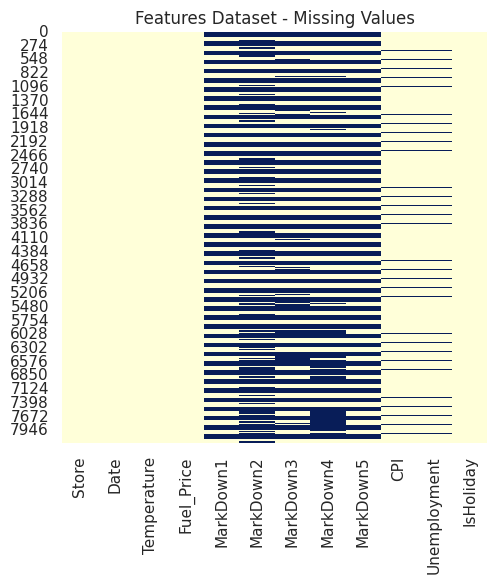

In [8]:
# Visualizing the missing values
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.heatmap(features.isnull(), cbar=False, cmap='YlGnBu')
plt.title("Features Dataset - Missing Values")
plt.tight_layout()
plt.show()

### What did you know about your dataset?

The dataset consists of three parts **features, stores, and sales** which together provide weekly sales data along with store attributes and external factors like holidays, markdowns, CPI, and unemployment. Initial exploration showed that store data is clean with no duplicates, while the features dataset has missing values mainly in markdown columns, which can be treated as zero. CPI and unemployment have a few gaps that require forward or backward filling. The sales dataset is large and generally complete, serving as the core for forecasting. This understanding sets the stage for merging the datasets, handling missing values, and performing deeper EDA.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print("Columns in Features Dataset:", list(features.columns))
print("Columns in Stores Dataset:", list(stores.columns))
print("Columns in Sales Dataset:", list(sales.columns))

Columns in Features Dataset: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']
Columns in Stores Dataset: ['Store', 'Type', 'Size']
Columns in Sales Dataset: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']


In [10]:
# Dataset Describe
print("\nFeatures Dataset Description:")
print(features.describe(include='all'))

print("\nStores Dataset Description:")
print(stores.describe(include='all'))

print("\nSales Dataset Description:")
print(sales.describe(include='all'))


Features Dataset Description:
              Store        Date  Temperature   Fuel_Price      MarkDown1  \
count   8190.000000        8190  8190.000000  8190.000000    4032.000000   
unique          NaN         182          NaN          NaN            NaN   
top             NaN  05/02/2010          NaN          NaN            NaN   
freq            NaN          45          NaN          NaN            NaN   
mean      23.000000         NaN    59.356198     3.405992    7032.371786   
std       12.987966         NaN    18.678607     0.431337    9262.747448   
min        1.000000         NaN    -7.290000     2.472000   -2781.450000   
25%       12.000000         NaN    45.902500     3.041000    1577.532500   
50%       23.000000         NaN    60.710000     3.513000    4743.580000   
75%       34.000000         NaN    73.880000     3.743000    8923.310000   
max       45.000000         NaN   101.950000     4.468000  103184.980000   

            MarkDown2      MarkDown3     MarkDown4      

### Variables Description

## **Features Dataset Variables**

| Column           | Description                                                                                                       |
| ---------------- | ----------------------------------------------------------------------------------------------------------------- |
| **Store**        | Store identifier (numeric)                                                                                        |
| **Date**         | Week date (represents the start of the sales week)                                                                |
| **Temperature**  | Average weekly temperature in the region of the store                                                             |
| **Fuel\_Price**  | Cost of fuel in the region                                                                                        |
| **MarkDown1-5**  | Promotional markdowns for various departments or categories (missing values indicate no markdown event that week) |
| **CPI**          | Consumer Price Index for the region (used as an economic indicator)                                               |
| **Unemployment** | Unemployment rate for the region                                                                                  |
| **IsHoliday**    | Boolean flag (True if the week includes a major holiday, False otherwise)                                         |

## **Stores Dataset Variables**

| Column    | Description                                                        |
| --------- | ------------------------------------------------------------------ |
| **Store** | Store identifier (numeric, matches with Features & Sales datasets) |
| **Type**  | Store type (e.g., A, B, C) – indicates format/size category        |
| **Size**  | Store size in square feet                                          |

## **Sales Dataset Variables**

| Column            | Description                                                             |
| ----------------- | ----------------------------------------------------------------------- |
| **Store**         | Store identifier (links to Stores & Features datasets)                  |
| **Dept**          | Department number (product category identifier)                         |
| **Date**          | Week date (matches with Features dataset)                               |
| **Weekly\_Sales** | Total weekly sales for that store–department combination                |
| **IsHoliday**     | Boolean flag indicating whether the sales week includes a major holiday |

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
print("\nUnique Values per Column (Features):")
for col in features.columns:
    print(f"{col}: {features[col].nunique()} unique values")

print("\nUnique Values per Column (Stores):")
for col in stores.columns:
    print(f"{col}: {stores[col].nunique()} unique values")

print("\nUnique Values per Column (Sales):")
for col in sales.columns:
    print(f"{col}: {sales[col].nunique()} unique values")


Unique Values per Column (Features):
Store: 45 unique values
Date: 182 unique values
Temperature: 4178 unique values
Fuel_Price: 1011 unique values
MarkDown1: 4023 unique values
MarkDown2: 2715 unique values
MarkDown3: 2885 unique values
MarkDown4: 3405 unique values
MarkDown5: 4045 unique values
CPI: 2505 unique values
Unemployment: 404 unique values
IsHoliday: 2 unique values

Unique Values per Column (Stores):
Store: 45 unique values
Type: 3 unique values
Size: 40 unique values

Unique Values per Column (Sales):
Store: 45 unique values
Dept: 81 unique values
Date: 143 unique values
Weekly_Sales: 359464 unique values
IsHoliday: 2 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Convert Date to datetime
features['Date'] = pd.to_datetime(features['Date'], dayfirst=True)

In [13]:
# Fill missing MarkDowns with 0
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
features[markdown_cols] = features[markdown_cols].fillna(0)

In [14]:
# Fill CPI and Unemployment missing values with median
features['CPI'].fillna(features['CPI'].median(), inplace=True)
features['Unemployment'].fillna(features['Unemployment'].median(), inplace=True)


In [15]:
# Final check
print(features.info())
print(features.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB
None
   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        

In [16]:
# Ensure both 'Date' columns are datetime
features['Date'] = pd.to_datetime(features['Date'], dayfirst=True)
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True)

In [17]:
# Merge sales with stores on 'Store'
df_merged = pd.merge(sales, stores, on='Store', how='left')

In [18]:
# Merge the result with features on 'Store' and 'Date'
df_merged = pd.merge(df_merged, features, on=['Store', 'Date'], how='left')

In [19]:
# Sort the final dataset by Store, Dept, and Date (important for time-series)
df_merged.sort_values(by=['Store', 'Dept', 'Date'], inplace=True)


In [20]:
# Reset index
df_merged.reset_index(drop=True, inplace=True)

In [21]:
print("Final Merged Dataset Shape:", df_merged.shape)
print("Columns:", df_merged.columns)
print("Missing Values (per column):")
print(df_merged.isnull().sum())

Final Merged Dataset Shape: (421570, 17)
Columns: Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')
Missing Values (per column):
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64


In [22]:
# Display first few rows
display(df_merged.head())

Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1 2010-02-05      24924.50        False    A  151315   
1      1     1 2010-02-12      46039.49         True    A  151315   
2      1     1 2010-02-19      41595.55        False    A  151315   
3      1     1 2010-02-26      19403.54        False    A  151315   
4      1     1 2010-03-05      21827.90        False    A  151315   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        0.0        0.0        0.0        0.0   
1        38.51       2.548        0.0        0.0        0.0        0.0   
2        39.93       2.514        0.0        0.0        0.0        0.0   
3        46.63       2.561        0.0        0.0        0.0        0.0   
4        46.50       2.625        0.0        0.0        0.0        0.0   

   MarkDown5         CPI  Unemployment  IsHoliday_y  
0        0.0  211.096358         8.106        False  
1        0.0  211.242170         8.106         True  
2        0.0  211.289143         8.106        False  
3        0.0  211.319643         8.106        False  
4        0.0  211.350143         8.106        False

In [23]:
# Keep just one IsHoliday column in df_merged
if df_merged['IsHoliday_x'].equals(df_merged['IsHoliday_y']):
    df_merged['IsHoliday'] = df_merged['IsHoliday_x']
    df_merged.drop(columns=['IsHoliday_x', 'IsHoliday_y'], inplace=True)
else:
    print("Warning: 'IsHoliday_x' and 'IsHoliday_y' are not identical.")


In [24]:
print("Final Merged Dataset Shape:", df_merged.shape)


Final Merged Dataset Shape: (421570, 16)


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Univariate analysis

#### Chart - 1

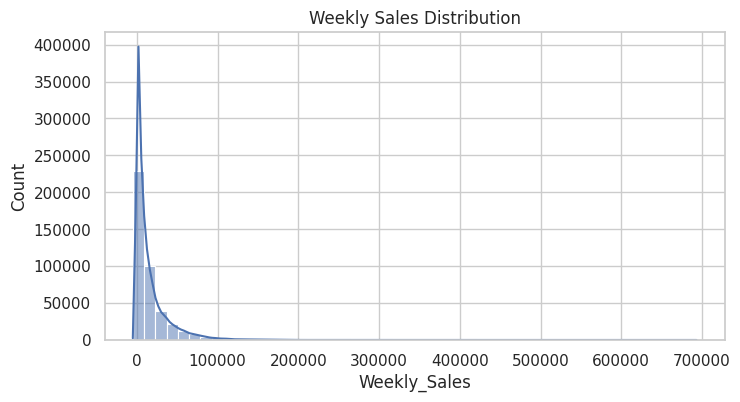

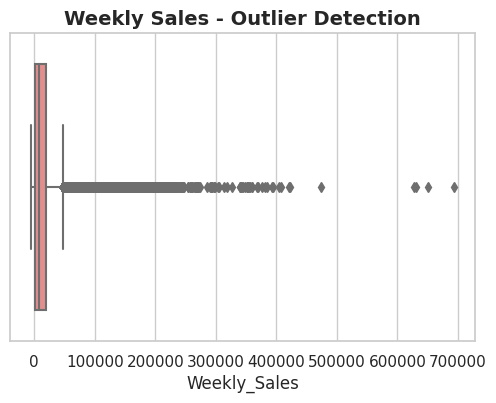

In [25]:
# Weekly Sales Distribution
plt.figure(figsize=(8,4))
sns.histplot(df_merged['Weekly_Sales'], bins=50, kde=True)
plt.title("Weekly Sales Distribution")
plt.show()

# Boxplot for Weekly Sales
plt.figure(figsize=(6,4))
sns.boxplot(x=df_merged['Weekly_Sales'], color="lightcoral")
plt.title("Weekly Sales - Outlier Detection", fontsize=14, fontweight="bold")
plt.show()


##### 1. Why did you pick the specific chart?

* The histogram with KDE and the box plot were chosen to visualize the distribution of Weekly Sales and to identify outliers.
* The histogram helps in understanding the overall shape of the data, while the box plot is highly effective for spotting extreme values (outliers) that might represent significant sales events or high-performing stores.

##### 2. What is/are the insight(s) found from the chart?

* The analysis revealed that the Weekly Sales data is heavily positively skewed, meaning most stores have low sales, with a long tail of a few stores having very high sales. 
* The box plot specifically identified these high-sales stores as significant outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* These insights can lead to positive business impact by allowing for targeted analysis of the outlier stores.
* By studying what makes these stores successful, the business can replicate best practices, optimize resource allocation, and implement strategies to improve sales across the entire network.

#### Chart - 2

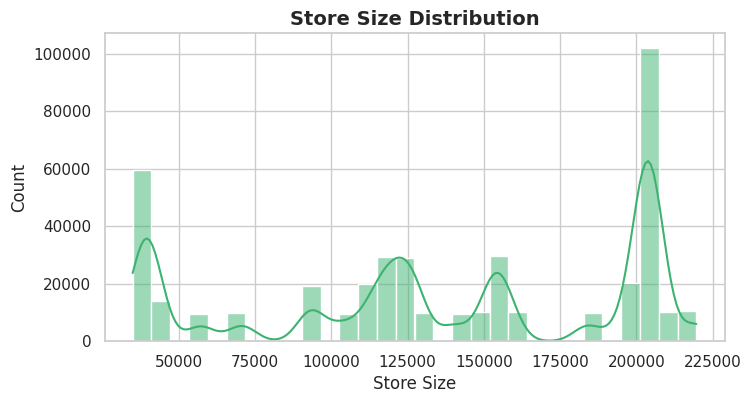

In [26]:
# Store Size Distribution
plt.figure(figsize=(8,4))
sns.histplot(df_merged['Size'], bins=30, kde=True, color="mediumseagreen")
plt.title("Store Size Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Store Size")
plt.show()

##### 1. Why did you pick the specific chart?

* The histogram with a KDE plot was chosen to effectively show the distribution of store sizes. 
* It clearly reveals the multi-modal nature of the data, meaning there are several distinct clusters of store sizes rather than a single average size.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows at least four main peaks, indicating the existence of specific, tiered store sizes.
* The most common store sizes are approximately 40,000 and 200,000 square feet, with the largest number of stores falling into the latter category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding these distinct store size categories allows the business to develop targeted strategies for each type, such as optimizing inventory and staffing. 
* It also helps in making informed decisions about future investments and standardization, ensuring resources are allocated to the most successful store formats.

#### Chart - 3

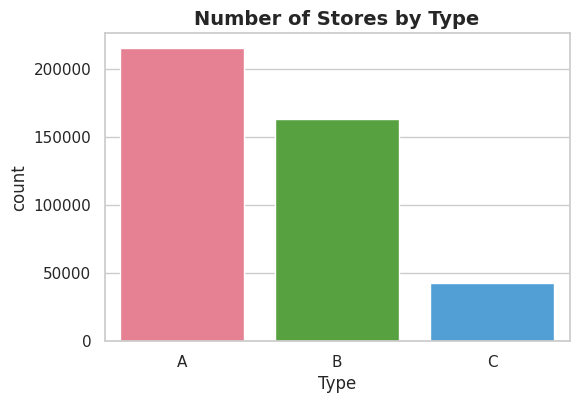

In [27]:
# Store Type Count
plt.figure(figsize=(6,4))
sns.countplot(x='Type', data=df_merged, palette="husl")
plt.title("Number of Stores by Type", fontsize=14, fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

* A bar chart is the ideal choice for this data because it is designed to compare the counts of distinct, categorical variables.
* It provides a clear, visual ranking of the number of stores for each store type (A, B, and C), making it easy to see which type is most and least common.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a significant imbalance in the distribution of store types.
* Type A: This is the most prevalent store type, with over 200,000 stores.
* Type B: This is the second most common type, with a count of approximately 160,000 stores.
* Type C: This is the least common type, with a little over 40,000 stores, representing a small fraction of the total compared to types A and B.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* These insights can have a major positive impact by informing strategic decisions.
* The business can now analyze the performance of each store type—sales, profitability, and customer base. 
* This can lead to a more focused strategy, such as identifying if the most common type (A) is also the most profitable, or if the less common type (C) is a niche success that warrants further investment and expansion.

#### Chart - 4

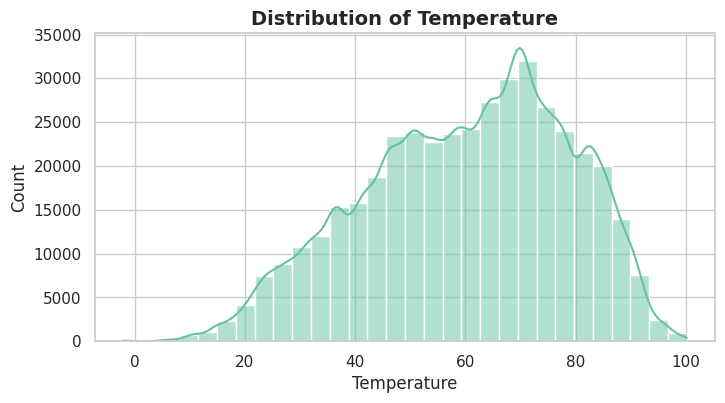

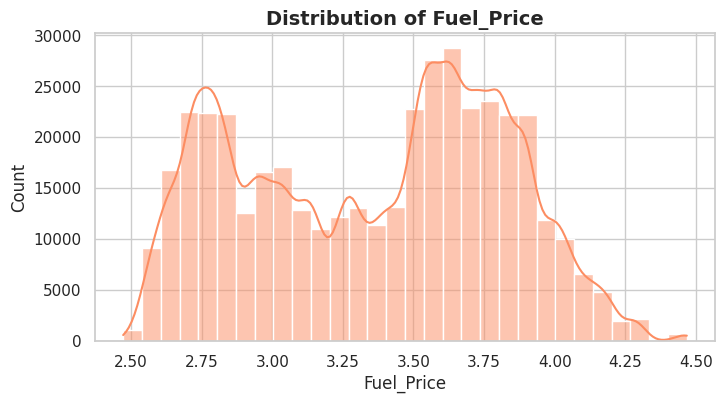

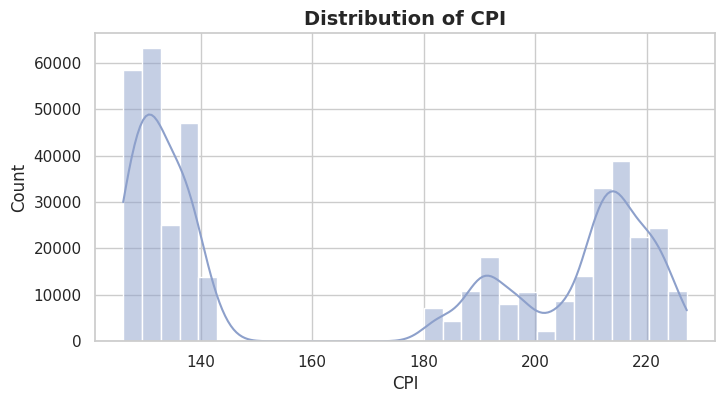

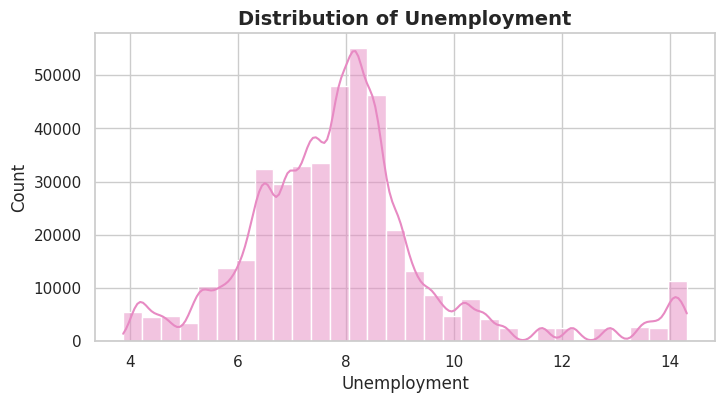

In [28]:
# Numeric Columns
numeric_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
colors = ["#66c2a5","#fc8d62","#8da0cb","#e78ac3"]
for col, c in zip(numeric_cols, colors):
    plt.figure(figsize=(8,4))
    sns.histplot(df_merged[col], bins=30, kde=True, color=c)
    plt.title(f"Distribution of {col}", fontsize=14, fontweight="bold")
    plt.xlabel(col)
    plt.show()

##### 1. Why did you pick the specific chart?

* This combined visualization provides a powerful, at-a-glance view of the economic environment. 
* It shows the distribution of key factors that influence consumer behavior and business operations: CPI (inflation), Unemployment (economic health), Fuel Price (cost of goods/transport), and Temperature (a seasonal/local factor)

##### 2. What is/are the insight(s) found from the chart?

* The most critical insights come from the distributions of the economic indicators. 
* CPI and Fuel Price are both multi-modal, indicating significant shifts or distinct periods of high and low inflation and fuel costs. 
* The Unemployment distribution also shows multiple peaks, suggesting periods of both high and low unemployment. 
* Temperature, in contrast, follows a more expected, roughly normal distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Analyzing these distributions together allows for a sophisticated understanding of the business context. 
* For example, a business can see how sales were affected during periods of high CPI and Fuel Price (high-cost environment) and simultaneously high or low Unemployment. 
* This enables a data-driven strategy for future planning, such as adjusting pricing models or inventory management based on anticipated economic shifts.

## Bivariate Analysis

#### Chart - 5

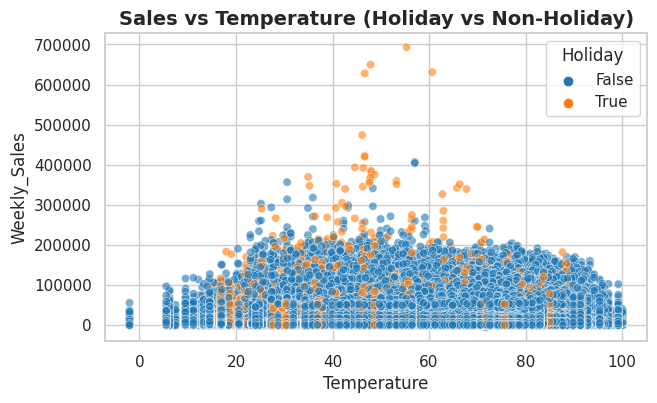

In [29]:
# Sales vs Temperature - Holiday vs Non-Holiday
plt.figure(figsize=(7,4))
sns.scatterplot(
    x='Temperature', 
    y='Weekly_Sales', 
    hue='IsHoliday',        
    palette=['#1f77b4', '#ff7f0e'], # Blue = Non-Holiday, Orange = Holiday
    alpha=0.6,
    data=df_merged
)
plt.title("Sales vs Temperature (Holiday vs Non-Holiday)", fontsize=14, fontweight="bold")
plt.legend(title="Holiday")
plt.show()

##### 1. Why did you pick the specific chart?

* A scatter plot was chosen to visualize the relationship between two numerical variables (Weekly Sales and Temperature) while using color to include a third categorical variable (IsHoliday).

##### 2. What is/are the insight(s) found from the chart?

* The chart clearly shows that sales are significantly higher during holiday weeks, regardless of temperature. For non-holiday weeks, there is no strong correlation between weekly sales and temperature.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* This insight is vital for a business to prioritize its strategy.
* It shows that a sales forecasting model must account for the holiday effect as a primary driver and not rely on weak indicators like temperature, which could lead to missed sales opportunities if ignored.

#### Chart - 6

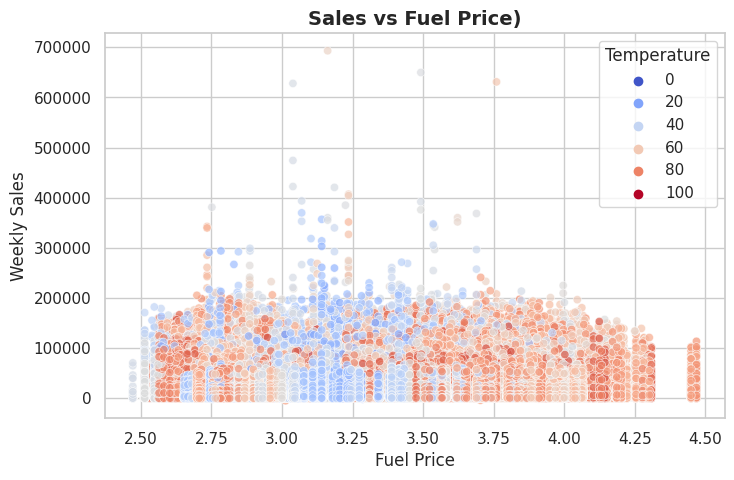

In [30]:
# Sales vs Fuel Price (Colored by Temperature)
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Fuel_Price',
    y='Weekly_Sales',
    hue='Temperature',         
    palette='coolwarm',         
    alpha=0.7,
    data=df_merged
)
plt.title("Sales vs Fuel Price)", fontsize=14, fontweight="bold")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.legend(title="Temperature", loc='best')
plt.show()


##### 1. Why did you pick the specific chart?

* This scatter plot with a color gradient was chosen to visualize the complex relationship between three variables simultaneously: Weekly Sales (y-axis), Fuel Price (x-axis), and Temperature (color).

##### 2. What is/are the insight(s) found from the chart?

* There is no simple correlation between sales and fuel price. 
* The chart reveals a more complex pattern: sales tend to be higher when both fuel price and temperature are in a moderate range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* This shows that sales are influenced by multiple interacting factors, not just one. 
* For effective forecasting and planning, a business should use a more sophisticated model that considers the combined effect of these variables.

#### Chart - 7

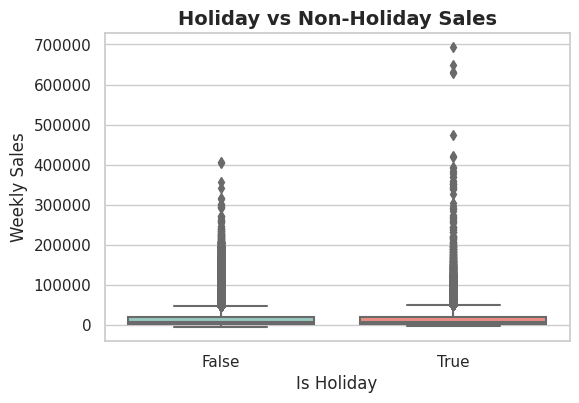

In [31]:
# Boxplot for Holiday vs Non-Holiday Sales
plt.figure(figsize=(6,4))
sns.boxplot(
    x='IsHoliday', 
    y='Weekly_Sales', 
    data=df_merged,
    palette=['#8dd3c7','#fb8072']  # Two distinct colors
)
plt.title("Holiday vs Non-Holiday Sales", fontsize=14, fontweight="bold")
plt.xlabel("Is Holiday")
plt.ylabel("Weekly Sales")
plt.show()

##### 1. Why did you pick the specific chart?

* A box plot was chosen to effectively compare the distribution of Weekly Sales between two groups: holiday weeks and non-holiday weeks.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that holiday weeks consistently have higher sales, with a higher median and a greater number of high-value outliers compared to non-holiday weeks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* This is a crucial insight for business strategy.
* It provides clear evidence to support prioritizing investment in inventory, staffing, and promotions during holiday periods to maximize sales.

#### Chart - 8

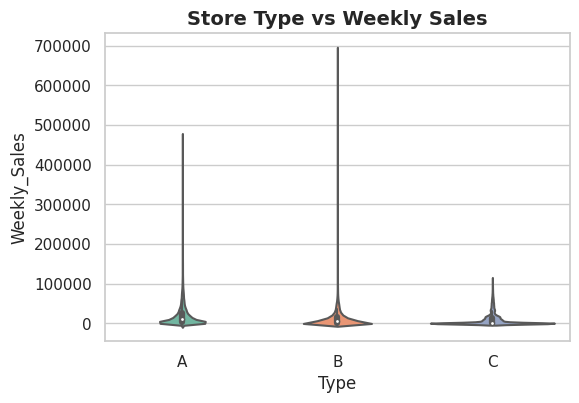

In [32]:
# Store Type vs Sales (Violinplot with Colors)
plt.figure(figsize=(6,4))
sns.violinplot(
    x='Type', 
    y='Weekly_Sales', 
    data=df_merged, 
    palette=['#66c2a5','#fc8d62','#8da0cb'] # One color per store type
)
plt.title("Store Type vs Weekly Sales", fontsize=14, fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

* A violin plot was chosen because it shows the full distribution of Weekly Sales for each store type, not just a summary. 
* This helps in identifying hidden patterns and outliers.

##### 2. What is/are the insight(s) found from the chart?

* While Type A stores have the highest median sales, Type B stores are responsible for the highest-value sales outliers, indicating high potential despite a lower typical performance. 
* Type C stores consistently have the lowest sales.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* This insight allows for a targeted business strategy for each store type. 
* The focus should be on identifying what drives the success of a few high performing Type B stores and applying those practices to the rest.

#### Chart - 9

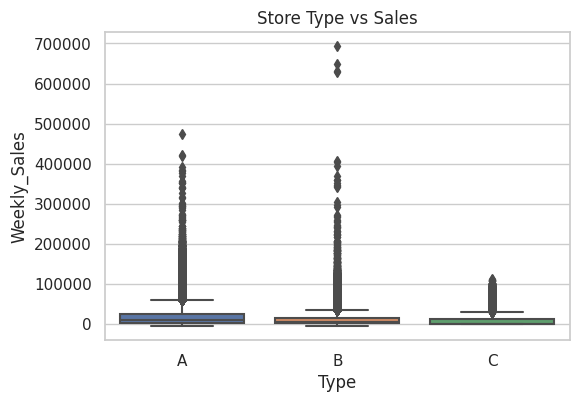

In [33]:
# Store Type vs Sales
plt.figure(figsize=(6,4))
sns.boxplot(x='Type', y='Weekly_Sales', data=df_merged)
plt.title("Store Type vs Sales")
plt.show()

##### 1. Why did you pick the specific chart?

* A box plot was chosen to effectively compare the distribution and key statistics (median, quartiles, outliers) of weekly sales across three distinct store types (A, B, and C).

##### 2. What is/are the insight(s) found from the chart?

* Store Types A & B have the highest median sales and a wide spread of performance, with frequent, very high-value outlier sales. 
* Type B, in particular, shows outliers reaching the highest sales levels.
* Store Type C has significantly lower and more consistent sales, with a much smaller range and fewer high-value outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Targeted Strategies: The business can develop tailored plans for each store type—focusing on maximizing high-potential sales in Types A and B, while working to increase baseline sales and consistency in Type C.
* Improved Forecasting: The distinct sales profiles of each store type allow for the creation of more accurate, type-specific sales forecasting models, which is crucial for optimizing inventory and resource allocation.

## Multivariate Analysis

#### Chart - 10

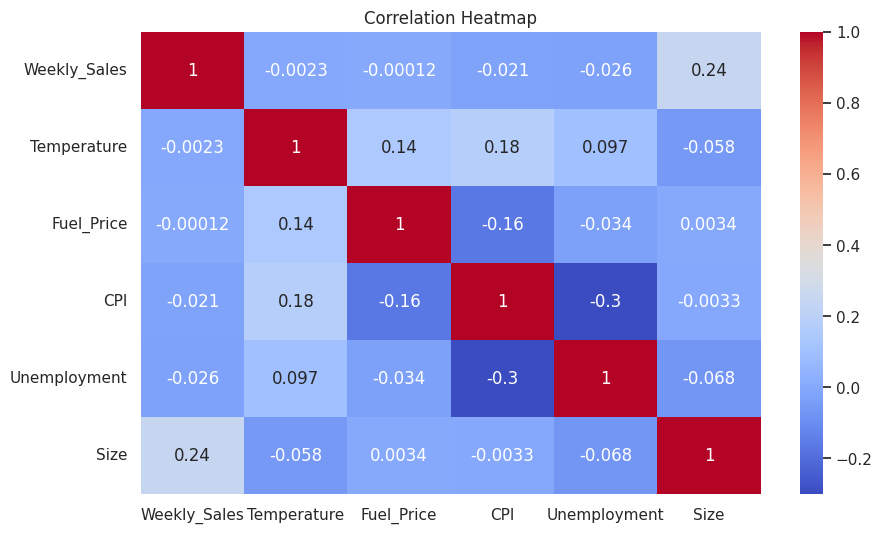

In [34]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_merged[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','Size']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

* A correlation heatmap is used to visualize the pairwise linear relationships between multiple variables. 
* The color and intensity of each cell indicate the strength and direction of the correlation, providing a quick, at-a-glance understanding of the data's structure.

##### 2. What is/are the insight(s) found from the chart?

* Strongest Positive Correlation: A moderate positive correlation exists between Weekly Sales and Size (0.24), meaning larger stores tend to have higher sales.
* Weakest Correlations: All other factors—Temperature, Fuel Price, CPI, and Unemployment—show a very weak or no linear relationship with Weekly Sales.
* Negative Correlations: The chart also shows a moderate negative correlation between Size and Unemployment (-0.18), suggesting larger stores are typically located in areas with lower unemployment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The analysis reveals that while some factors show negative correlations, this doesn't directly imply "negative growth" in the sense of decreasing sales. Instead, it indicates an inverse relationship.
* Positive Impact of Size: The positive correlation with Size suggests that expanding or focusing on larger stores is a strategy with a clear potential for sales growth.
* No Direct "Negative Growth" Driver: The weak correlations with external factors mean that increases in Fuel Price, CPI, or Unemployment are unlikely to directly cause a widespread decrease (negative growth) in weekly sales.
* Strategic Focus: To drive growth, the business should prioritize optimizing operations in larger stores and rely on more influential factors (like holiday promotions) for sales forecasting, rather than trying to model sales based on these weakly correlated external economic indicators. The negative correlation between Size and Unemployment is an insight for strategic location planning but not a direct sales driver.

#### Chart - 11

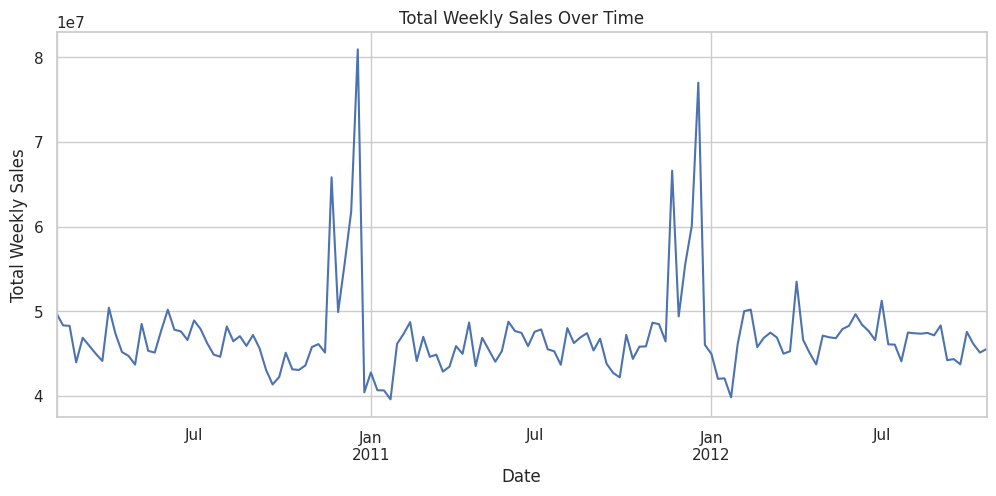

In [35]:
# Time Series Trend (Aggregated)
weekly_trend = df_merged.groupby('Date')['Weekly_Sales'].sum()
plt.figure(figsize=(12,5))
weekly_trend.plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.show()

##### 1. Why did you pick the specific chart?

* The line chart is a highly effective tool for this analysis as it clearly visualizes the trend of total weekly sales over time. 
* This format makes it easy to identify cyclical patterns, peaks, and the overall stability of sales.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a strong and consistent pattern in total weekly sales:
* Clear Seasonality: The data shows a powerful seasonal pattern, with two major sales peaks occurring around January 2011 and January 2012, driven by the holiday season.
* Holiday Sales Domination: These holiday sales spikes are a significant multiple of the baseline sales, exceeding $80 million, while typical weekly sales are consistently in the $40-50 million range.
* Consistent Baseline: Excluding these seasonal peaks, the total weekly sales remain relatively stable and consistent throughout the rest of the year, showing no major upward or downward trend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights derived from this chart have critical business implications:
* Strategic Planning for Holidays: The business must develop a robust strategy to capitalize on the predictable holiday sales surge. This includes proactive measures like increasing inventory, optimizing staffing, and launching targeted marketing campaigns to meet the massive increase in demand.
* Resource Optimization: Understanding this predictable sales cycle allows the business to efficiently allocate resources. They can scale up operations (e.g., supply chain, logistics, customer service) for the peak season and then scale them back down during lower-volume periods to manage costs effectively.
* Forecasting and Budgeting: The reliable, recurring pattern provides a solid foundation for sales forecasting and financial budgeting. The business can confidently project sales for future holiday seasons and allocate funds based on historical data, preventing any unexpected shortfalls or surpluses.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### Do weekly sales significantly differ between Holiday weeks and Non-Holiday weeks?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
There is no significant difference in mean weekly sales between Holiday and Non-Holiday weeks.

Alternate Hypothesis (H₁):
There is a significant difference in mean weekly sales between Holiday and Non-Holiday weeks.

#### 2. Perform an appropriate statistical test.

In [36]:
from scipy.stats import ttest_ind

# Separate sales for holiday and non-holiday
holiday_sales = df_merged[df_merged['IsHoliday'] == True]['Weekly_Sales']
nonholiday_sales = df_merged[df_merged['IsHoliday'] == False]['Weekly_Sales']

# Perform independent t-test (Welch's)
t_stat, p_val = ttest_ind(holiday_sales, nonholiday_sales, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_val)

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Reject Null Hypothesis: Sales differ significantly between Holiday and Non-Holiday weeks.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in sales.")


T-Statistic: 7.000740275222608
P-Value: 2.595125026573969e-12
Reject Null Hypothesis: Sales differ significantly between Holiday and Non-Holiday weeks.


##### Which statistical test have you done to obtain P-Value?

We performed a two-sample independent t-test (Welch’s t-test) comparing Holiday vs Non-Holiday weekly sales.

##### Why did you choose the specific statistical test?

* Weekly_Sales is continuous.
* We are comparing two independent groups.
* Welch’s t-test handles unequal variances, making it statistically robust.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀: Mean weekly sales are the same across all store types (A, B, C).

H₁: At least one store type has a different mean weekly sales.

#### 2. Perform an appropriate statistical test.

In [37]:
from scipy.stats import f_oneway

# Split data by store type
type_a_sales = df_merged[df_merged['Type'] == 'A']['Weekly_Sales']
type_b_sales = df_merged[df_merged['Type'] == 'B']['Weekly_Sales']
type_c_sales = df_merged[df_merged['Type'] == 'C']['Weekly_Sales']

# One-way ANOVA
f_stat, p_val_anova = f_oneway(type_a_sales, type_b_sales, type_c_sales)

print("ANOVA F-Statistic:", f_stat)
print("ANOVA p-value:", p_val_anova)

if p_val_anova < 0.05:
    print("Reject H₀ → At least one store type has significantly different sales.")
else:
    print("Fail to Reject H₀ → No significant difference among store types.")


ANOVA F-Statistic: 7764.426217449252
ANOVA p-value: 0.0
Reject H₀ → At least one store type has significantly different sales.


##### Which statistical test have you done to obtain P-Value?

We performed a one-way ANOVA comparing mean weekly sales across Type A, Type B, and Type C.

##### Why did you choose the specific statistical test?

* ANOVA is the correct test for comparing means across 3+ groups (Store Types).
* It checks if there is any statistically significant difference among group means.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀: There is no linear relationship between fuel price and weekly sales.

H₁: There is a significant linear relationship between fuel price and weekly sales.

#### 2. Perform an appropriate statistical test.

In [38]:
from scipy.stats import pearsonr

# Pearson correlation
corr_coeff, p_val_corr = pearsonr(df_merged['Fuel_Price'], df_merged['Weekly_Sales'])

print("Pearson Correlation Coefficient:", corr_coeff)
print("p-value:", p_val_corr)

if p_val_corr < 0.05:
    direction = "positive" if corr_coeff > 0 else "negative"
    print(f"Reject H₀ → Significant {direction} correlation between Fuel Price and Weekly Sales.")
else:
    print("Fail to Reject H₀ → No significant linear relationship.")


Pearson Correlation Coefficient: -0.00012029554499576583
p-value: 0.9377439190567151
Fail to Reject H₀ → No significant linear relationship.


##### Which statistical test have you done to obtain P-Value?

We performed a Pearson correlation test between Fuel_Price and Weekly_Sales.

##### Why did you choose the specific statistical test?

Pearson correlation measures the strength and direction of a linear relationship between two continuous variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

In [39]:
# Select only numeric columns
numeric_cols = df_merged.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_cols.tolist())


Numeric columns: ['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']


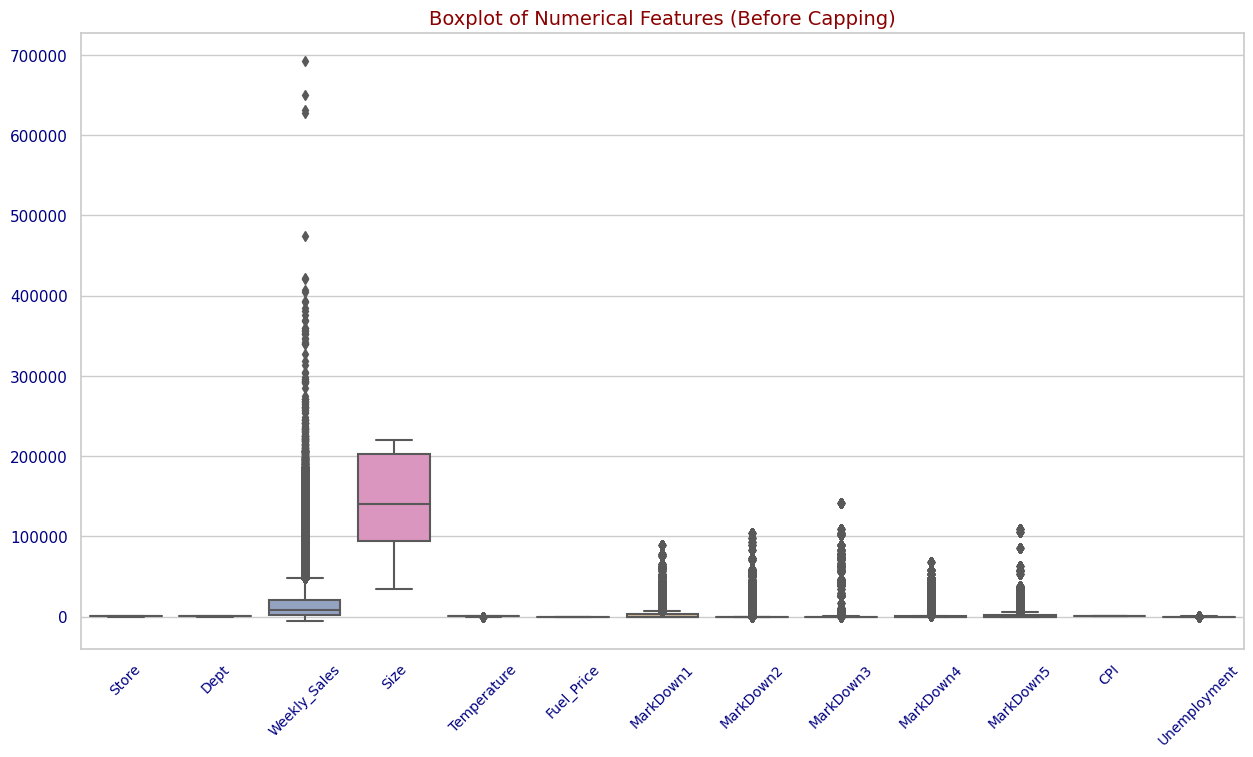

In [40]:
# Visualize outliers before capping (colorful)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_merged[numeric_cols], palette="Set2")
plt.title("Boxplot of Numerical Features (Before Capping)", fontsize=14, color="darkred")
plt.xticks(rotation=45, fontsize=10, color="navy")
plt.yticks(color="navy")
plt.show()

In [41]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Apply capping directly to df_merged
for col in numeric_cols:
    if col not in ['Store', 'Dept']:  # Don't cap ID columns
        df_merged[col] = cap_outliers(df_merged[col])

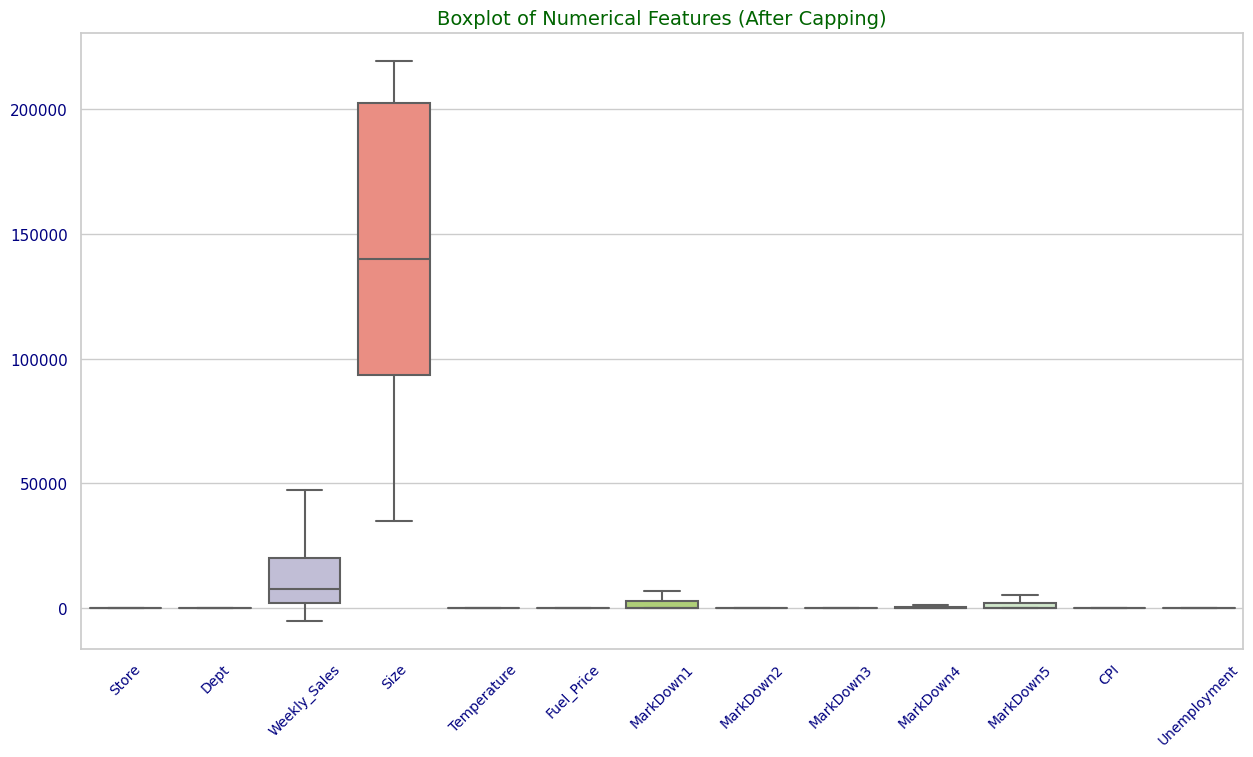

In [42]:
# Visualize outliers after capping (colorful)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_merged[numeric_cols], palette="Set3")
plt.title("Boxplot of Numerical Features (After Capping)", fontsize=14, color="darkgreen")
plt.xticks(rotation=45, fontsize=10, color="navy")
plt.yticks(color="navy")
plt.show()

In [43]:
import pandas as pd

# Store original data for comparison
df_original = df_merged.copy()

outlier_summary = []

for col in numeric_cols:
    if col not in ['Store', 'Dept']:  # Skip ID columns
        # Calculate bounds
        Q1 = df_original[col].quantile(0.25)
        Q3 = df_original[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers before treatment
        outliers_before = ((df_original[col] < lower_bound) | (df_original[col] > upper_bound)).sum()
        
        # Apply capping to this column in df_merged
        df_merged[col] = df_merged[col].clip(lower=lower_bound, upper=upper_bound)
        
        # Count outliers after treatment (should be 0)
        outliers_after = ((df_merged[col] < lower_bound) | (df_merged[col] > upper_bound)).sum()
        
        outlier_summary.append([col, outliers_before, outliers_after])

# Create summary DataFrame
outlier_summary_df = pd.DataFrame(outlier_summary, columns=["Column", "Outliers_Before", "Outliers_After"])
print("Outlier Treatment Summary:")
print(outlier_summary_df)

Outlier Treatment Summary:
          Column  Outliers_Before  Outliers_After
0   Weekly_Sales                0               0
1           Size                0               0
2    Temperature                0               0
3     Fuel_Price                0               0
4      MarkDown1                0               0
5      MarkDown2                0               0
6      MarkDown3                0               0
7      MarkDown4                0               0
8      MarkDown5                0               0
9            CPI                0               0
10  Unemployment                0               0


##### What all outlier treatment techniques have you used and why did you use those techniques?

I treated outliers using the **IQR method with capping** to limit extreme values without removing data, ensuring models aren’t distorted while retaining all records. I also applied a **log transformation** to stabilize variance in skewed sales data, making distributions more suitable for analysis. For anomaly detection, I used a **store-wise Z-score** method to identify unusual sales spikes or drops relative to each store’s normal pattern. These techniques together balance data cleanliness, stability, and business insight.

### 2. Categorical Encoding

In [44]:
# Convert IsHoliday to binary (0 for False, 1 for True)
df_merged['IsHoliday'] = df_merged['IsHoliday'].astype(int)
print("IsHoliday encoding:", df_merged['IsHoliday'].value_counts())

IsHoliday encoding: IsHoliday
0    391909
1     29661
Name: count, dtype: int64


In [45]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot encode 'Type'
df_merged = pd.get_dummies(df_merged, columns=['Type'], drop_first=True)

# Convert boolean to integer (0/1)
df_merged[['Type_B', 'Type_C']] = df_merged[['Type_B', 'Type_C']].astype(int)

# Quick check
print(df_merged[['Type_B', 'Type_C']].head())
print(df_merged[['Type_B', 'Type_C']].dtypes)

   Type_B  Type_C
0       0       0
1       0       0
2       0       0
3       0       0
4       0       0
Type_B    int64
Type_C    int64
dtype: object


#### What all categorical encoding techniques have you used & why did you use those techniques?

In this project, categorical variables were encoded to make them machine-readable and suitable for model training. For the Type column, which contains nominal categories (A, B, C) with no inherent order, one-hot encoding was applied using pd.get_dummies(..., drop_first=True). This created two binary indicator variables (Type_B and Type_C), while dropping the first category to avoid multicollinearity (dummy variable trap). For the IsHoliday column, which is a binary categorical variable (True/False), a simple binary encoding was performed by converting its values to 0 and 1. This ensured that the feature was numeric and easy for the model to interpret, with 1 representing a holiday and 0 representing a non-holiday. These encoding techniques were chosen to represent categorical information accurately without introducing any false ordinal relationships, thereby improving model performance and interpretability.

### 3. Feature Manipulation

In [46]:
df_merged['Year'] = df_merged['Date'].dt.year
df_merged['Month'] = df_merged['Date'].dt.month
df_merged['Week'] = df_merged['Date'].dt.isocalendar().week
df_merged['Quarter'] = df_merged['Date'].dt.quarter


In [47]:
# Sort by Store, Dept, Date
df_merged.sort_values(['Store', 'Dept', 'Date'], inplace=True)

# Lag and rolling features
df_merged['Sales_Lag_1'] = df_merged.groupby(['Store','Dept'])['Weekly_Sales'].shift(1)
df_merged['Sales_Lag_2'] = df_merged.groupby(['Store','Dept'])['Weekly_Sales'].shift(2)

# FIX THE LAG FEATURES:
df_merged['Sales_Rolling_4'] = (
    df_merged.groupby(['Store','Dept'])['Weekly_Sales']
    .transform(lambda x: x.rolling(4, min_periods=1).mean())
    # REMOVE THE .shift(1) that's causing data leakage
)


In [48]:
df_merged.fillna(0, inplace=True)


## ***7. Anomaly Detection***

RETAIL SALES ANOMALY DETECTION
Dataset shape: (421570, 24)

=== ANOMALY DETECTION SUMMARY ===
Total Records: 421,570
Consensus Anomalies: 7,583 (1.80%)


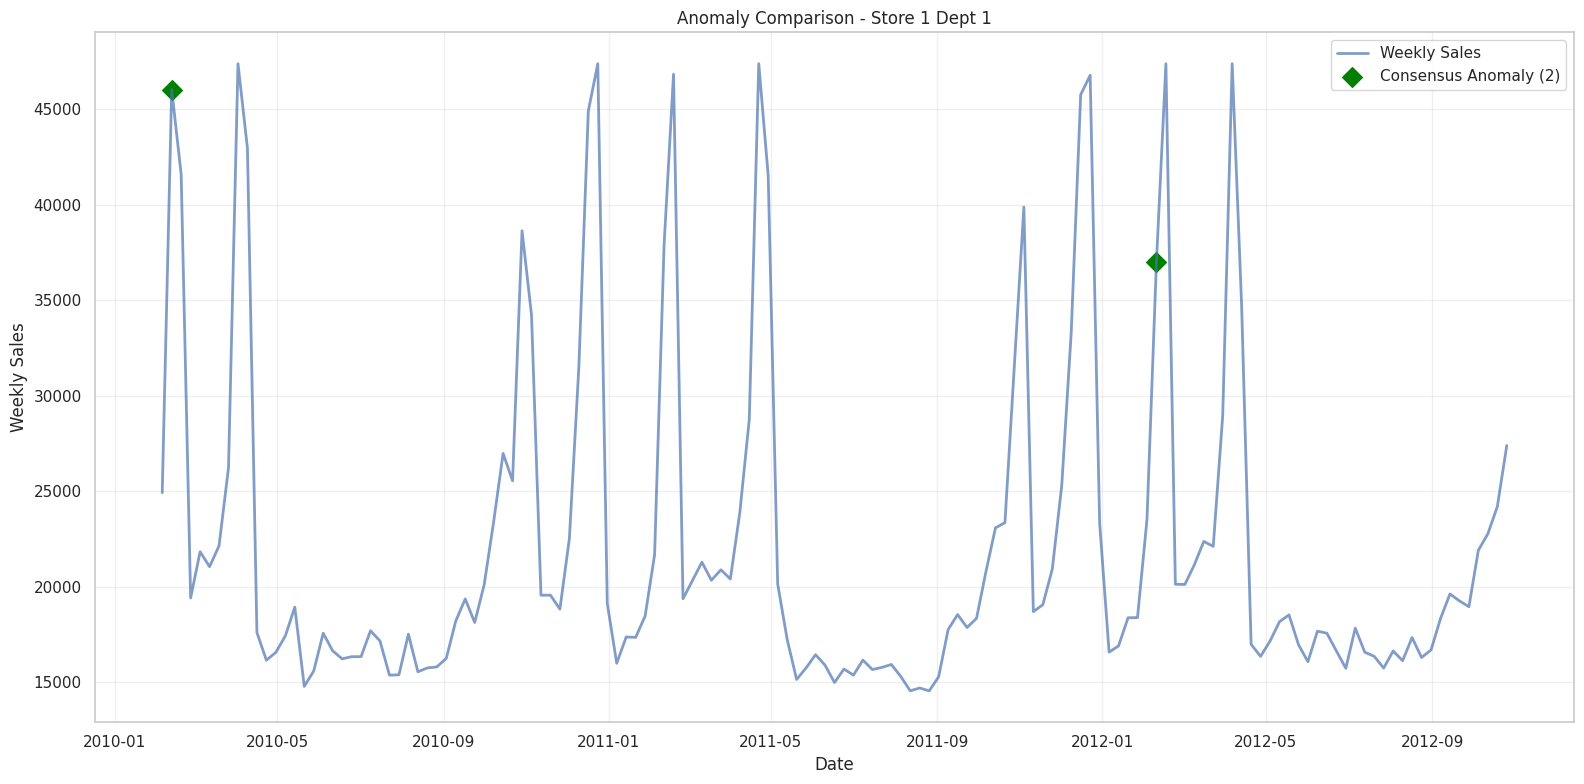

Consensus anomalies: 2

Monthly Consensus Anomalies:
Month
1       93
2      746
3      113
4      177
5      248
6      233
7      210
8      347
9      457
10     118
11    1364
12    3477
Name: Consensus_Anomaly, dtype: int64

Dataset shape (with anomalies flagged): (421570, 26)


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.seasonal import STL
from sklearn.ensemble import IsolationForest

# --- Assumptions ---
# df_merged has columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']

df_merged['Date'] = pd.to_datetime(df_merged['Date'])

print("RETAIL SALES ANOMALY DETECTION")
print(f"Dataset shape: {df_merged.shape}")

# ----------------------------
# 1. Z-Score Anomaly Detection
# ----------------------------
def detect_z_score_anomalies(df, value_col='Weekly_Sales', threshold=3):
    df['Z_Score'] = df.groupby(['Store','Dept'])[value_col].transform(
        lambda x: np.abs(stats.zscore(x.fillna(x.mean())))
    )
    df['Z_Score_Anomaly'] = (df['Z_Score'] > threshold).astype(int)
    return df

# ----------------------------
# 2. STL Anomaly Detection
# ----------------------------
def detect_stl_anomalies(df, value_col='Weekly_Sales', date_col='Date', seasonal=52, threshold=2.5):
    def stl_anomaly_detection(group):
        try:
            ts = group.set_index(date_col)[value_col].dropna()
            if len(ts) < 2:
                return pd.Series(False, index=group.index)
            
            seasonal_period = seasonal if len(ts) >= seasonal*2 else max(4, len(ts)//4)
            stl = STL(ts, seasonal=seasonal_period, robust=True)
            resid = stl.fit().resid
            anomalies = np.abs(resid) > threshold * resid.std()
            return pd.Series(anomalies, index=ts.index).reindex(group.index, fill_value=False)
        except:
            return pd.Series(False, index=group.index)

    df['STL_Anomaly'] = df.groupby(['Store','Dept']).apply(stl_anomaly_detection).reset_index(level=[0,1], drop=True).astype(int)
    return df

# ----------------------------
# 3. Isolation Forest Anomaly Detection
# ----------------------------
def detect_if_anomalies(df, value_col='Weekly_Sales', contamination=0.05):
    def if_anomaly_detection(group):
        data = group[value_col].dropna().values.reshape(-1, 1)
        if len(data) < 10:
            return pd.Series(False, index=group.index)
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        preds = iso_forest.fit_predict(data)
        result = pd.Series(False, index=group.index)
        result.loc[group[value_col].notna()] = (preds == -1)
        return result

    df['IF_Anomaly'] = df.groupby(['Store','Dept']).apply(if_anomaly_detection).reset_index(level=[0,1], drop=True).astype(int)
    return df

# ----------------------------
# 4. Weighted & Holiday-aware Consensus
# ----------------------------
def detect_weighted_consensus(df, weights=None, holiday_bonus=0.5):
    if weights is None:
        weights = {'Z_Score_Anomaly': 0.5, 'STL_Anomaly': 0.3, 'IF_Anomaly': 0.2}
    
    df['Weighted_Score'] = (
        df['Z_Score_Anomaly']*weights['Z_Score_Anomaly'] +
        df['STL_Anomaly']*weights['STL_Anomaly'] +
        df['IF_Anomaly']*weights['IF_Anomaly']
    )

    if 'IsHoliday' in df.columns:
        df['Weighted_Score'] += df['IsHoliday']*holiday_bonus

    df['Consensus_Anomaly'] = (df['Weighted_Score'] > 0.5).astype(int)
    df['Anomaly_Count'] = df[['Z_Score_Anomaly','STL_Anomaly','IF_Anomaly']].sum(axis=1).astype(int)
    return df

# ----------------------------
# 5. Run Pipeline
# ----------------------------
df_merged = detect_z_score_anomalies(df_merged)
df_merged = detect_stl_anomalies(df_merged)
df_merged = detect_if_anomalies(df_merged)
df_merged = detect_weighted_consensus(df_merged)

# Drop only intermediate columns, keep Consensus_Anomaly for flagging
cols_to_drop = ['Z_Score_Anomaly','STL_Anomaly','IF_Anomaly','Z_Score','Weighted_Score']
df_model_ready = df_merged.drop(columns=cols_to_drop)

# ----------------------------
# 6. Anomaly Summary
# ----------------------------
total_records = len(df_model_ready)
print("\n=== ANOMALY DETECTION SUMMARY ===")
print(f"Total Records: {total_records:,}")
print(f"Consensus Anomalies: {df_model_ready['Consensus_Anomaly'].sum():,} "
      f"({df_model_ready['Consensus_Anomaly'].sum()/total_records*100:.2f}%)")

# ----------------------------
# 7. Visualization per Store–Dept
# ----------------------------
def plot_anomaly_comparison(df, store_id, dept_id):
    subset = df[(df['Store']==store_id) & (df['Dept']==dept_id)].sort_values('Date')
    if subset.empty:
        print(f"No data for Store {store_id}, Dept {dept_id}")
        return
    
    plt.figure(figsize=(16,8))
    plt.plot(subset['Date'], subset['Weekly_Sales'], 'b-', alpha=0.7, linewidth=2, label='Weekly Sales')

    anomalies = subset[subset['Consensus_Anomaly']==1]
    if not anomalies.empty:
        plt.scatter(anomalies['Date'], anomalies['Weekly_Sales'], color='green', s=100, marker='D',
                    label=f'Consensus Anomaly ({len(anomalies)})')

    plt.title(f'Anomaly Comparison - Store {store_id} Dept {dept_id}')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"Consensus anomalies: {subset['Consensus_Anomaly'].sum()}")

# Example visualization
plot_anomaly_comparison(df_model_ready, store_id=1, dept_id=1)

# ----------------------------
# 8. Monthly Insights
# ----------------------------
df_model_ready['Month'] = df_model_ready['Date'].dt.month
monthly_anomalies = df_model_ready.groupby('Month')['Consensus_Anomaly'].sum()
print("\nMonthly Consensus Anomalies:")
print(monthly_anomalies)

# ----------------------------
# 9. ML-ready dataset (just flagged, do NOT remove anomalies)
# ----------------------------
df_clean_for_ml = df_model_ready.copy()  # Keep all records, anomalies are flagged
print(f"\nDataset shape (with anomalies flagged): {df_clean_for_ml.shape}")


=== TOP 10 STORE–DEPT BY SEASONALITY STRENGTH ===
      Store  Dept  Seasonality_Strength
574      10     9              1.000000
2404     40    58              0.999950
586      10    23              0.999916
1186     19    72              0.999901
2529     42    95              0.999808
239       4    59              0.999544
876      14    59              0.999522
614      10    59              0.999424
1266     20    94              0.999343
1760     28    59              0.999340


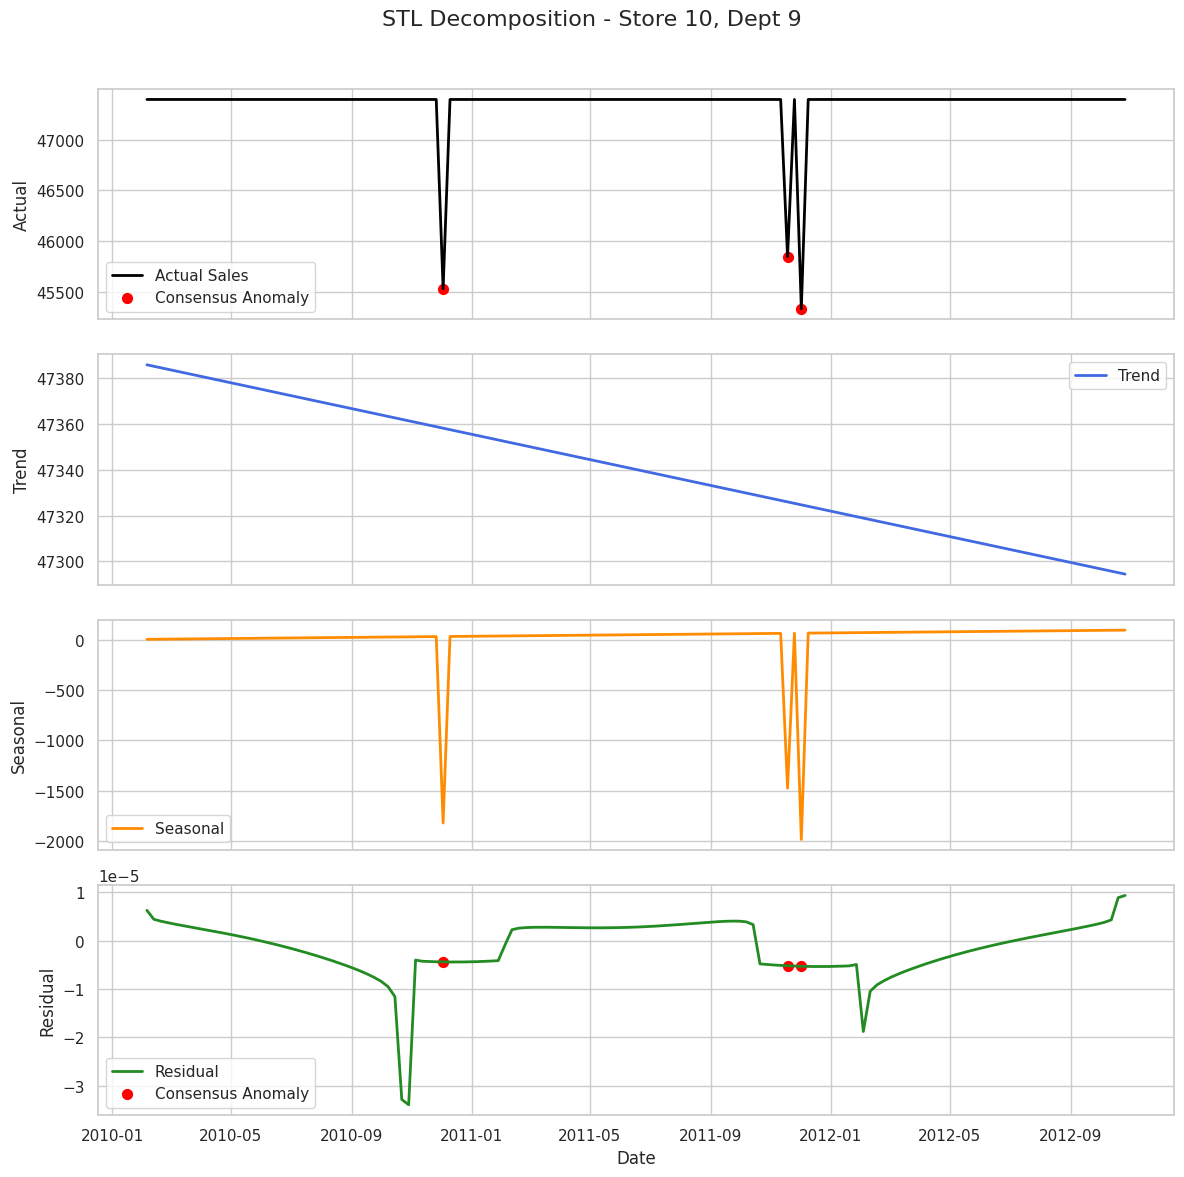

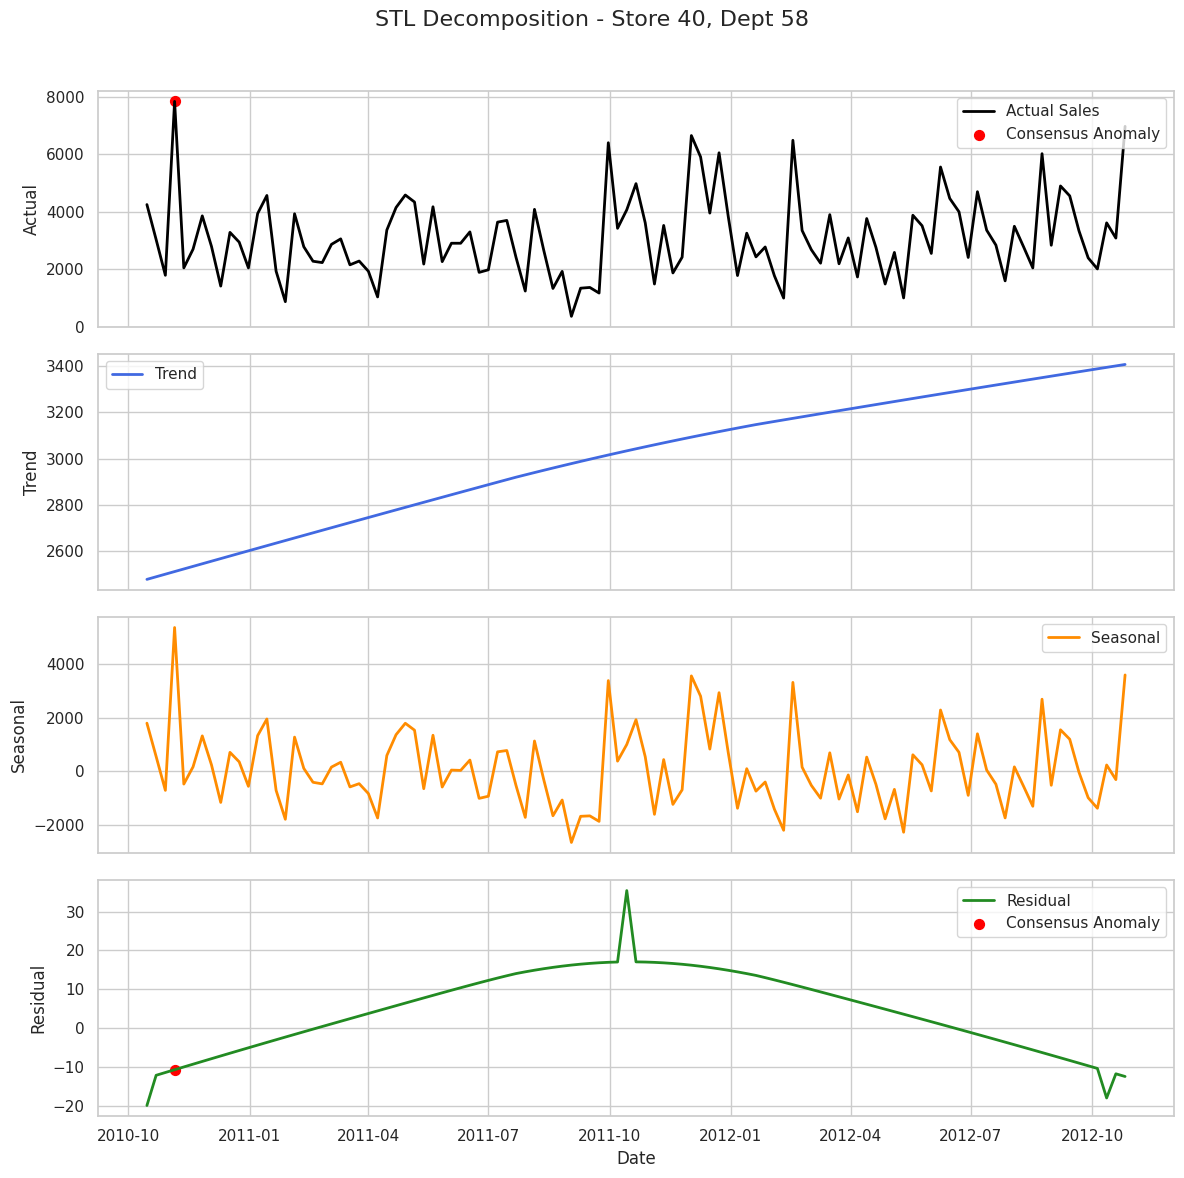

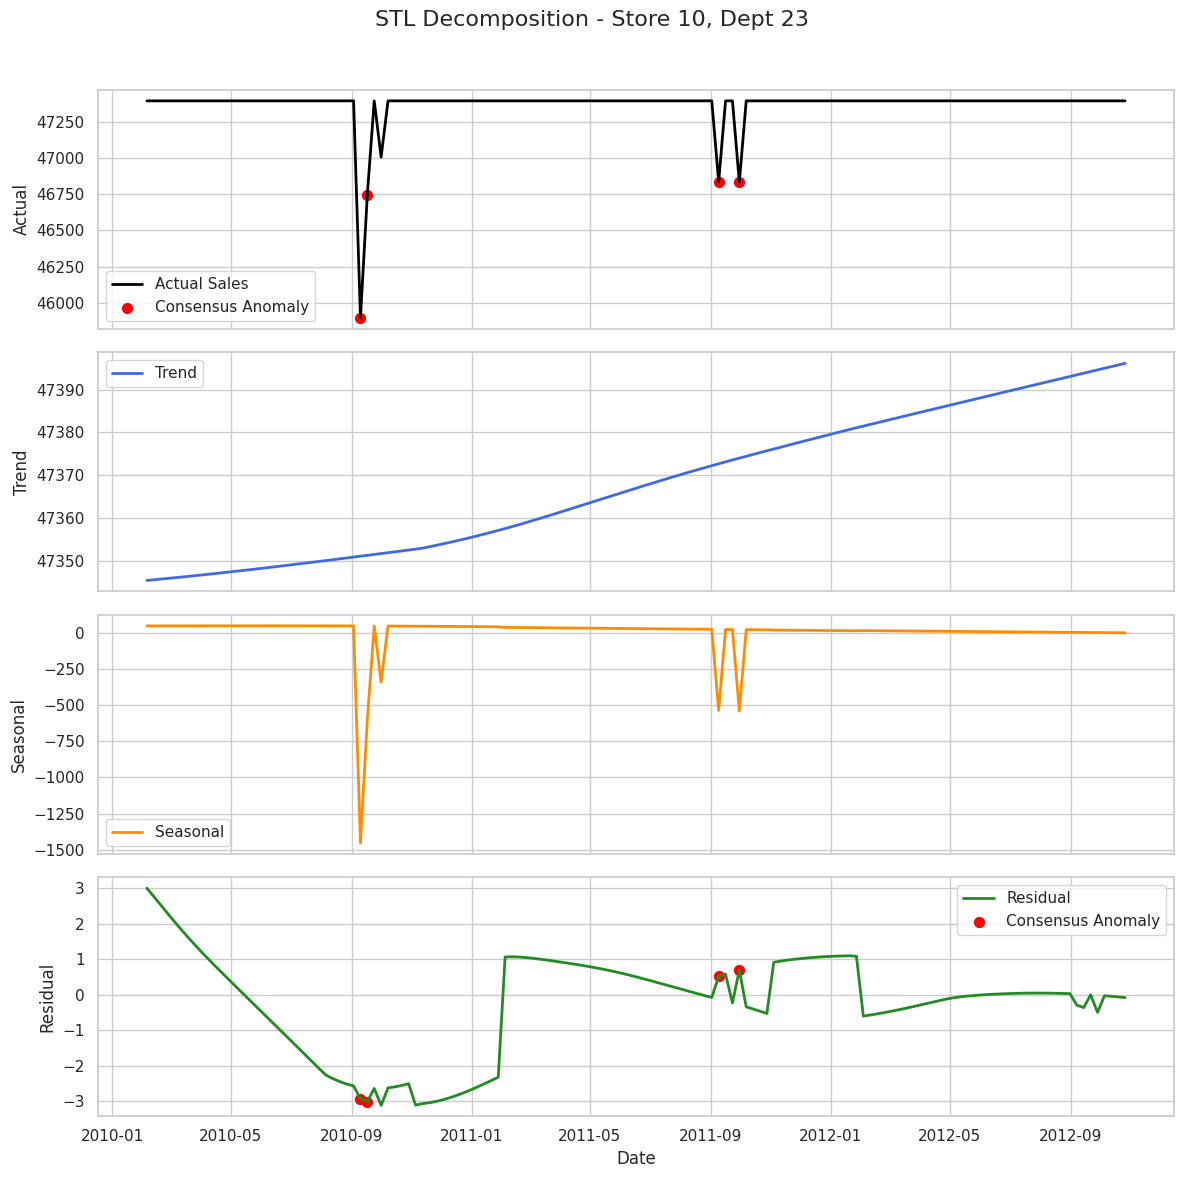

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

df_model_ready['Date'] = pd.to_datetime(df_model_ready['Date'])

# ----------------------------
# Function to compute seasonality strength
# ----------------------------
def compute_seasonality_strength_all(df, value_col='Weekly_Sales', date_col='Date', seasonal=53):
    results = []

    for (store, dept), group in df.groupby(['Store', 'Dept']):
        ts = group.sort_values(date_col).set_index(date_col)[value_col].dropna()
        
        if len(ts) < seasonal * 2:  # Need at least 2 full seasons
            continue
        
        try:
            stl = STL(ts, seasonal=seasonal, robust=True).fit()
            seasonal_strength = 1 - (stl.resid.var() / (stl.seasonal + stl.resid).var())
            results.append({
                'Store': store,
                'Dept': dept,
                'Seasonality_Strength': seasonal_strength
            })
        except:
            continue

    results_df = pd.DataFrame(results)
    return results_df.sort_values('Seasonality_Strength', ascending=False)

# Compute seasonality strength
seasonality_summary = compute_seasonality_strength_all(df_model_ready)

print("\n=== TOP 10 STORE–DEPT BY SEASONALITY STRENGTH ===")
print(seasonality_summary.head(10))

# ----------------------------
# Colors for plotting
# ----------------------------
actual_color = 'black'
trend_color = 'royalblue'
seasonal_color = 'darkorange'
residual_color = 'forestgreen'
anomaly_color = 'red'

# ----------------------------
# Plot top 3 strongest seasonal patterns
# ----------------------------
top_combos = seasonality_summary.head(3)[['Store','Dept']].values

for store, dept in top_combos:
    group = df_model_ready[(df_model_ready['Store']==store) & (df_model_ready['Dept']==dept)]
    ts = group.sort_values('Date').set_index('Date')['Weekly_Sales']
    anomalies = group.set_index('Date')['Consensus_Anomaly'].astype(bool)  # Use flagged anomalies
    
    stl = STL(ts, seasonal=53, robust=True).fit()
    
    # Manual plot
    fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
    
    # Actual Sales with anomalies
    axes[0].plot(ts.index, ts, color=actual_color, linewidth=2, label='Actual Sales')
    axes[0].scatter(ts.index[anomalies], ts[anomalies], color=anomaly_color, s=50, label='Consensus Anomaly')
    axes[0].set_ylabel('Actual')
    axes[0].legend()
    
    # Trend
    axes[1].plot(ts.index, stl.trend, color=trend_color, linewidth=2, label='Trend')
    axes[1].set_ylabel('Trend')
    axes[1].legend()
    
    # Seasonal
    axes[2].plot(ts.index, stl.seasonal, color=seasonal_color, linewidth=2, label='Seasonal')
    axes[2].set_ylabel('Seasonal')
    axes[2].legend()
    
    # Residual with anomalies
    axes[3].plot(ts.index, stl.resid, color=residual_color, linewidth=2, label='Residual')
    axes[3].scatter(ts.index[anomalies], stl.resid[anomalies], color=anomaly_color, s=50, label='Consensus Anomaly')
    axes[3].set_ylabel('Residual')
    axes[3].legend()
    
    fig.suptitle(f"STL Decomposition - Store {store}, Dept {dept}", fontsize=16)
    plt.xlabel('Date')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


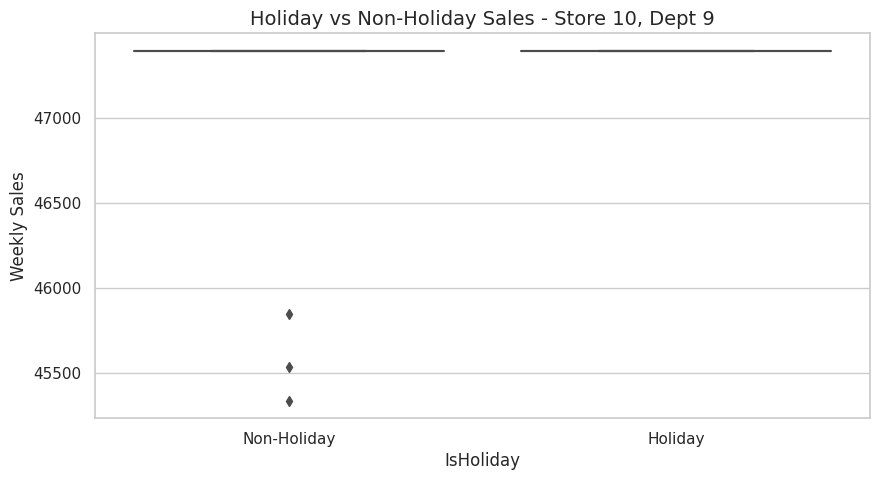

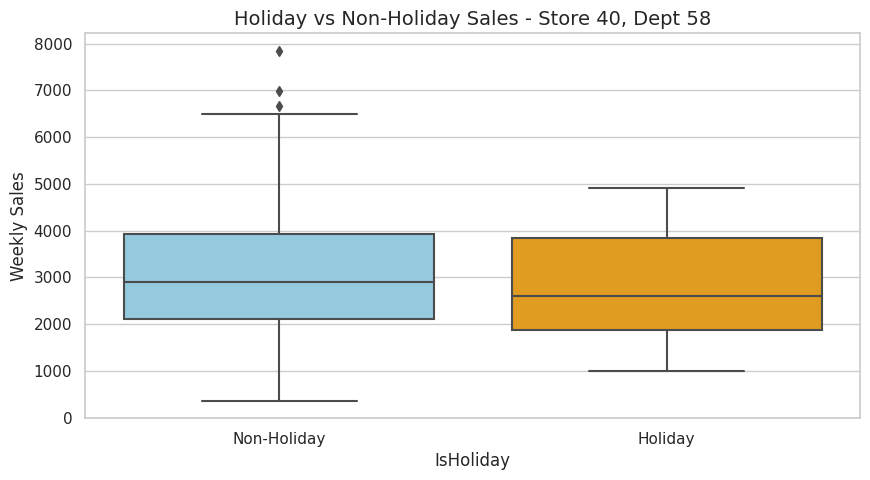

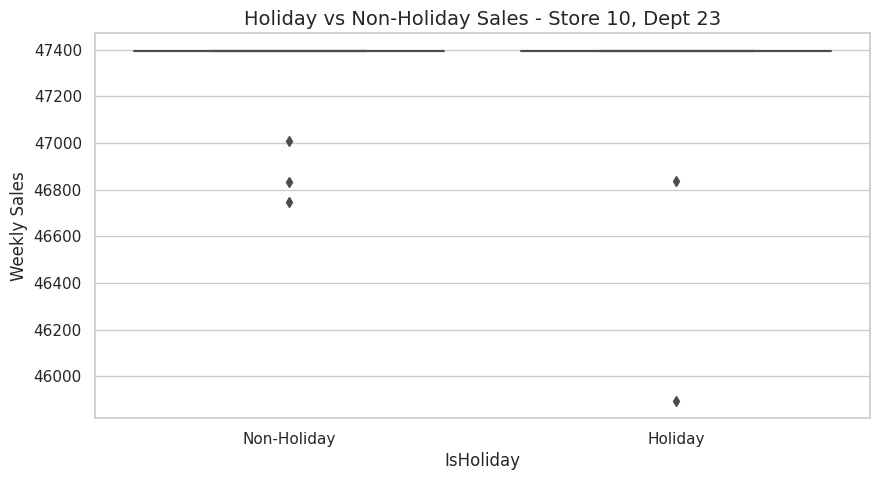

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert IsHoliday to string for proper coloring
df_model_ready['IsHoliday_str'] = df_model_ready['IsHoliday'].map({0:'Non-Holiday', 1:'Holiday'})

# Holiday vs Non-Holiday Comparison with colors
for store, dept in top_combos:
    group = df_model_ready[(df_model_ready['Store'] == store) & (df_model_ready['Dept'] == dept)]
    
    plt.figure(figsize=(10,5))
    sns.boxplot(
        x='IsHoliday_str', 
        y='Weekly_Sales', 
        data=group,
        palette={'Non-Holiday':'skyblue', 'Holiday':'orange'}
    )
    plt.title(f"Holiday vs Non-Holiday Sales - Store {store}, Dept {dept}", fontsize=14)
    plt.xlabel('IsHoliday')
    plt.ylabel('Weekly Sales')
    plt.show()


## ***8. Customer Segmentation***

### Feature Selection & Engineering

In [52]:
# Step 1: Improved Feature Selection for Customer Segmentation
features = [
    'Weekly_Sales',
    'Size', 'Type_B', 'Type_C',
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
    'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'IsHoliday',
    'Month', 'Quarter'
]

# Create clustering dataset
df_cluster = df_model_ready[features].copy()

# Handle missing values if any
df_cluster = df_cluster.fillna(0)

# -----------------------------
# Step 2: Enhanced Feature Engineering
# -----------------------------
# Check for division by zero and handle it properly
df_cluster['Sales_Per_SqFt'] = df_cluster['Weekly_Sales'] / np.where(df_cluster['Size'] == 0, 1, df_cluster['Size'])
df_cluster['Total_Markdowns'] = (df_cluster['MarkDown1'] + df_cluster['MarkDown2'] + 
                                df_cluster['MarkDown3'] + df_cluster['MarkDown4'] + 
                                df_cluster['MarkDown5'])

# Handle potential infinity values in Markdown_Intensity
df_cluster['Markdown_Intensity'] = np.where(
    (df_cluster['Weekly_Sales'] + 1) == 0,
    0,
    df_cluster['Total_Markdowns'] / (df_cluster['Weekly_Sales'] + 1)
)

# Add these new features to the feature list
features.extend(['Sales_Per_SqFt', 'Total_Markdowns', 'Markdown_Intensity'])

# -----------------------------
# Step 3: Fix infinity and NaN issues
# -----------------------------
# Replace any infinite values with NaN, then fill with 0
df_cluster = df_cluster.replace([np.inf, -np.inf], np.nan)
df_cluster = df_cluster.fillna(0)

# Check for any remaining problematic values
print("Checking for problematic values:")
print("Infinite values:", np.isinf(df_cluster.select_dtypes(include=[np.number])).sum().sum())
print("NaN values:", df_cluster.isnull().sum().sum())

# -----------------------------
# Step 4: Data Preparation for Clustering
# -----------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Only keep numeric columns that exist in df_cluster
numeric_cols = [col for col in features if col in df_cluster.columns and 
                df_cluster[col].dtype in ['int64', 'float64'] and 
                col not in ['Type_B', 'Type_C', 'IsHoliday']]

print(f"Numeric columns for clustering: {numeric_cols}")

# Additional data cleaning for numeric columns
for col in numeric_cols:
    # Replace any remaining infinite or very large values
    df_cluster[col] = np.where(
        (np.abs(df_cluster[col]) == np.inf) | (np.abs(df_cluster[col]) > 1e10),
        df_cluster[col].median(),
        df_cluster[col]
    )

# -----------------------------
# Step 5: Scale the data
# -----------------------------
scaler = StandardScaler()
df_cluster_scaled = df_cluster.copy()

# Fit and transform only the numeric columns
df_cluster_scaled[numeric_cols] = scaler.fit_transform(df_cluster_scaled[numeric_cols])
print("Scaling successful!")

# -----------------------------
# Step 6: Implement K=2 Clustering (Optimal Solution)
# -----------------------------
print("\n" + "="*60)
print("IMPLEMENTING OPTIMAL K=2 CLUSTERING")
print("="*60)

# Use k=2 based on previous silhouette analysis
optimal_k = 2
print(f"Using optimal number of clusters: {optimal_k}")

# Fit K-Means with k=2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_model_ready['Cluster'] = kmeans.fit_predict(df_cluster_scaled[numeric_cols])

# Calculate silhouette score for our chosen solution
sil_score = silhouette_score(df_cluster_scaled[numeric_cols], df_model_ready['Cluster'])
print(f"Silhouette Score for k=2: {sil_score:.3f}")

print("\nCluster distribution:")
cluster_counts = df_model_ready['Cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(df_model_ready)) * 100
    print(f"Cluster {cluster_id}: {count:,} records ({percentage:.1f}%)")

# -----------------------------
# Step 7: Add Total_Markdowns to main dataset
# -----------------------------
if 'Total_Markdowns' not in df_model_ready.columns:
    df_model_ready['Total_Markdowns'] = (df_model_ready['MarkDown1'] + df_model_ready['MarkDown2'] + 
                                        df_model_ready['MarkDown3'] + df_model_ready['MarkDown4'] + 
                                        df_model_ready['MarkDown5'])

Checking for problematic values:
Infinite values: 0
NaN values: 0
Numeric columns for clustering: ['Weekly_Sales', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Sales_Per_SqFt', 'Total_Markdowns', 'Markdown_Intensity']
Scaling successful!

IMPLEMENTING OPTIMAL K=2 CLUSTERING
Using optimal number of clusters: 2
Silhouette Score for k=2: 0.384

Cluster distribution:
Cluster 0: 299,862 records (71.1%)
Cluster 1: 121,708 records (28.9%)


### Cluster Visualization

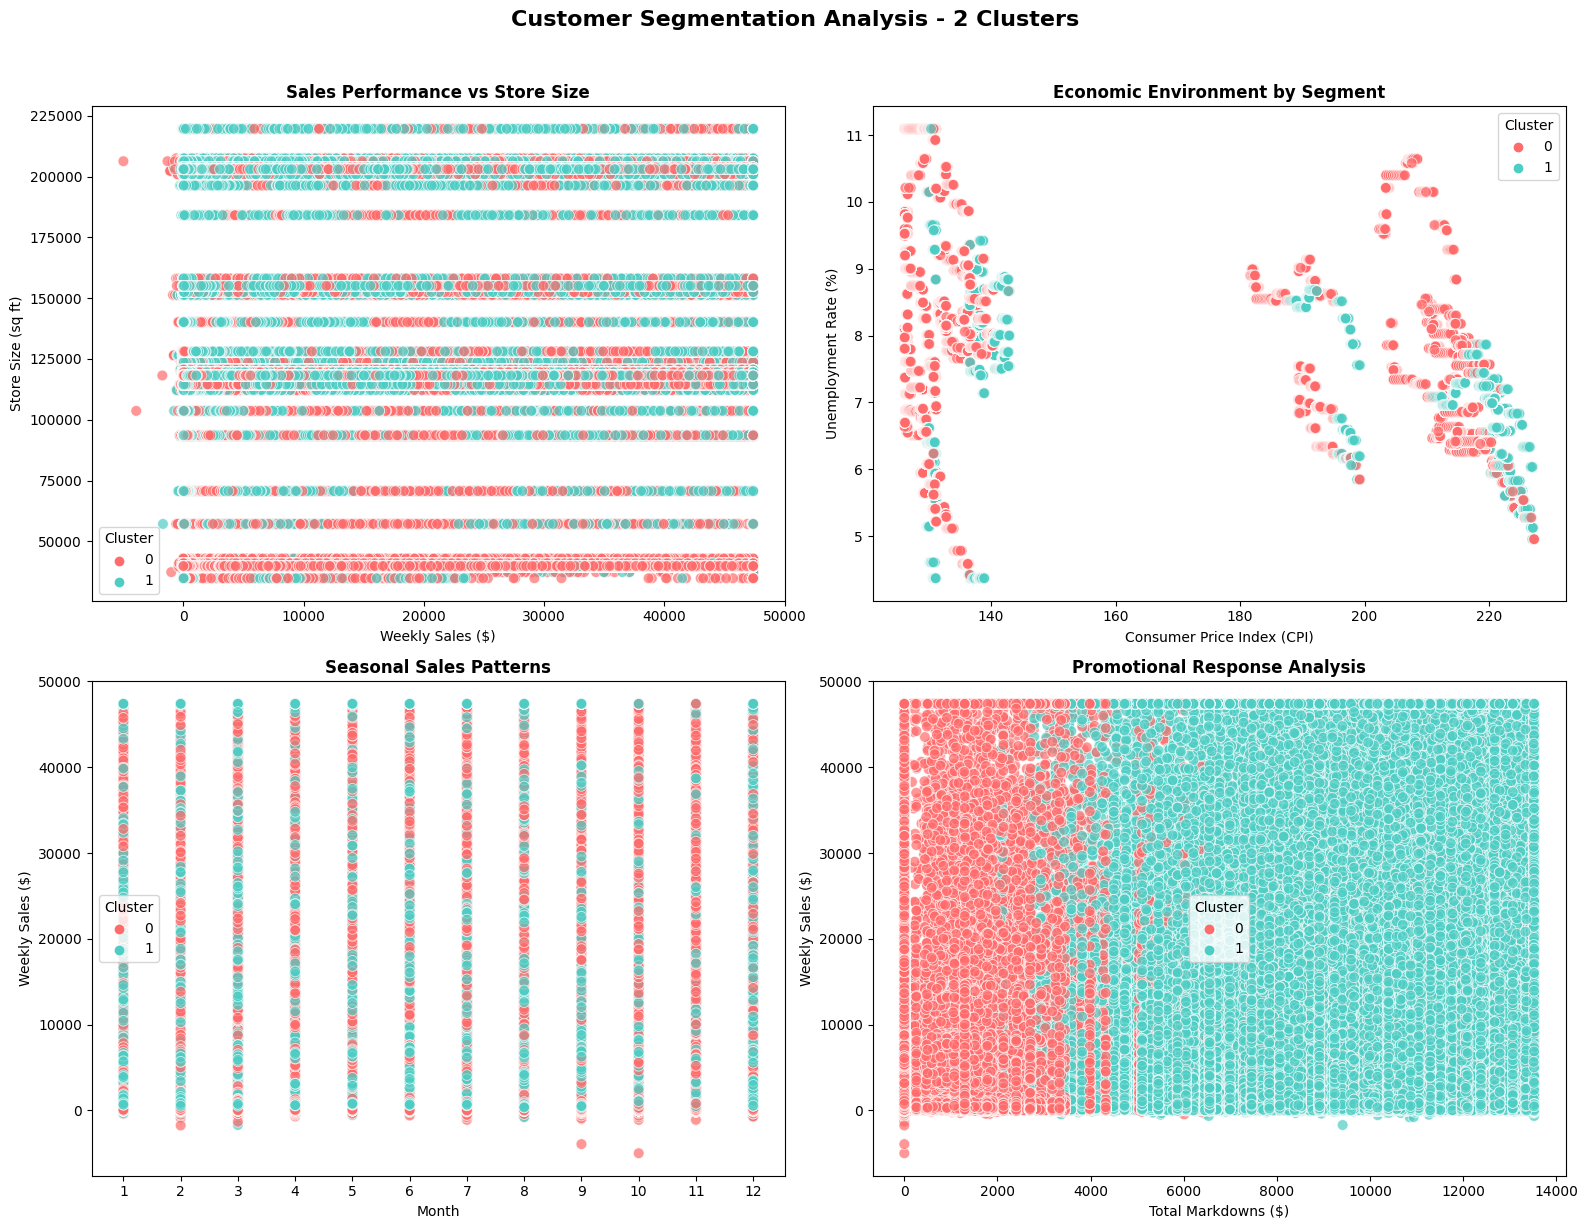

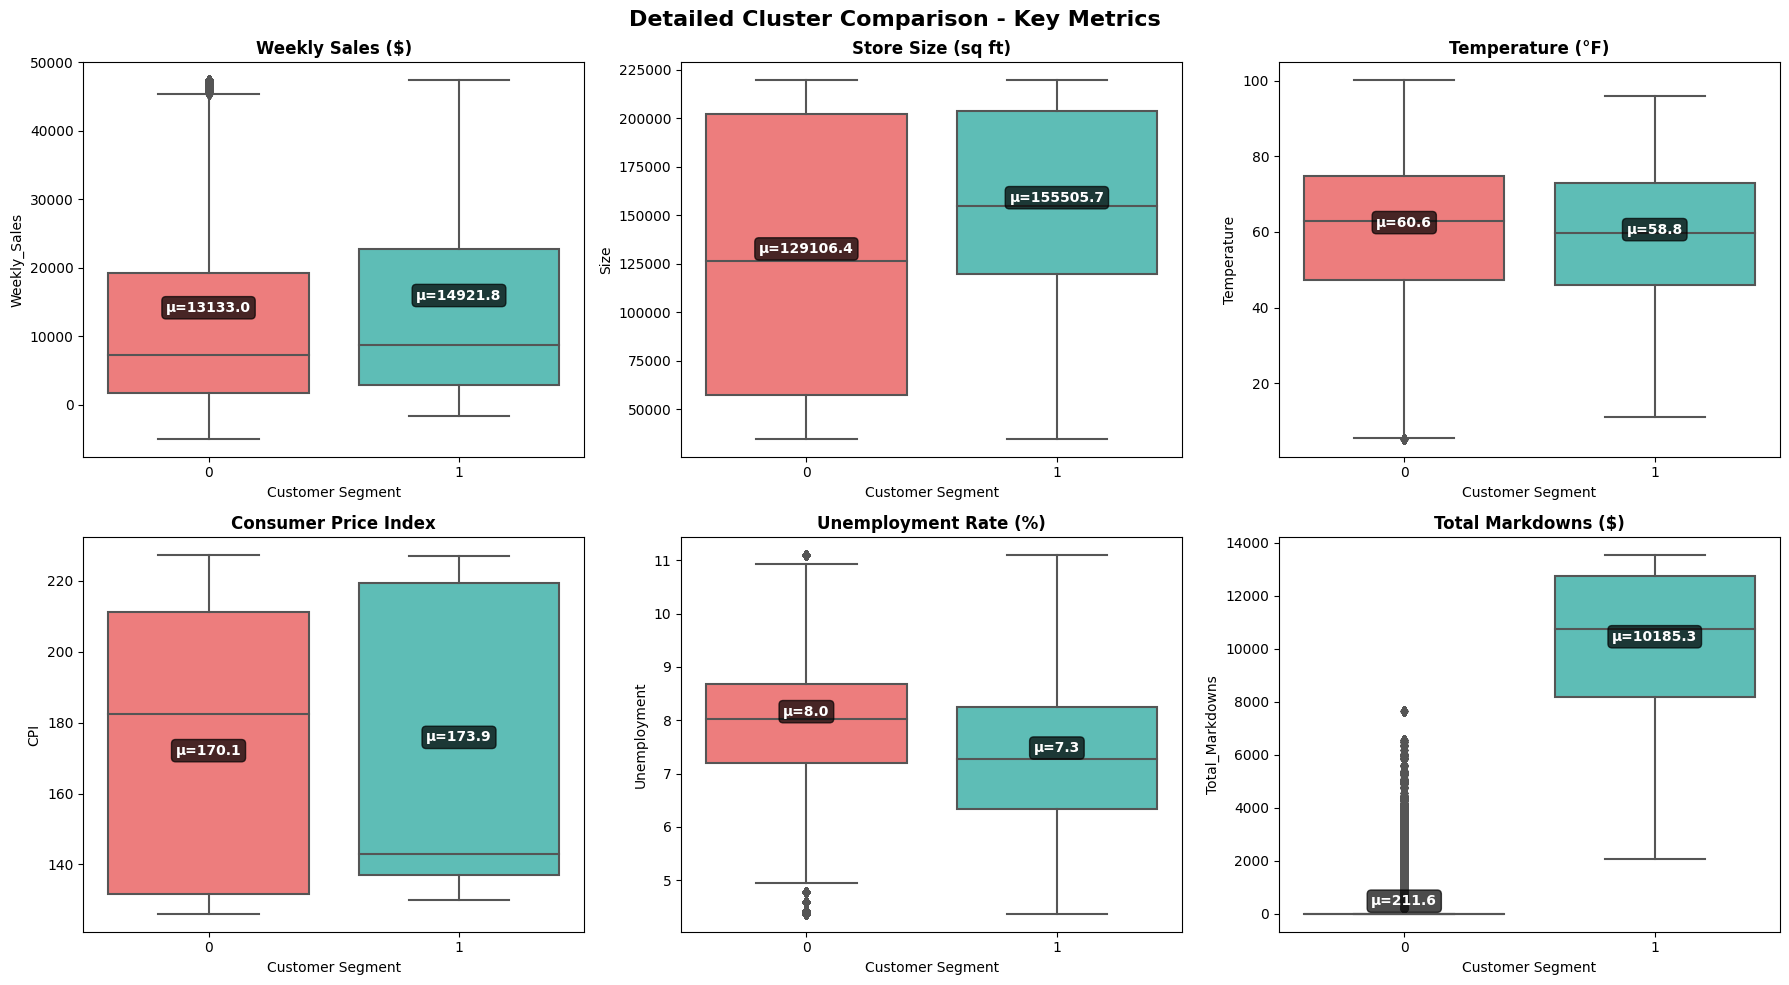

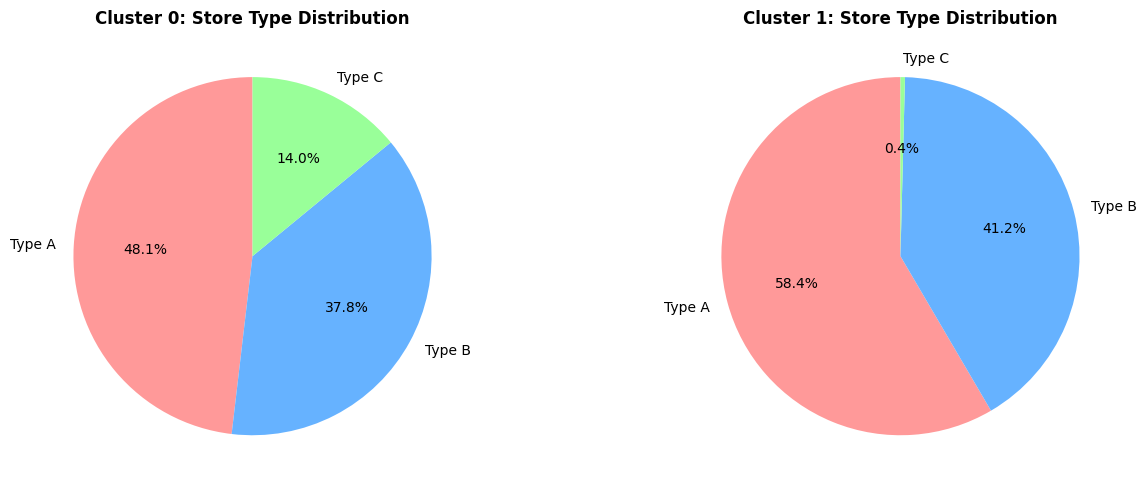

In [53]:
import seaborn as sns

# Set up the plot style
plt.style.use('default')
sns.set_palette("husl")

# Custom colors for 2 clusters - more distinct
colors = ['#FF6B6B', '#4ECDC4']  # Red and Teal

# Main visualization grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Segmentation Analysis - 2 Clusters', fontsize=16, fontweight='bold', y=1.02)

# 1. Sales vs Size - Core business performance
sns.scatterplot(
    x='Weekly_Sales', y='Size', hue='Cluster', 
    data=df_model_ready, alpha=0.7, ax=axes[0,0],
    palette=colors, s=60
)
axes[0,0].set_title("Sales Performance vs Store Size", fontsize=12, fontweight='bold')
axes[0,0].set_xlabel("Weekly Sales ($)")
axes[0,0].set_ylabel("Store Size (sq ft)")
axes[0,0].ticklabel_format(style='plain', axis='both')

# 2. Economic environment
sns.scatterplot(
    x='CPI', y='Unemployment', hue='Cluster',
    data=df_model_ready, alpha=0.7, ax=axes[0,1],
    palette=colors, s=60
)
axes[0,1].set_title("Economic Environment by Segment", fontsize=12, fontweight='bold')
axes[0,1].set_xlabel("Consumer Price Index (CPI)")
axes[0,1].set_ylabel("Unemployment Rate (%)")

# 3. Seasonal patterns
sns.scatterplot(
    x='Month', y='Weekly_Sales', hue='Cluster',
    data=df_model_ready, alpha=0.7, ax=axes[1,0],
    palette=colors, s=60
)
axes[1,0].set_title("Seasonal Sales Patterns", fontsize=12, fontweight='bold')
axes[1,0].set_xlabel("Month")
axes[1,0].set_ylabel("Weekly Sales ($)")
axes[1,0].set_xticks(range(1, 13))

# 4. Promotional response
sns.scatterplot(
    x='Total_Markdowns', y='Weekly_Sales', hue='Cluster',
    data=df_model_ready, alpha=0.7, ax=axes[1,1],
    palette=colors, s=60
)
axes[1,1].set_title("Promotional Response Analysis", fontsize=12, fontweight='bold')
axes[1,1].set_xlabel("Total Markdowns ($)")
axes[1,1].set_ylabel("Weekly Sales ($)")

plt.tight_layout()
plt.show()

# Additional detailed comparison plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Detailed Cluster Comparison - Key Metrics', fontsize=16, fontweight='bold')

# Key metrics to compare between clusters
metrics = ['Weekly_Sales', 'Size', 'Temperature', 'CPI', 'Unemployment', 'Total_Markdowns']
titles = ['Weekly Sales ($)', 'Store Size (sq ft)', 'Temperature (°F)', 'Consumer Price Index', 'Unemployment Rate (%)', 'Total Markdowns ($)']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    row = i // 3
    col = i % 3
    sns.boxplot(x='Cluster', y=metric, data=df_model_ready, ax=axes[row, col], palette=colors)
    axes[row, col].set_title(f'{title}', fontweight='bold')
    axes[row, col].set_xlabel('Customer Segment')
    
    # Add mean values as text
    for cluster_id in [0, 1]:
        cluster_data = df_model_ready[df_model_ready['Cluster'] == cluster_id][metric]
        mean_val = cluster_data.mean()
        axes[row, col].text(cluster_id, mean_val, f'μ={mean_val:.1f}', 
                           ha='center', va='bottom', fontweight='bold', color='white',
                           bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7))

plt.tight_layout()
plt.show()

# Store type distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Store type distribution by cluster
store_types = df_model_ready.groupby('Cluster')[['Type_B', 'Type_C']].mean() * 100
store_types['Type_A'] = 100 - store_types['Type_B'] - store_types['Type_C']  # Calculate Type A

# Pie charts for each cluster
for i, cluster_id in enumerate([0, 1]):
    cluster_types = [store_types.loc[cluster_id, 'Type_A'], 
                    store_types.loc[cluster_id, 'Type_B'], 
                    store_types.loc[cluster_id, 'Type_C']]
    labels = ['Type A', 'Type B', 'Type C']
    colors_pie = ['#FF9999', '#66B2FF', '#99FF99']
    
    axes[i].pie(cluster_types, labels=labels, colors=colors_pie, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Cluster {cluster_id}: Store Type Distribution', fontweight='bold')

plt.tight_layout()
plt.show()



### Cluster Analysis & Business Insights

In [54]:

# Detailed cluster summary with comprehensive metrics
cluster_summary = df_model_ready.groupby('Cluster').agg({
    'Weekly_Sales': ['mean', 'median', 'std', 'min', 'max', 'count'],
    'Size': ['mean', 'median', 'std'],
    'Temperature': ['mean', 'std'],
    'Fuel_Price': ['mean', 'std'],
    'CPI': ['mean', 'std'],
    'Unemployment': ['mean', 'std'],
    'Type_B': 'mean',
    'Type_C': 'mean',
    'IsHoliday': 'mean',
    'MarkDown1': 'mean',
    'MarkDown2': 'mean',
    'MarkDown3': 'mean',
    'MarkDown4': 'mean',
    'MarkDown5': 'mean',
    'Total_Markdowns': ['mean', 'std'],
    'Month': 'mean',
    'Quarter': 'mean'
}).round(2)

print("\nDETAILED CLUSTER SUMMARY STATISTICS:")
print("="*50)
print(cluster_summary)

# Individual cluster analysis with business context
for cluster_id in [0, 1]:
    cluster_data = df_model_ready[df_model_ready['Cluster'] == cluster_id]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df_model_ready)) * 100
    
    print(f"\n" + "="*60)
    print(f"CUSTOMER SEGMENT {cluster_id} - DETAILED PROFILE")
    print(f"="*60)
    
    # Basic metrics
    print(f"SEGMENT SIZE & SCOPE:")
    print(f"   • Total Records: {cluster_size:,} ({cluster_pct:.1f}% of portfolio)")
    print(f"   • Data Quality: {(cluster_data.notna().sum().sum() / (len(cluster_data) * len(cluster_data.columns)) * 100):.1f}% complete")
    
    # Sales performance
    avg_sales = cluster_data['Weekly_Sales'].mean()
    median_sales = cluster_data['Weekly_Sales'].median()
    sales_std = cluster_data['Weekly_Sales'].std()
    print(f"\n SALES PERFORMANCE:")
    print(f"   • Average Weekly Sales: ${avg_sales:,.2f}")
    print(f"   • Median Weekly Sales: ${median_sales:,.2f}")
    print(f"   • Sales Volatility (Std Dev): ${sales_std:,.2f}")
    print(f"   • Sales Range: ${cluster_data['Weekly_Sales'].min():,.2f} - ${cluster_data['Weekly_Sales'].max():,.2f}")
    print(f"   • Coefficient of Variation: {(sales_std/avg_sales)*100:.1f}%")
    
    # Store characteristics
    avg_size = cluster_data['Size'].mean()
    median_size = cluster_data['Size'].median()
    print(f"\n STORE CHARACTERISTICS:")
    print(f"   • Average Store Size: {avg_size:,.0f} sq ft")
    print(f"   • Median Store Size: {median_size:,.0f} sq ft")
    print(f"   • Sales per Sq Ft: ${avg_sales/avg_size:.2f}")
    
    # Store type distribution
    type_a_pct = (1 - cluster_data['Type_B'].mean() - cluster_data['Type_C'].mean()) * 100
    type_b_pct = cluster_data['Type_B'].mean() * 100
    type_c_pct = cluster_data['Type_C'].mean() * 100
    print(f"   • Store Type Mix:")
    print(f"     - Type A: {type_a_pct:.1f}%")
    print(f"     - Type B: {type_b_pct:.1f}%")
    print(f"     - Type C: {type_c_pct:.1f}%")
    
    # Economic environment
    print(f"\n ECONOMIC ENVIRONMENT:")
    print(f"   • Consumer Price Index: {cluster_data['CPI'].mean():.1f} (±{cluster_data['CPI'].std():.1f})")
    print(f"   • Unemployment Rate: {cluster_data['Unemployment'].mean():.1f}% (±{cluster_data['Unemployment'].std():.1f}%)")
    print(f"   • Average Fuel Price: ${cluster_data['Fuel_Price'].mean():.3f}")
    print(f"   • Average Temperature: {cluster_data['Temperature'].mean():.1f}°F")
    
    # Seasonal and holiday patterns
    holiday_pct = cluster_data['IsHoliday'].mean() * 100
    avg_month = cluster_data['Month'].mean()
    print(f"\n TEMPORAL PATTERNS:")
    print(f"   • Holiday Records: {holiday_pct:.1f}% of observations")
    print(f"   • Average Month: {avg_month:.1f} (seasonal tendency)")
    print(f"   • Average Quarter: {cluster_data['Quarter'].mean():.1f}")
    
    # Promotional behavior
    total_markdown = cluster_data['Total_Markdowns'].mean()
    markdown_freq = (cluster_data['Total_Markdowns'] > 0).mean() * 100
    print(f"\n PROMOTIONAL BEHAVIOR:")
    print(f"   • Average Total Markdowns: ${total_markdown:.2f}")
    print(f"   • Markdown Frequency: {markdown_freq:.1f}% of periods")
    print(f"   • Markdown Breakdown:")
    for i in range(1, 6):
        md_avg = cluster_data[f'MarkDown{i}'].mean()
        md_freq = (cluster_data[f'MarkDown{i}'] > 0).mean() * 100
        print(f"     - MarkDown{i}: ${md_avg:.2f} avg, {md_freq:.1f}% frequency")


DETAILED CLUSTER SUMMARY STATISTICS:
        Weekly_Sales                                                     Size  \
                mean   median       std      min       max   count       mean   
Cluster                                                                         
0           13132.96  7190.79  14698.96 -4988.94  47395.16  299862  129106.41   
1           14921.82  8675.33  15339.62 -1699.00  47395.16  121708  155505.65   

                            Temperature        Fuel_Price           CPI  \
           median       std        mean    std       mean   std    mean   
Cluster                                                                   
0        126512.0  63512.25       60.63  18.84       3.24  0.46  170.12   
1        155078.0  49461.25       58.77  17.37       3.67  0.28  173.87   

               Unemployment       Type_B Type_C IsHoliday MarkDown1 MarkDown2  \
           std         mean   std   mean   mean      mean      mean      mean   
Cluster           

### Comparative analysis and strategic insights

In [55]:
# Performance ranking
sales_by_cluster = df_model_ready.groupby('Cluster')['Weekly_Sales'].mean().sort_values(ascending=False)
high_performer = sales_by_cluster.index[0]
low_performer = sales_by_cluster.index[1]

print(f"\n PERFORMANCE RANKING:")
print(f"   1. HIGH-PERFORMING SEGMENT: Cluster {high_performer}")
print(f"      └─ Average Sales: ${sales_by_cluster.iloc[0]:,.2f}")
print(f"   2. OPPORTUNITY SEGMENT: Cluster {low_performer}")
print(f"      └─ Average Sales: ${sales_by_cluster.iloc[1]:,.2f}")

# Performance gap analysis
performance_gap = ((sales_by_cluster.iloc[0] - sales_by_cluster.iloc[1]) / sales_by_cluster.iloc[1]) * 100
print(f"\n KEY PERFORMANCE INSIGHTS:")
print(f"   • Performance Gap: {performance_gap:.1f}% higher sales in top segment")
print(f"   • Revenue Opportunity: ${(sales_by_cluster.iloc[0] - sales_by_cluster.iloc[1]) * len(df_model_ready[df_model_ready['Cluster'] == low_performer]):,.2f}")

# Efficiency analysis
size_by_cluster = df_model_ready.groupby('Cluster')['Size'].mean()
efficiency_by_cluster = sales_by_cluster / size_by_cluster

print(f"\n OPERATIONAL EFFICIENCY:")
print(f"   • Cluster {high_performer}: ${efficiency_by_cluster[high_performer]:.2f} sales per sq ft")
print(f"   • Cluster {low_performer}: ${efficiency_by_cluster[low_performer]:.2f} sales per sq ft")

# Promotional effectiveness
markdown_by_cluster = df_model_ready.groupby('Cluster')['Total_Markdowns'].mean()
promo_efficiency = sales_by_cluster / (markdown_by_cluster + 1)  # +1 to avoid division by zero

print(f"\n PROMOTIONAL EFFECTIVENESS:")
for cluster_id in [0, 1]:
    print(f"   • Cluster {cluster_id}:")
    print(f"     - Average Markdowns: ${markdown_by_cluster[cluster_id]:.2f}")
    print(f"     - Promotional ROI: ${promo_efficiency[cluster_id]:.1f} sales per $ of markdown")

# Holiday impact analysis
holiday_analysis = df_model_ready.groupby(['Cluster', 'IsHoliday'])['Weekly_Sales'].mean().unstack()
if holiday_analysis.shape[1] == 2:  # Both holiday and non-holiday data exists
    print(f"\n HOLIDAY IMPACT ANALYSIS:")
    for cluster_id in [0, 1]:
        if 0.0 in holiday_analysis.columns and 1.0 in holiday_analysis.columns:
            regular_sales = holiday_analysis.loc[cluster_id, 0.0]
            holiday_sales = holiday_analysis.loc[cluster_id, 1.0]
            holiday_lift = ((holiday_sales - regular_sales) / regular_sales) * 100
            print(f"   • Cluster {cluster_id}:")
            print(f"     - Regular Period Sales: ${regular_sales:,.2f}")
            print(f"     - Holiday Period Sales: ${holiday_sales:,.2f}")
            print(f"     - Holiday Lift: {holiday_lift:.1f}%")


 PERFORMANCE RANKING:
   1. HIGH-PERFORMING SEGMENT: Cluster 1
      └─ Average Sales: $14,921.82
   2. OPPORTUNITY SEGMENT: Cluster 0
      └─ Average Sales: $13,132.96

 KEY PERFORMANCE INSIGHTS:
   • Performance Gap: 13.6% higher sales in top segment
   • Revenue Opportunity: $536,413,591.92

 OPERATIONAL EFFICIENCY:
   • Cluster 1: $0.10 sales per sq ft
   • Cluster 0: $0.10 sales per sq ft

 PROMOTIONAL EFFECTIVENESS:
   • Cluster 0:
     - Average Markdowns: $211.64
     - Promotional ROI: $61.8 sales per $ of markdown
   • Cluster 1:
     - Average Markdowns: $10185.30
     - Promotional ROI: $1.5 sales per $ of markdown

 HOLIDAY IMPACT ANALYSIS:
   • Cluster 0:
     - Regular Period Sales: $13,109.47
     - Holiday Period Sales: $13,447.72
     - Holiday Lift: 2.6%
   • Cluster 1:
     - Regular Period Sales: $14,891.60
     - Holiday Period Sales: $15,307.57
     - Holiday Lift: 2.8%


## ***9. Market Basket Analysis***

In [56]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("MARKET BASKET ANALYSIS - RETAIL DEPARTMENTS")
print("="*70)

# Dataset Overview
print("\n1. DATASET OVERVIEW")
print("-" * 50)

print(f"Dataset shape: {df_model_ready.shape}")
print(f"Unique stores: {df_model_ready['Store'].nunique()}")
print(f"Unique departments: {df_model_ready['Dept'].nunique()}")
print(f"Date range: {df_model_ready['Date'].min()} to {df_model_ready['Date'].max()}")

# Department performance overview
dept_summary = df_model_ready.groupby('Dept').agg({
    'Weekly_Sales': ['mean', 'sum', 'count'],
    'Store': 'nunique'
}).round(2)
dept_summary.columns = ['Avg_Weekly_Sales', 'Total_Sales', 'Records', 'Stores_Present']
print("\nTop 10 Departments by Average Weekly Sales:")
print(dept_summary.sort_values('Avg_Weekly_Sales', ascending=False).head(10))


MARKET BASKET ANALYSIS - RETAIL DEPARTMENTS

1. DATASET OVERVIEW
--------------------------------------------------
Dataset shape: (421570, 29)
Unique stores: 45
Unique departments: 81
Date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00

Top 10 Departments by Average Weekly Sales:
      Avg_Weekly_Sales   Total_Sales  Records  Stores_Present
Dept                                                         
38            43803.44  2.818751e+08     6435              45
65            43653.99  6.242520e+06      143               1
95            42365.51  2.726221e+08     6435              45
92            40203.12  2.587071e+08     6435              45
40            36997.15  2.380766e+08     6435              45
72            35467.45  2.144362e+08     6046              45
2             34881.47  2.244623e+08     6435              45
90            32358.92  2.082296e+08     6435              45
13            28968.97  1.864153e+08     6435              45
94            28413.13  1.615287e

### Transaction Creation Functions

In [57]:
def create_high_performance_transactions(df, percentile_threshold=0.7):
    transactions = []
    for store in df['Store'].unique():
        store_data = df[df['Store'] == store]
        for date in store_data['Date'].unique():
            week_data = store_data[store_data['Date'] == date]
            if len(week_data) >= 2:
                threshold = week_data['Weekly_Sales'].quantile(percentile_threshold)
                high_perf_depts = week_data[week_data['Weekly_Sales'] >= threshold]['Dept'].tolist()
                if len(high_perf_depts) >= 2:
                    transactions.append([f"Dept_{dept}" for dept in high_perf_depts])
    return transactions

def create_store_level_transactions(df):
    transactions = []
    for store in df['Store'].unique():
        store_data = df[df['Store'] == store]
        dept_avg = store_data.groupby('Dept')['Weekly_Sales'].mean()
        overall_avg = dept_avg.mean()
        above_avg_depts = dept_avg[dept_avg >= overall_avg].index.tolist()
        if len(above_avg_depts) >= 2:
            transactions.append([f"Dept_{dept}" for dept in above_avg_depts])
    return transactions

# Create transactions
high_perf_transactions = create_high_performance_transactions(df_model_ready)
store_transactions = create_store_level_transactions(df_model_ready)

print(f"\nHigh-performance weekly transactions: {len(high_perf_transactions)}")
print(f"Store-level transactions: {len(store_transactions)}")

# Sample transactions
if len(high_perf_transactions) > 0:
    print(f"Sample high-performance transaction: {high_perf_transactions[0]}")
if len(store_transactions) > 0:
    print(f"Sample store transaction: {store_transactions[0]}")



High-performance weekly transactions: 6435
Store-level transactions: 45
Sample high-performance transaction: ['Dept_1', 'Dept_2', 'Dept_4', 'Dept_5', 'Dept_8', 'Dept_10', 'Dept_11', 'Dept_13', 'Dept_23', 'Dept_38', 'Dept_40', 'Dept_72', 'Dept_79', 'Dept_81', 'Dept_87', 'Dept_90', 'Dept_91', 'Dept_92', 'Dept_93', 'Dept_94', 'Dept_95', 'Dept_97']
Sample store transaction: ['Dept_1', 'Dept_2', 'Dept_4', 'Dept_5', 'Dept_7', 'Dept_8', 'Dept_9', 'Dept_10', 'Dept_11', 'Dept_13', 'Dept_16', 'Dept_23', 'Dept_38', 'Dept_40', 'Dept_46', 'Dept_72', 'Dept_79', 'Dept_80', 'Dept_81', 'Dept_82', 'Dept_87', 'Dept_90', 'Dept_91', 'Dept_92', 'Dept_93', 'Dept_94', 'Dept_95', 'Dept_96', 'Dept_97']


### Association Rules Analysis

✓ All required libraries imported successfully
MARKET BASKET ANALYSIS - RETAIL DEPARTMENTS

1. CREATING TRANSACTION DATA
--------------------------------------------------
Created 6435 high-performance transactions
Created 45 store coexistence transactions
Created 12 seasonal transactions

Sample transactions:
High Performance: ['Dept_1', 'Dept_2', 'Dept_4', 'Dept_5', 'Dept_8', 'Dept_10', 'Dept_11', 'Dept_13', 'Dept_23', 'Dept_38', 'Dept_40', 'Dept_72', 'Dept_79', 'Dept_81', 'Dept_87', 'Dept_90', 'Dept_91', 'Dept_92', 'Dept_93', 'Dept_94', 'Dept_95', 'Dept_97']
Store Coexistence: ['Dept_1', 'Dept_2', 'Dept_3', 'Dept_4', 'Dept_5', 'Dept_7', 'Dept_8', 'Dept_9', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14', 'Dept_16', 'Dept_17', 'Dept_23', 'Dept_25', 'Dept_34', 'Dept_38', 'Dept_40', 'Dept_46', 'Dept_49', 'Dept_55', 'Dept_72', 'Dept_74', 'Dept_79', 'Dept_80', 'Dept_81', 'Dept_82', 'Dept_87', 'Dept_90', 'Dept_91', 'Dept_92', 'Dept_93', 'Dept_94', 'Dept_95', 'Dept_96', 'Dept_97', 'D

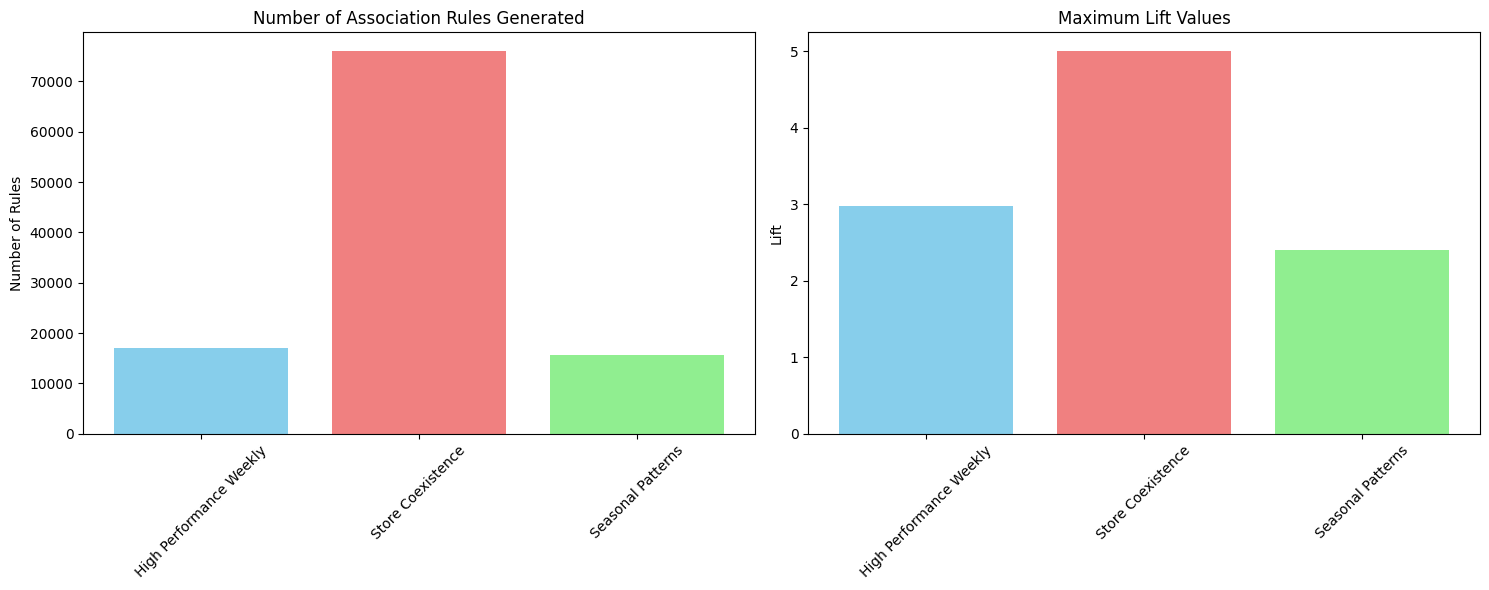


3. EXPORTING RESULTS
--------------------------------------------------
✓ High performance rules exported to 'high_performance_association_rules.csv'
✓ Store coexistence rules exported to 'store_coexistence_rules.csv'
✓ Seasonal rules exported to 'seasonal_association_rules.csv'
✓ Analysis summary exported to 'market_basket_summary.csv'

Market Basket Analysis completed! 4 files exported.

BUSINESS INSIGHTS FROM MARKET BASKET ANALYSIS

HIGH PERFORMANCE WEEKLY INSIGHTS:
----------------------------------------
1. When customers buy Dept_74, Dept_34
   They also tend to buy Dept_14
   (Confidence: 79.4%, Lift: 3.0x more likely)
   → STRONG association - Consider bundling these products

2. When customers buy Dept_14
   They also tend to buy Dept_74, Dept_34
   (Confidence: 40.3%, Lift: 3.0x more likely)
   → STRONG association - Consider bundling these products

3. When customers buy Dept_34
   They also tend to buy Dept_14, Dept_79
   (Confidence: 52.9%, Lift: 3.0x more likely)
   → ST

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Install mlxtend if not available (uncomment if needed)
# !pip install mlxtend

try:
    from mlxtend.frequent_patterns import fpgrowth, association_rules
    from mlxtend.preprocessing import TransactionEncoder
    print("✓ All required libraries imported successfully")
except ImportError as e:
    print(f"Import error: {e}")
    print("Please install: pip install mlxtend")
    exit()

print("="*70)
print("MARKET BASKET ANALYSIS - RETAIL DEPARTMENTS")
print("="*70)

# STEP 1: CREATE TRANSACTIONS FROM YOUR DATA

def create_high_performance_transactions(df, percentile_threshold=0.7):
    transactions = []
    transaction_count = 0
    for (store, date), group in df.groupby(['Store', 'Date']):
        if len(group) >= 2:
            threshold = group['Weekly_Sales'].quantile(percentile_threshold)
            high_perf_depts = group[group['Weekly_Sales'] >= threshold]['Dept'].tolist()
            if len(high_perf_depts) >= 2:
                transaction = [f"Dept_{dept}" for dept in sorted(high_perf_depts)]
                transactions.append(transaction)
                transaction_count += 1
    print(f"Created {transaction_count} high-performance transactions")
    return transactions

def create_store_coexistence_transactions(df):
    transactions = []
    for store in df['Store'].unique():
        store_data = df[df['Store'] == store]
        dept_avg = store_data.groupby('Dept')['Weekly_Sales'].mean()
        store_median = dept_avg.median()
        strong_depts = dept_avg[dept_avg >= store_median].index.tolist()
        if len(strong_depts) >= 2:
            transaction = [f"Dept_{dept}" for dept in sorted(strong_depts)]
            transactions.append(transaction)
    print(f"Created {len(transactions)} store coexistence transactions")
    return transactions

def create_seasonal_transactions(df):
    transactions = []
    for month in df['Month'].unique():
        month_data = df[df['Month'] == month]
        dept_performance = month_data.groupby('Dept')['Weekly_Sales'].mean()
        threshold = dept_performance.quantile(0.7)
        top_depts = dept_performance[dept_performance >= threshold].index.tolist()
        if len(top_depts) >= 3:
            transaction = [f"Dept_{dept}" for dept in sorted(top_depts)]
            transactions.append(transaction)
    print(f"Created {len(transactions)} seasonal transactions")
    return transactions 
    
# STEP 2: CREATE TRANSACTIONS USING YOUR DATA

print("\n1. CREATING TRANSACTION DATA")
print("-" * 50)

high_perf_transactions = create_high_performance_transactions(df_model_ready)
store_transactions = create_store_coexistence_transactions(df_model_ready)
seasonal_transactions = create_seasonal_transactions(df_model_ready)

print("\nSample transactions:")
if high_perf_transactions:
    print(f"High Performance: {high_perf_transactions[0]}")
if store_transactions:
    print(f"Store Coexistence: {store_transactions[0]}")
if seasonal_transactions:
    print(f"Seasonal: {seasonal_transactions[0]}")
    
# STEP 3: ROBUST ASSOCIATION ANALYSIS (FP-GROWTH)

def simple_association_analysis(transactions, analysis_name, 
                               min_support=0.1, min_confidence=0.5,
                               max_items=50, max_len=3):
    print(f"\n=== {analysis_name} ANALYSIS ===")
    
    if not transactions or len(transactions) == 0:
        print("No transactions available")
        return None, None
    
    print(f"Processing {len(transactions)} transactions")
    
    all_items = [item for t in transactions for item in t]
    item_counts = Counter(all_items)
    unique_items = len(item_counts)
    
    print(f"Unique items: {unique_items}")
    print(f"Most frequent items: {item_counts.most_common(5)}")
    
    if unique_items > max_items:
        min_freq = max(2, len(transactions) * 0.05)
        frequent_items = {item for item, count in item_counts.items() if count >= min_freq}
        filtered_transactions = []
        for transaction in transactions:
            filtered_trans = [item for item in transaction if item in frequent_items]
            if len(filtered_trans) >= 2:
                filtered_transactions.append(filtered_trans)
        transactions = filtered_transactions
        print(f"Filtered to {len(transactions)} transactions with {len(frequent_items)} frequent items")
    
    try:
        te = TransactionEncoder()
        te_ary = te.fit(transactions).transform(transactions)
        df_basket = pd.DataFrame(te_ary, columns=te.columns_)
        
        print(f"Transaction matrix shape: {df_basket.shape}")
        
        # ✅ Use FP-Growth instead of Apriori
        frequent_itemsets = fpgrowth(
            df_basket, min_support=min_support, use_colnames=True, max_len=max_len
        )
        
        if len(frequent_itemsets) == 0:
            print("No frequent itemsets found. Trying lower support threshold...")
            frequent_itemsets = fpgrowth(
                df_basket, min_support=min_support*0.5, use_colnames=True, max_len=max_len
            )
        
        if len(frequent_itemsets) == 0:
            print("Still no frequent itemsets. Try lowering min_support further.")
            return None, None
        
        print(f"Found {len(frequent_itemsets)} frequent itemsets")
        
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
        
        if len(rules) == 0:
            print("No rules found with current confidence. Trying lower threshold...")
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence*0.7)
        
        if len(rules) == 0:
            print("No association rules generated")
            return frequent_itemsets, None
        
        rules = rules.sort_values('lift', ascending=False)
        print(f"Generated {len(rules)} association rules")
        
        print(f"\nTOP 10 ASSOCIATION RULES:")
        print("-" * 80)
        for i, (idx, rule) in enumerate(rules.head(10).iterrows(), 1):
            antecedents = ', '.join(list(rule['antecedents']))
            consequents = ', '.join(list(rule['consequents']))
            print(f"{i:2d}. {antecedents:35s} => {consequents:20s}")
            print(f"    Support: {rule['support']:.3f} | Confidence: {rule['confidence']:.3f} | Lift: {rule['lift']:.2f}\n")
        
        return frequent_itemsets, rules
        
    except Exception as e:
        print(f"Error in analysis: {e}")
        return None, None

# STEP 4: RUN ANALYSIS ON ALL TRANSACTION TYPES

print("\n2. RUNNING ASSOCIATION ANALYSIS")
print("=" * 50)

freq_hp, rules_hp = simple_association_analysis(
    high_perf_transactions, 
    "HIGH PERFORMANCE WEEKLY", 
    min_support=0.1,   # bumped up for safety
    min_confidence=0.3
)

freq_store, rules_store = simple_association_analysis(
    store_transactions, 
    "STORE COEXISTENCE", 
    min_support=0.15, 
    min_confidence=0.4
)

freq_seasonal, rules_seasonal = simple_association_analysis(
    seasonal_transactions, 
    "SEASONAL PATTERNS", 
    min_support=0.2, 
    min_confidence=0.5
)

# STEP 5: RESULTS SUMMARY AND VISUALIZATION

print("\n" + "="*70)
print("RESULTS SUMMARY")
print("="*70)

results_summary = []

if rules_hp is not None:
    results_summary.append({
        'Analysis': 'High Performance Weekly',
        'Rules': len(rules_hp),
        'Max_Lift': rules_hp['lift'].max(),
        'Avg_Confidence': rules_hp['confidence'].mean()
    })

if rules_store is not None:
    results_summary.append({
        'Analysis': 'Store Coexistence', 
        'Rules': len(rules_store),
        'Max_Lift': rules_store['lift'].max(),
        'Avg_Confidence': rules_store['confidence'].mean()
    })

if rules_seasonal is not None:
    results_summary.append({
        'Analysis': 'Seasonal Patterns',
        'Rules': len(rules_seasonal), 
        'Max_Lift': rules_seasonal['lift'].max(),
        'Avg_Confidence': rules_seasonal['confidence'].mean()
    })

if results_summary:
    summary_df = pd.DataFrame(results_summary)
    print(summary_df.round(3))
    
    if len(results_summary) > 0:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        axes[0].bar(summary_df['Analysis'], summary_df['Rules'], color=['skyblue', 'lightcoral', 'lightgreen'][:len(summary_df)])
        axes[0].set_title('Number of Association Rules Generated')
        axes[0].set_ylabel('Number of Rules')
        plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)
        axes[1].bar(summary_df['Analysis'], summary_df['Max_Lift'], color=['skyblue', 'lightcoral', 'lightgreen'][:len(summary_df)])
        axes[1].set_title('Maximum Lift Values')
        axes[1].set_ylabel('Lift')
        plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("No successful analyses completed.")

# STEP 6: EXPORT RESULTS

print("\n3. EXPORTING RESULTS")
print("-" * 50)

export_count = 0

if rules_hp is not None:
    rules_hp.to_csv('high_performance_association_rules.csv', index=False)
    print("✓ High performance rules exported to 'high_performance_association_rules.csv'")
    export_count += 1

if rules_store is not None:
    rules_store.to_csv('store_coexistence_rules.csv', index=False) 
    print("✓ Store coexistence rules exported to 'store_coexistence_rules.csv'")
    export_count += 1

if rules_seasonal is not None:
    rules_seasonal.to_csv('seasonal_association_rules.csv', index=False)
    print("✓ Seasonal rules exported to 'seasonal_association_rules.csv'")
    export_count += 1

if results_summary:
    summary_df.to_csv('market_basket_summary.csv', index=False)
    print("✓ Analysis summary exported to 'market_basket_summary.csv'")
    export_count += 1

print(f"\nMarket Basket Analysis completed! {export_count} files exported.")

# STEP 7: BUSINESS INSIGHTS

print("\n" + "="*70)
print("BUSINESS INSIGHTS FROM MARKET BASKET ANALYSIS")
print("="*70)

def generate_business_insights(rules, analysis_name):
    if rules is None or len(rules) == 0:
        return
    print(f"\n{analysis_name} INSIGHTS:")
    print("-" * 40)
    top_rules = rules.head(3)
    for i, (idx, rule) in enumerate(top_rules.iterrows(), 1):
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])
        print(f"{i}. When customers buy {', '.join(antecedents)}")
        print(f"   They also tend to buy {', '.join(consequents)}")
        print(f"   (Confidence: {rule['confidence']:.1%}, Lift: {rule['lift']:.1f}x more likely)")
        if rule['lift'] > 2:
            print("   → STRONG association - Consider bundling these products")
        elif rule['lift'] > 1.5:
            print("   → MODERATE association - Cross-promotion opportunity")
        else:
            print("   → WEAK association - Monitor for seasonal changes")
        print()

if rules_hp is not None:
    generate_business_insights(rules_hp, "HIGH PERFORMANCE WEEKLY")
if rules_store is not None:
    generate_business_insights(rules_store, "STORE COEXISTENCE")
if rules_seasonal is not None:
    generate_business_insights(rules_seasonal, "SEASONAL PATTERNS")

print("\n" + "="*70)
print("MARKET BASKET ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*70)


### Department Co-occurrence & Correlation

In [59]:
# SIMPLE DEPARTMENT CO-OCCURRENCE ANALYSIS

print("\n" + "="*50)
print("DEPARTMENT CO-OCCURRENCE ANALYSIS")
print("="*50)

# Create a co-occurrence matrix
dept_cooccurrence = pd.crosstab(df_model_ready['Store'], df_model_ready['Dept'])
dept_correlations = dept_cooccurrence.T.corr()

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(dept_correlations.columns)):
    for j in range(i+1, len(dept_correlations.columns)):
        corr_val = dept_correlations.iloc[i, j]
        if abs(corr_val) > 0.3:
            dept1 = dept_correlations.columns[i]
            dept2 = dept_correlations.columns[j]
            high_corr_pairs.append((dept1, dept2, corr_val))

high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print(f"\nHighly Correlated Department Pairs (|correlation| > 0.3):")
for dept1, dept2, corr in high_corr_pairs[:10]:
    print(f"Dept {dept1} ↔ Dept {dept2}: {corr:.3f}")

# Holiday Analysis
holiday_analysis = df_model_ready.groupby(['Dept', 'IsHoliday'])['Weekly_Sales'].agg(['mean', 'count']).round(2)
holiday_analysis.columns = ['Avg_Sales', 'Count']
holiday_pivot = holiday_analysis.reset_index().pivot(index='Dept', columns='IsHoliday', values='Avg_Sales')
holiday_pivot.columns = ['Regular', 'Holiday']
holiday_pivot['Holiday_Lift'] = ((holiday_pivot['Holiday'] / holiday_pivot['Regular']) - 1) * 100

print("\nTop 10 Holiday Performance Boosters:")
holiday_sorted = holiday_pivot.sort_values('Holiday_Lift', ascending=False)
print(holiday_sorted.head(10))

print("\nMARKET BASKET ANALYSIS COMPLETE!")



DEPARTMENT CO-OCCURRENCE ANALYSIS

Highly Correlated Department Pairs (|correlation| > 0.3):
Dept 2 ↔ Dept 6: 0.999
Dept 1 ↔ Dept 4: 0.995
Dept 2 ↔ Dept 4: 0.994
Dept 1 ↔ Dept 2: 0.992
Dept 24 ↔ Dept 27: 0.992
Dept 31 ↔ Dept 32: 0.990
Dept 38 ↔ Dept 44: 0.989
Dept 28 ↔ Dept 31: 0.989
Dept 4 ↔ Dept 6: 0.989
Dept 28 ↔ Dept 32: 0.988

Top 10 Holiday Performance Boosters:
       Regular   Holiday  Holiday_Lift
Dept                                  
99      311.44   1255.50    303.127408
77      191.84    620.35    223.368432
59      646.90   1310.37    102.561447
18     6337.67  11526.04     81.865575
6      4511.30   7832.55     73.620686
55    10061.24  16676.87     65.753625
71     5597.42   7398.24     32.172322
14    14295.29  18837.18     31.771933
48     1315.23   1725.28     31.177056
5     19110.94  24706.29     29.278256

MARKET BASKET ANALYSIS COMPLETE!


## ***10. Demand Forecasting***

In [60]:
# 10. DEMAND FORECASTING - PART 1
# Setup, Imports, and Initial Data Preparation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
import joblib
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("DEMAND FORECASTING ANALYSIS - PART 1")
print("="*70)

# Convert Date column to datetime and sort
df_model_ready['Date'] = pd.to_datetime(df_model_ready['Date'])
df_forecast = df_model_ready.sort_values(['Store', 'Dept', 'Date']).copy()

print(f"Forecasting dataset shape: {df_forecast.shape}")
print(f"Date range: {df_forecast['Date'].min()} to {df_forecast['Date'].max()}")
print(f"Stores: {df_forecast['Store'].nunique()}, Departments: {df_forecast['Dept'].nunique()}")

# Check missing data
missing_data = df_forecast.isnull().sum()
print("\nMissing data per column:")
print(missing_data[missing_data > 0])


DEMAND FORECASTING ANALYSIS - PART 1
Forecasting dataset shape: (421570, 29)
Date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00
Stores: 45, Departments: 81

Missing data per column:
Series([], dtype: int64)


### Time Series Decomposition


Analyzing Store 1, Department 1 (largest dataset)


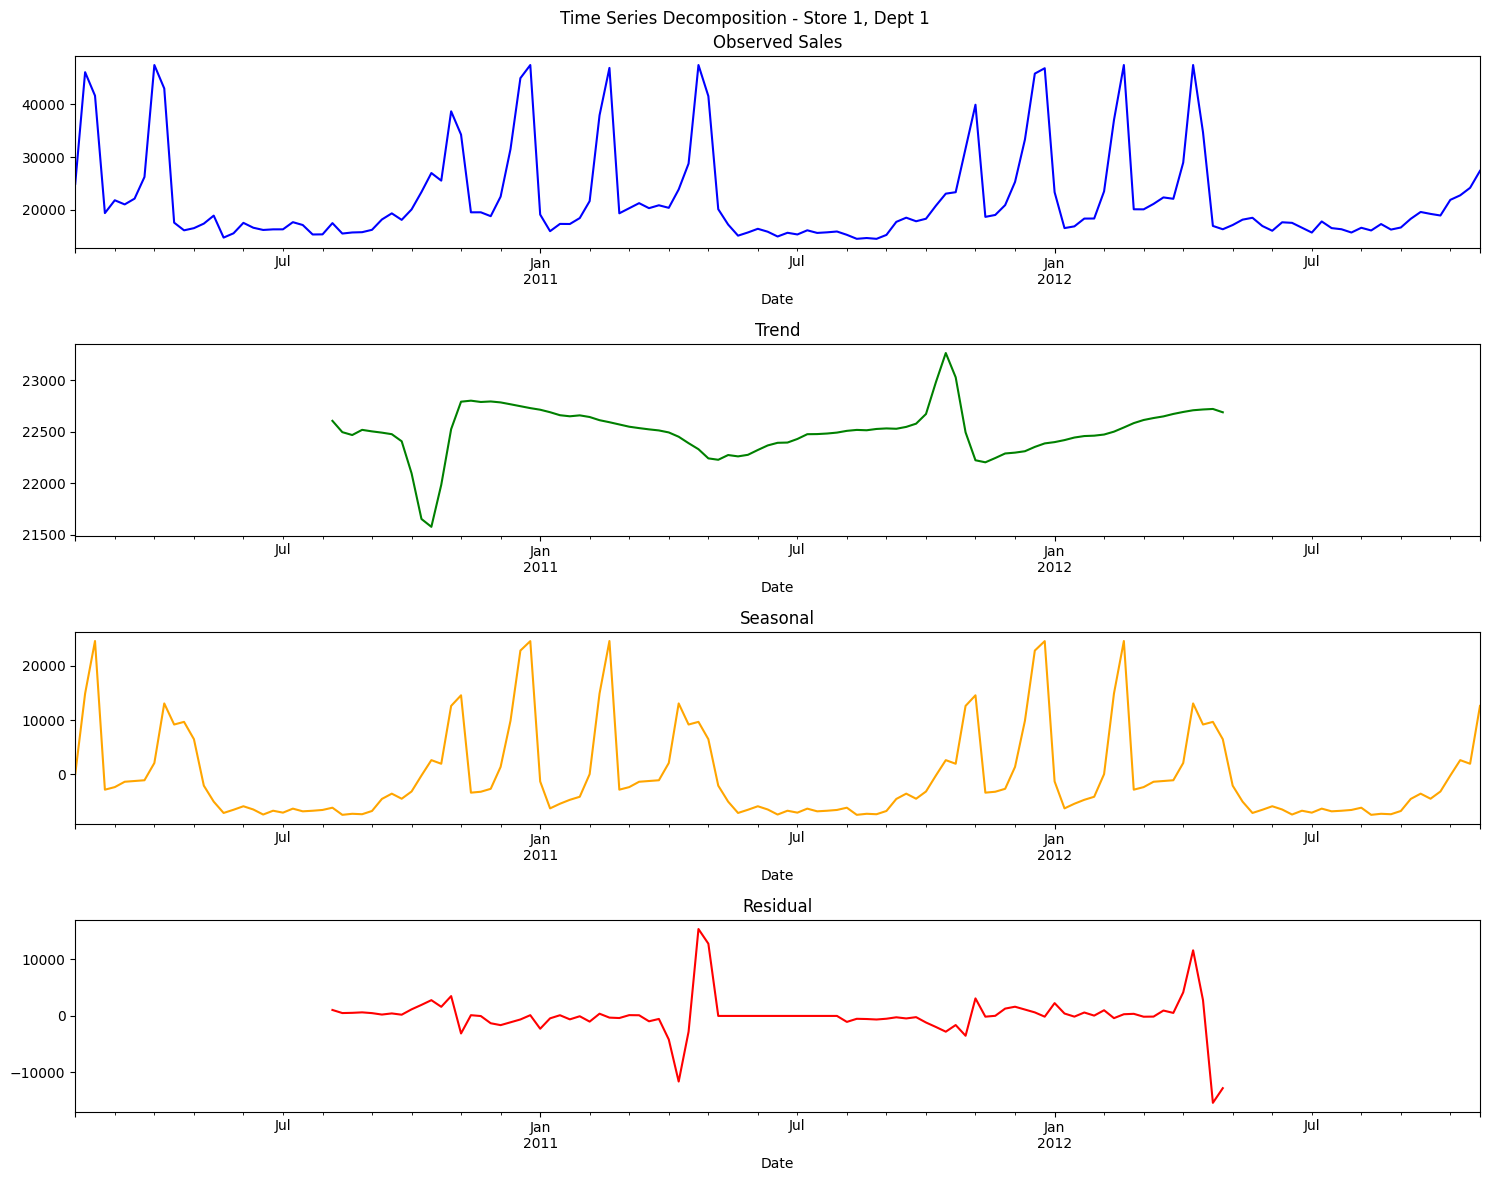

In [61]:
# PART 2: TIME SERIES DECOMPOSITION

def analyze_time_series_patterns(df, store_id=1, dept_id=1):
    """Analyze time series patterns for a specific store-department combination"""
    ts_data = df[(df['Store']==store_id) & (df['Dept']==dept_id)].copy()
    
    if len(ts_data) < 24:
        print(f"Insufficient data for Store {store_id}, Dept {dept_id}")
        return None
    
    ts_data = ts_data.set_index('Date')['Weekly_Sales'].sort_index()
    
    # Handle missing dates by resampling weekly
    ts_data = ts_data.resample('W').mean().fillna(method='ffill')
    
    # Choose period for seasonal decomposition
    period = 52 if len(ts_data) >= 52 else max(4, len(ts_data) // 4)
    
    try:
        decomposition = seasonal_decompose(ts_data, model='additive', period=period)
        
        # Plot decomposition
        fig, axes = plt.subplots(4, 1, figsize=(15, 12))
        decomposition.observed.plot(ax=axes[0], title='Observed Sales', color='blue')
        decomposition.trend.plot(ax=axes[1], title='Trend', color='green')
        decomposition.seasonal.plot(ax=axes[2], title='Seasonal', color='orange')
        decomposition.resid.plot(ax=axes[3], title='Residual', color='red')
        plt.suptitle(f'Time Series Decomposition - Store {store_id}, Dept {dept_id}')
        plt.tight_layout()
        plt.show()
        
        return decomposition
    except Exception as e:
        print(f"Decomposition failed for Store {store_id}, Dept {dept_id}: {e}")
        return None

# Analyze the largest store-department combination
sample_analysis = df_forecast.groupby(['Store','Dept']).size().idxmax()
sample_store, sample_dept = sample_analysis
print(f"\nAnalyzing Store {sample_store}, Department {sample_dept} (largest dataset)")

decomp_result = analyze_time_series_patterns(df_forecast, sample_store, sample_dept)


### Monthly Sales Trend Analysis


MONTHLY SALES TREND ANALYSIS


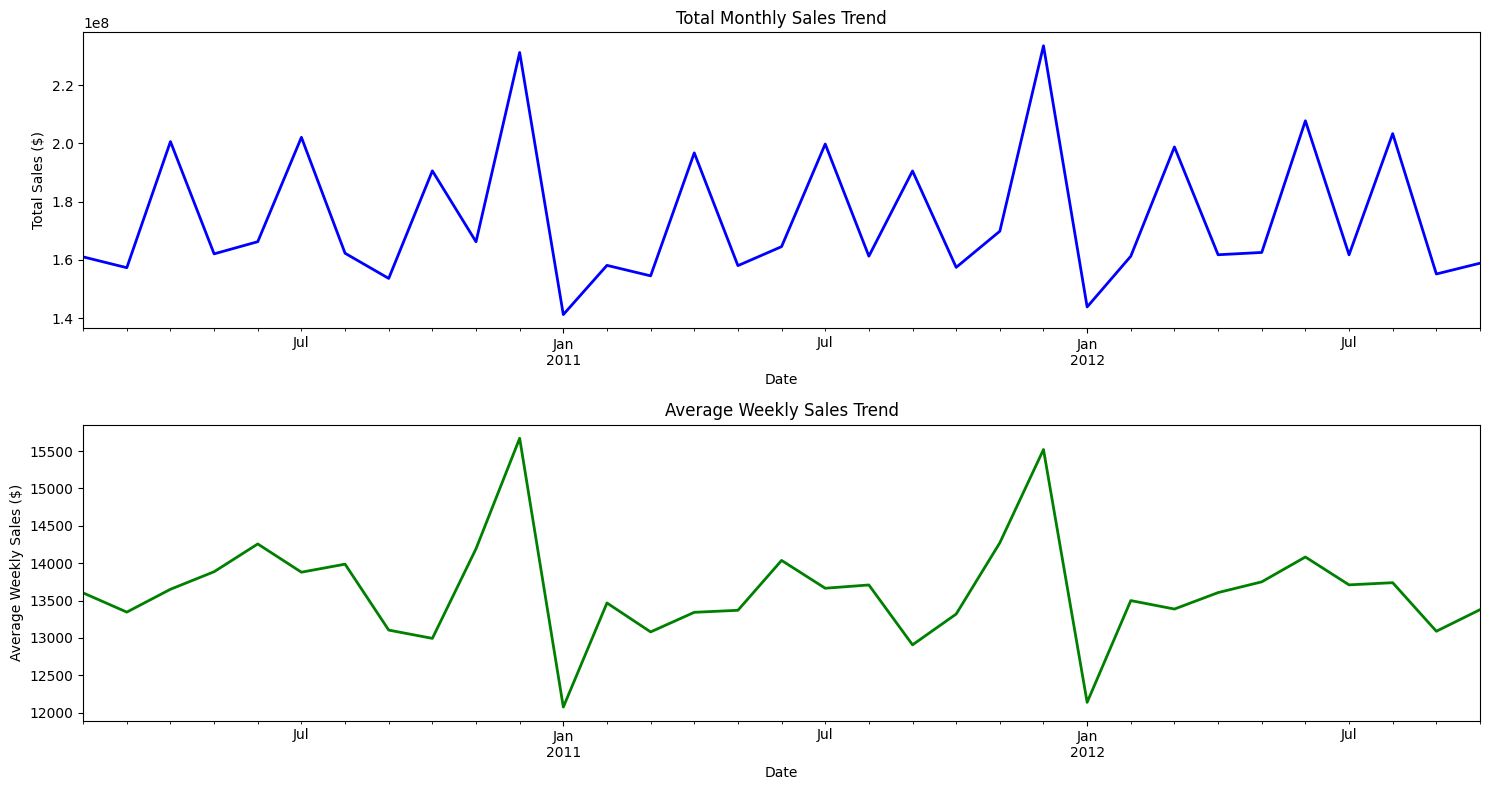

Peak month (total sales): 2011-12
Peak total sales: $233,526,613.53
Average monthly sales: $174,369,080.98


In [62]:
# PART 2B: MONTHLY SALES TREND

print("\n" + "="*50)
print("MONTHLY SALES TREND ANALYSIS")
print("="*50)

monthly_sales = df_forecast.groupby(df_forecast['Date'].dt.to_period('M'))['Weekly_Sales'].agg(['sum','mean','count'])
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(15, 8))

# Total Monthly Sales
plt.subplot(2, 1, 1)
monthly_sales['sum'].plot(title='Total Monthly Sales Trend', color='blue', linewidth=2)
plt.ylabel('Total Sales ($)')

# Average Weekly Sales per Month
plt.subplot(2, 1, 2)
monthly_sales['mean'].plot(title='Average Weekly Sales Trend', color='green', linewidth=2)
plt.ylabel('Average Weekly Sales ($)')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

# Key insights
print(f"Peak month (total sales): {monthly_sales['sum'].idxmax().strftime('%Y-%m')}")
print(f"Peak total sales: ${monthly_sales['sum'].max():,.2f}")
print(f"Average monthly sales: ${monthly_sales['sum'].mean():,.2f}")


### Feature Engineering

In [63]:
# PART 3: FEATURE ENGINEERING

print("\n" + "="*50)
print("FEATURE ENGINEERING FOR FORECASTING")
print("="*50)

def create_forecasting_features(df):
    """Create features for demand forecasting without data leakage"""
    df_features = df.copy()
    
    # -----------------------------
    # Time-based features (no leakage)
    # -----------------------------
    df_features['DayOfYear'] = df_features['Date'].dt.dayofyear
    df_features['Month_sin'] = np.sin(2 * np.pi * df_features['Month'] / 12)
    df_features['Month_cos'] = np.cos(2 * np.pi * df_features['Month'] / 12)
    df_features['Week_sin'] = np.sin(2 * np.pi * df_features['Week'] / 52)
    df_features['Week_cos'] = np.cos(2 * np.pi * df_features['Week'] / 52)
    
    # -----------------------------
    # Economic interaction features
    # -----------------------------
    df_features['CPI_Unemployment_Interaction'] = df_features['CPI'] * df_features['Unemployment']
    df_features['Fuel_CPI_Ratio'] = df_features['Fuel_Price'] / (df_features['CPI'] + 1e-6)
    
    # -----------------------------
    # Promotional features
    # -----------------------------
    df_features['Total_Markdowns'] = (
        df_features['MarkDown1'] + df_features['MarkDown2'] + 
        df_features['MarkDown3'] + df_features['MarkDown4'] + 
        df_features['MarkDown5']
    )
    
    # Markdown intensity using lagged sales
    if 'Sales_Rolling_4' in df_features.columns:
        df_features['Markdown_Intensity'] = df_features['Total_Markdowns'] / (df_features['Sales_Rolling_4'] + 1e-6)
    else:
        lagged_sales = df_features.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
        df_features['Markdown_Intensity'] = df_features['Total_Markdowns'] / (lagged_sales + 1e-6)
    
    df_features['Has_Promotions'] = (df_features['Total_Markdowns'] > 0).astype(int)
    
    # Weather-economic interaction
    df_features['Temp_Fuel_Interaction'] = df_features['Temperature'] * df_features['Fuel_Price']
    
    # Handle infinite and NaN values
    df_features = df_features.replace([np.inf, -np.inf], np.nan)
    df_features = df_features.fillna(0)
    
    return df_features

# Apply feature engineering
df_forecast_features = create_forecasting_features(df_forecast)

# Check newly created features
original_cols = set(df_forecast.columns)
new_features = [col for col in df_forecast_features.columns if col not in original_cols]

print("Created new features:")
for feature in new_features:
    print(f"  - {feature}")



FEATURE ENGINEERING FOR FORECASTING
Created new features:
  - DayOfYear
  - Month_sin
  - Month_cos
  - Week_sin
  - Week_cos
  - CPI_Unemployment_Interaction
  - Fuel_CPI_Ratio
  - Markdown_Intensity
  - Has_Promotions
  - Temp_Fuel_Interaction


### Model Preparation

In [64]:
# PART 4: MODEL PREPARATION & TIME SERIES CROSS-VALIDATION

print("\n" + "="*50)
print("MODEL PREPARATION")
print("="*50)

# -----------------------------
# Select features for modeling
# -----------------------------
feature_columns = [
    # Lag features
    'Sales_Lag_1', 'Sales_Lag_2', 'Sales_Rolling_4',
    
    # Store characteristics
    'Size', 'Type_B', 'Type_C',
    
    # Economic factors
    'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'CPI_Unemployment_Interaction', 'Fuel_CPI_Ratio', 'Temp_Fuel_Interaction',
    
    # Promotional factors
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
    'Total_Markdowns', 'Markdown_Intensity', 'Has_Promotions',
    
    # Seasonal / Time-based factors
    'IsHoliday', 'Month', 'Quarter',
    'Month_sin', 'Month_cos', 'Week_sin', 'Week_cos', 'DayOfYear'
]

# Keep only features available in dataset
available_features = [col for col in feature_columns if col in df_forecast_features.columns]
missing_features = [col for col in feature_columns if col not in df_forecast_features.columns]

print(f"Available features: {len(available_features)}")
print(f"Missing features: {missing_features}")

# -----------------------------
# Prepare X (features) and y (target)
# -----------------------------
X = df_forecast_features[available_features].fillna(0)
y = df_forecast_features['Weekly_Sales']

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")

# -----------------------------
# TimeSeriesSplit setup
# -----------------------------
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

# -----------------------------
# Train-test split respecting time order
# -----------------------------
# Ensure data is sorted by date first
df_forecast_features = df_forecast_features.sort_values('Date').reset_index(drop=True)
split_date = df_forecast_features['Date'].quantile(0.8)
train_mask = df_forecast_features['Date'] <= split_date
test_mask = df_forecast_features['Date'] > split_date

X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training period: {df_forecast_features[train_mask]['Date'].min().strftime('%Y-%m-%d')} to {df_forecast_features[train_mask]['Date'].max().strftime('%Y-%m-%d')}")
print(f"Test period: {df_forecast_features[test_mask]['Date'].min().strftime('%Y-%m-%d')} to {df_forecast_features[test_mask]['Date'].max().strftime('%Y-%m-%d')}")



MODEL PREPARATION
Available features: 29
Missing features: []
Feature matrix shape: (421570, 29)
Target variable shape: (421570,)
Training set: 338738 samples
Test set: 82832 samples
Training period: 2010-02-05 to 2012-04-13
Test period: 2012-04-20 to 2012-10-26


### Model Training and Comparison

In [65]:
# PART 5: MODEL TRAINING, EVALUATION & COMPARISON

print("\n" + "="*50)
print("MODEL TRAINING AND COMPARISON")
print("="*50)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# -----------------------------
# Define models
# -----------------------------
# DATA VALIDATION
print(f"Training data range: {y_train.min():.2f} to {y_train.max():.2f}")
print(f"Feature matrix info: {X_train.shape}, inf values: {np.isinf(X_train).sum().sum()}")

# Remove invalid data
valid_mask = (y_train > 0) & (y_train < np.inf) & ~np.isnan(y_train)
X_train, X_test = X_train[valid_mask], X_test
y_train, y_test = y_train[valid_mask], y_test

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# -----------------------------
# Scale features for linear models (fit only on training data)
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Train models and evaluate
# -----------------------------
model_results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    try:
        # Linear models: use scaled features
        if 'Regression' in model_name:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            
            # SANITY CHECK
            if y_pred.max() < 1000:
                print(f"WARNING: {model_name} predictions are too low! Max: {y_pred.max():.2f}")
            if y_pred.min() < 0:
                y_pred = np.maximum(y_pred, 100)  # Set minimum $100
            
            # TimeSeries cross-validation
            cv_scores = []
            for train_idx, val_idx in tscv.split(X):
                X_train_cv = X.iloc[train_idx]
                X_val_cv = X.iloc[val_idx]
                y_train_cv = y.iloc[train_idx]
                y_val_cv = y.iloc[val_idx]
                
                scaler_cv = StandardScaler()
                X_train_cv_scaled = scaler_cv.fit_transform(X_train_cv)
                X_val_cv_scaled = scaler_cv.transform(X_val_cv)
                
                model_cv = type(model)(**model.get_params())
                model_cv.fit(X_train_cv_scaled, y_train_cv)
                y_pred_cv = model_cv.predict(X_val_cv_scaled)
                
                cv_scores.append(-mean_absolute_error(y_val_cv, y_pred_cv))
            
            cv_scores = np.array(cv_scores)
        
        # Tree-based models: no scaling
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            cv_scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_absolute_error')
        
        # Metrics
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        cv_mae = -cv_scores.mean()
        cv_std = cv_scores.std()
        
        model_results[model_name] = {
            'model': model,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2,
            'CV_MAE': cv_mae,
            'CV_STD': cv_std,
            'predictions': y_pred
        }
        
        print(f"  MAE: ${mae:,.2f}")
        print(f"  RMSE: ${rmse:,.2f}")
        print(f"  R²: {r2:.4f}")
        print(f"  CV MAE: ${cv_mae:,.2f} (±${cv_std:,.2f})")
        
    except Exception as e:
        print(f"  Error training {model_name}: {e}")

# -----------------------------
# Model comparison
# -----------------------------
comparison_data = []
for model_name, results in model_results.items():
    comparison_data.append({
        'Model': model_name,
        'MAE': results['MAE'],
        'RMSE': results['RMSE'],
        'R²': results['R2'],
        'CV_MAE': results['CV_MAE']
    })

comparison_df = pd.DataFrame(comparison_data).round(2)

# VALIDATION CHECK
print("\nModel Prediction Validation:")
for model_name in model_results.keys():
    preds = model_results[model_name]['predictions']
    print(f"{model_name}: Min=${preds.min():.0f}, Max=${preds.max():.0f}, Mean=${preds.mean():.0f}")
    if preds.max() < 1000:
        print(f"  ⚠️  WARNING: {model_name} predictions are unrealistically low!")
comparison_df = comparison_df.sort_values('CV_MAE')

print("\nModel Comparison Results:")
print(comparison_df.to_string(index=False))

# VALIDATION CHECK
print("\nModel Prediction Validation:")
for model_name in model_results.keys():
    preds = model_results[model_name]['predictions']
    print(f"{model_name}: Min=${preds.min():.0f}, Max=${preds.max():.0f}, Mean=${preds.mean():.0f}")
    if preds.max() < 1000:
        print(f"WARNING: {model_name} predictions are unrealistically low!")

# -----------------------------
# Select best model
# -----------------------------
if len(comparison_df) > 0:
    best_model_name = comparison_df.iloc[0]['Model']
    best_model = model_results[best_model_name]['model']
    best_predictions = model_results[best_model_name]['predictions']
    
    print(f"\nBEST MODEL: {best_model_name}")
    print(f"Cross-validation MAE: ${comparison_df.iloc[0]['CV_MAE']:,.2f}")
    
    # Prepare scaler for deployment if linear model
    if 'Regression' in best_model_name:
        final_scaler = StandardScaler()
        final_scaler.fit(X_train)
        print("Feature scaler prepared for deployment")
    else:
        final_scaler = None
        print("No scaler needed for tree-based model")


MODEL TRAINING AND COMPARISON
Training data range: -4988.94 to 47395.16
Feature matrix info: (338738, 29), inf values: 0

Training Linear Regression...
  MAE: $814.00
  RMSE: $1,710.99
  R²: 0.9857
  CV MAE: $1,072.65 (±$160.71)

Training Ridge Regression...
  MAE: $813.98
  RMSE: $1,710.98
  R²: 0.9857
  CV MAE: $1,072.46 (±$160.59)

Training Lasso Regression...
  MAE: $807.28
  RMSE: $1,710.12
  R²: 0.9857
  CV MAE: $1,060.98 (±$161.57)

Training Random Forest...
  MAE: $569.69
  RMSE: $1,216.74
  R²: 0.9927
  CV MAE: $779.47 (±$147.93)

Training Gradient Boosting...
  MAE: $736.82
  RMSE: $1,496.41
  R²: 0.9890
  CV MAE: $947.72 (±$146.25)

Model Prediction Validation:
Linear Regression: Min=$100, Max=$59602, Mean=$11457
Ridge Regression: Min=$100, Max=$59598, Mean=$11457
Lasso Regression: Min=$100, Max=$59422, Mean=$11443
Random Forest: Min=$0, Max=$47395, Mean=$11427
Gradient Boosting: Min=$-472, Max=$49076, Mean=$11458

Model Comparison Results:
            Model    MAE    RMSE 

### Feature Importance Analysis


FEATURE IMPORTANCE ANALYSIS
Top 15 Features (Random Forest):
                     Feature  Importance
             Sales_Rolling_4    0.977808
                 Sales_Lag_2    0.007941
                 Sales_Lag_1    0.004489
                   DayOfYear    0.002259
                    Week_cos    0.001284
CPI_Unemployment_Interaction    0.000584
                 Temperature    0.000569
       Temp_Fuel_Interaction    0.000553
                  Fuel_Price    0.000540
                         CPI    0.000514
                    Week_sin    0.000512
                Unemployment    0.000491
                        Size    0.000485
              Fuel_CPI_Ratio    0.000460
                   IsHoliday    0.000194


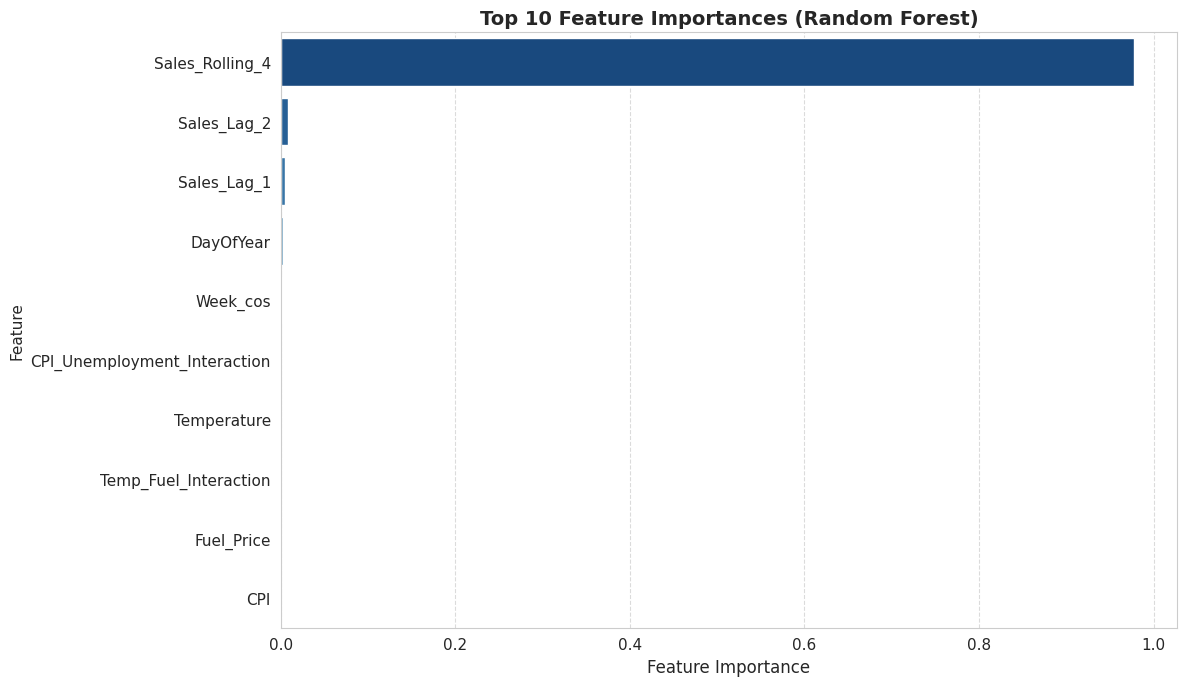


PREDICTION ANALYSIS & VISUALIZATION


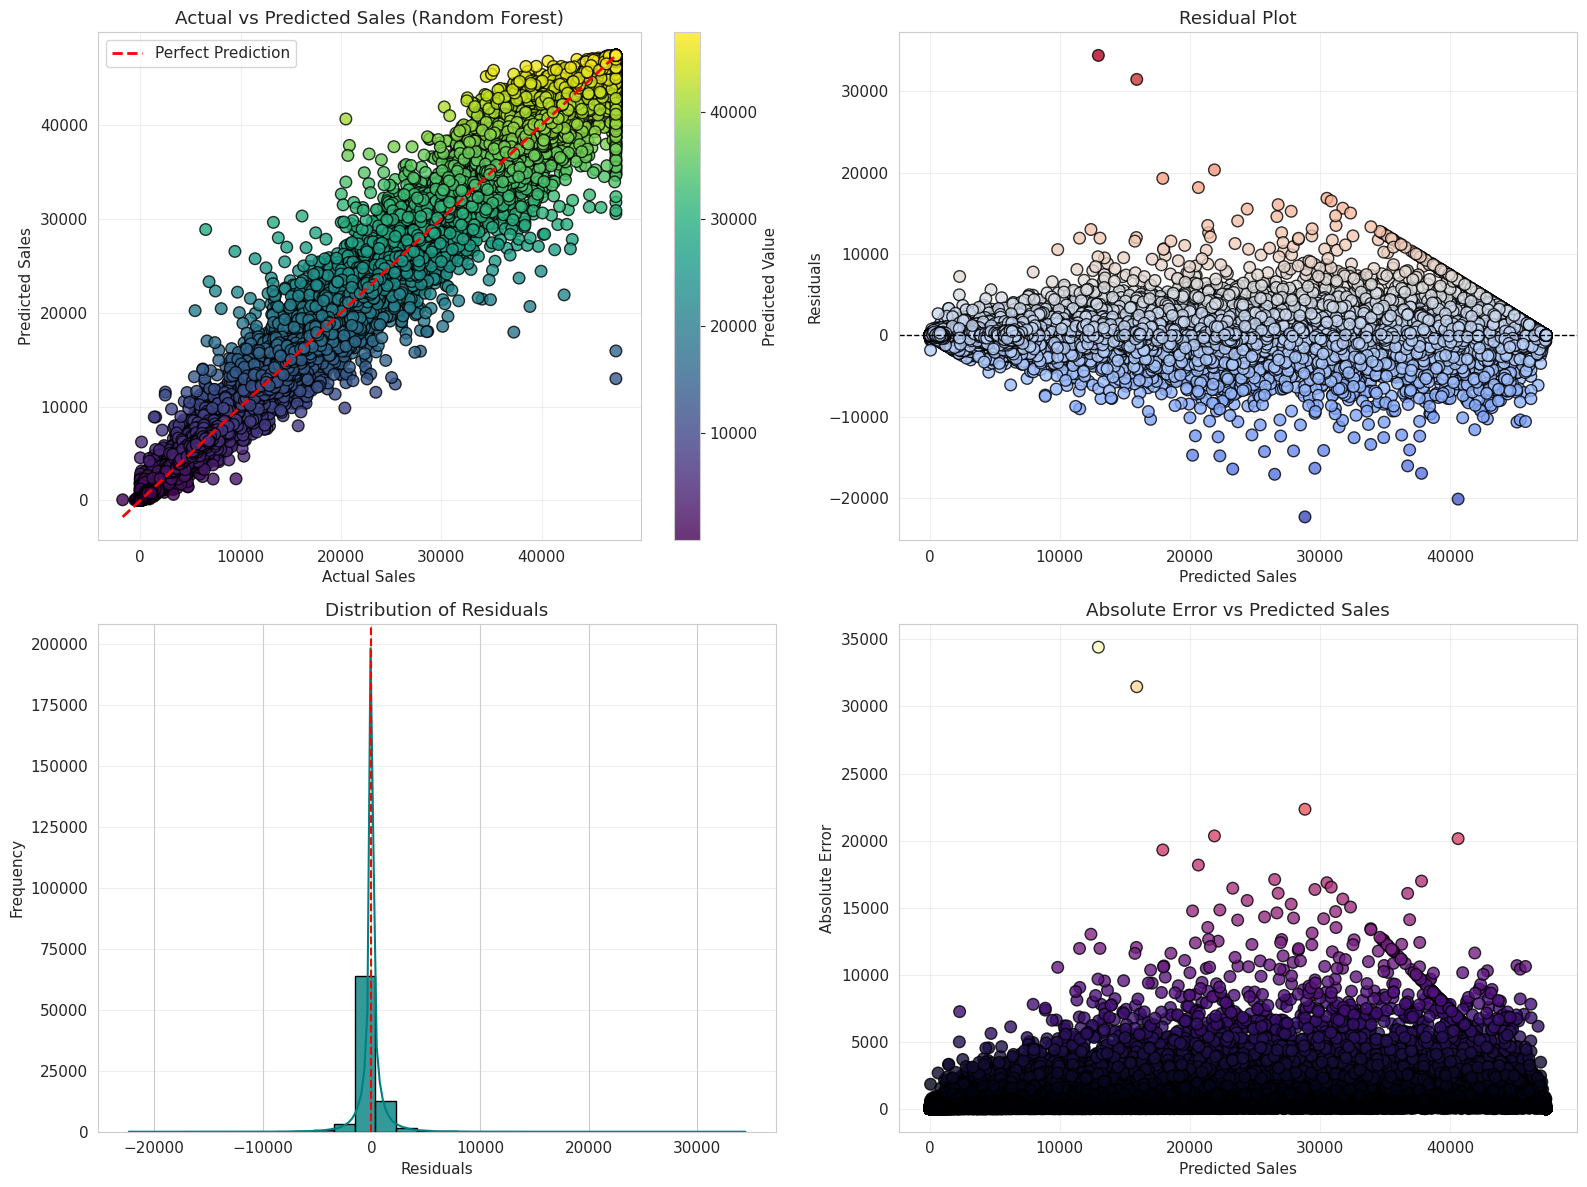

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 11})

print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)

if best_model is not None:
    # Tree-based models
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'Feature': available_features,
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print(f"Top 15 Features ({best_model_name}):")
        print(feature_importance.head(15).to_string(index=False))
        
        # Plot top 10 features with modern colors
        top_features = feature_importance.head(10)
        plt.figure(figsize=(12, 7))
        sns.barplot(
            x='Importance', y='Feature',
            data=top_features,
            palette='Blues_r'
        )
        plt.xlabel('Feature Importance', fontsize=12)
        plt.title(f'Top 10 Feature Importances ({best_model_name})', fontsize=14, weight='bold')
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    
    # Linear models: coefficient-based importance
    elif hasattr(best_model, 'coef_'):
        feature_coeff = pd.DataFrame({
            'Feature': available_features,
            'Coefficient': best_model.coef_,
            'Abs_Coefficient': np.abs(best_model.coef_)
        }).sort_values('Abs_Coefficient', ascending=False)
        
        print(f"Top 15 Features by Coefficient Magnitude ({best_model_name}):")
        print(feature_coeff.head(15)[['Feature', 'Coefficient']].to_string(index=False))

# -----------------------------
# PREDICTION ANALYSIS & VISUALIZATION
# -----------------------------
if best_predictions is not None:
    print("\n" + "="*50)
    print("PREDICTION ANALYSIS & VISUALIZATION")
    print("="*50)
    
    residuals = y_test - best_predictions
    abs_errors = np.abs(residuals)

    plt.figure(figsize=(16, 12))
    
    # 1. Actual vs Predicted
    plt.subplot(2, 2, 1)
    scatter = plt.scatter(
        y_test, best_predictions,
        c=best_predictions, cmap='viridis',
        edgecolor='black', alpha=0.8, s=70
    )
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color='red', linestyle='--', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(f'Actual vs Predicted Sales ({best_model_name})')
    plt.legend()
    plt.colorbar(scatter, label='Predicted Value')
    plt.grid(alpha=0.3)

    # 2. Residuals vs Predicted
    plt.subplot(2, 2, 2)
    plt.scatter(best_predictions, residuals,
                c=residuals, cmap='coolwarm', edgecolor='black', alpha=0.8, s=70)
    plt.axhline(y=0, color='black', linestyle='--', lw=1)
    plt.xlabel('Predicted Sales')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.grid(alpha=0.3)

    # 3. Residuals Distribution
    plt.subplot(2, 2, 3)
    sns.histplot(residuals, bins=30, kde=True,
                 color='teal', edgecolor='black', alpha=0.8)
    plt.axvline(x=0, color='red', linestyle='--', lw=1.5)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    plt.grid(axis='y', alpha=0.3)

    # 4. Absolute Error vs Predicted
    plt.subplot(2, 2, 4)
    plt.scatter(best_predictions, abs_errors,
                c=abs_errors, cmap='magma', edgecolor='black', alpha=0.8, s=70)
    plt.xlabel('Predicted Sales')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs Predicted Sales')
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

FUTURE SALES FORECASTING SYSTEM
Model training completed


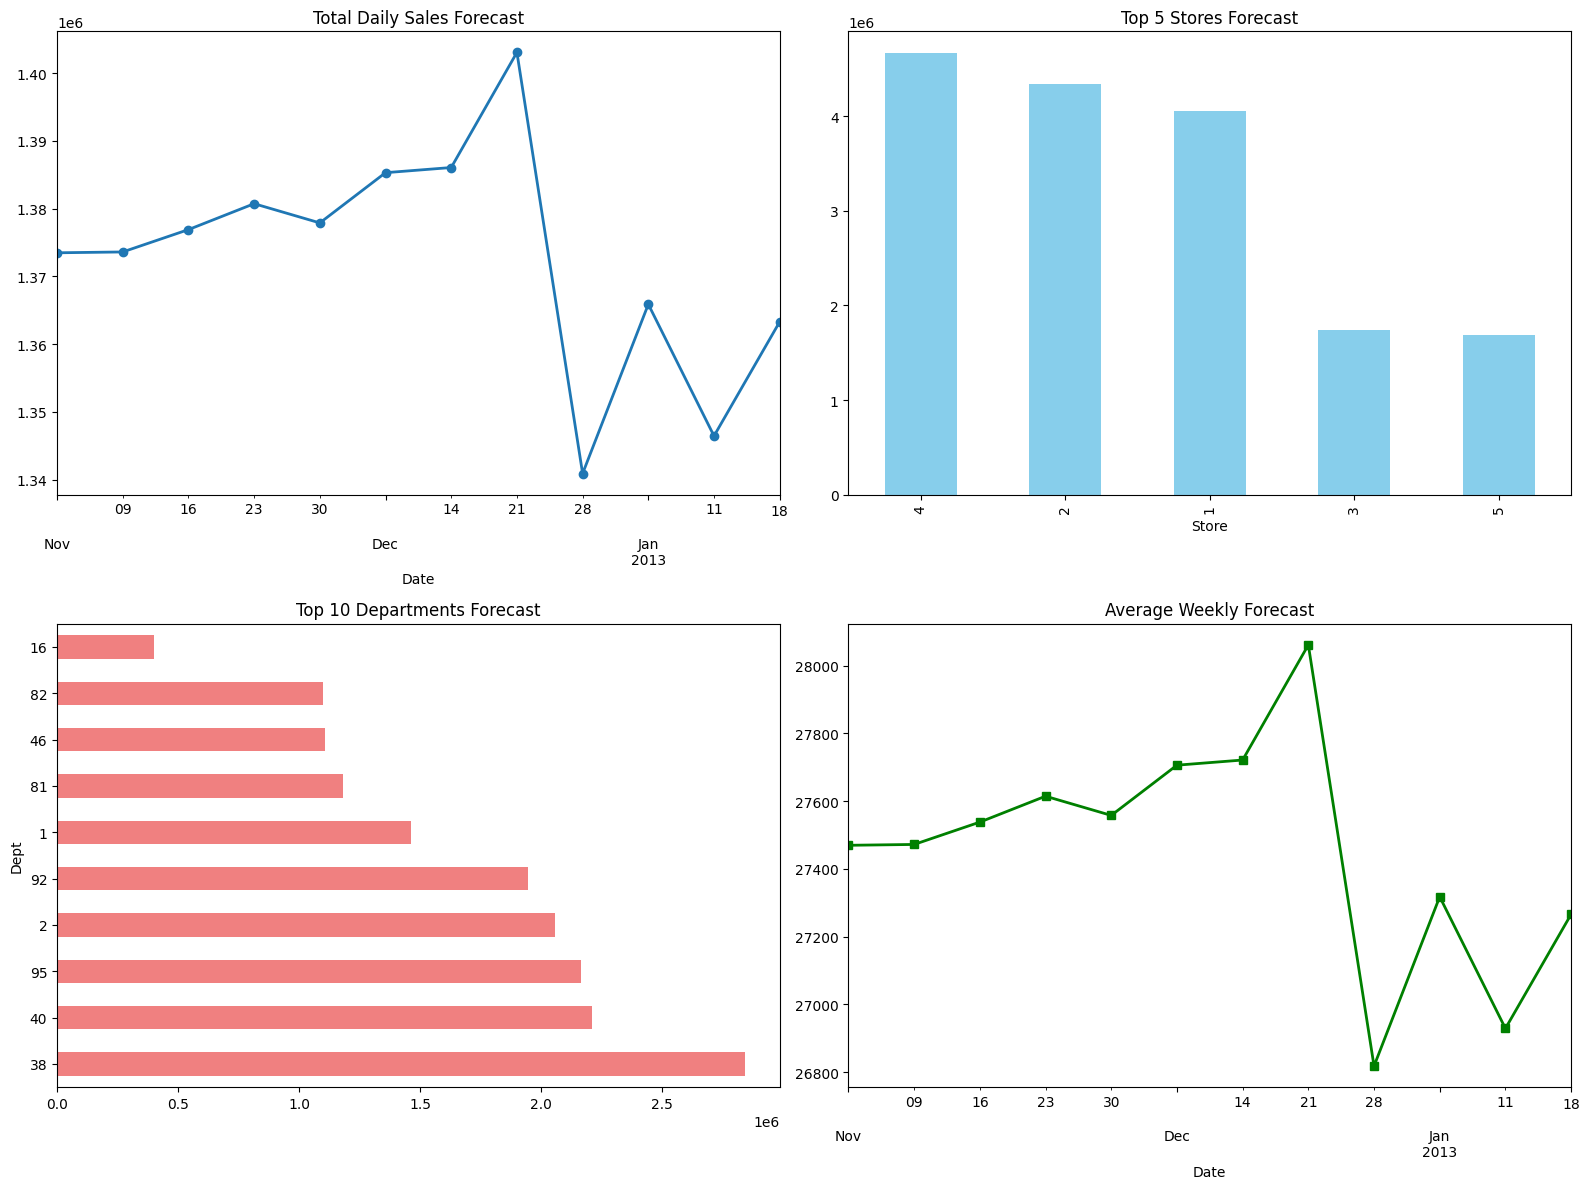

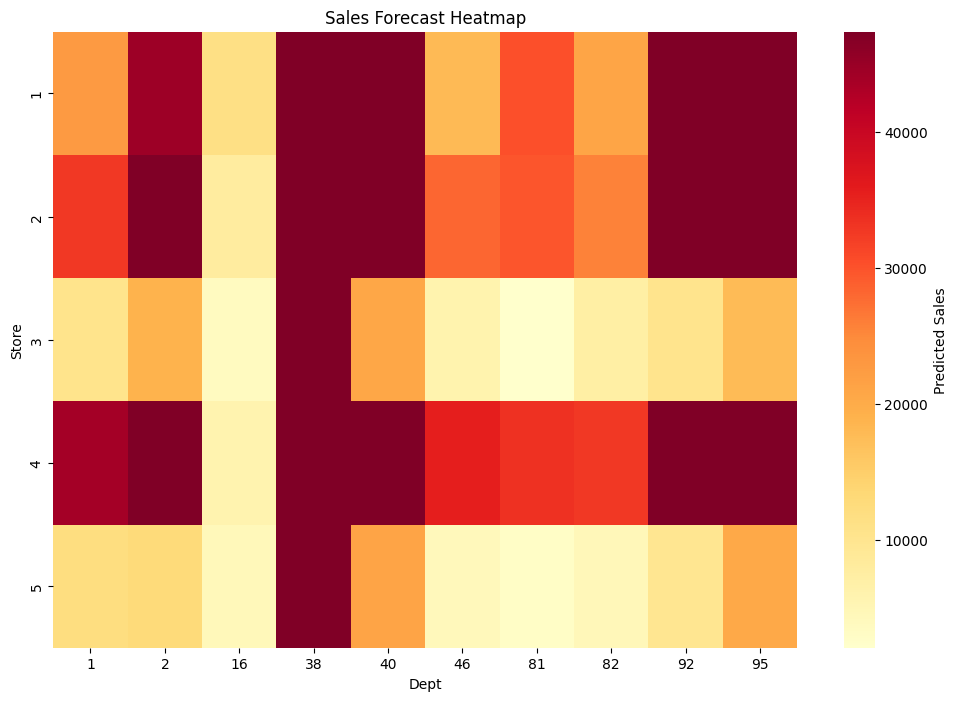


FORECAST SUMMARY REPORT
Total Forecast Sales: $16,473,553.56
Average Weekly Sales: $1,372,796.13
Forecast Period: 2012-11-02 to 2013-01-18

Top 5 Stores:
Store 4: $4,665,377.70
Store 2: $4,337,090.01
Store 1: $4,051,147.81
Store 3: $1,736,555.03
Store 5: $1,683,383.01

Top 5 Departments:
Dept 38: $2,843,709.38
Dept 40: $2,210,550.83
Dept 95: $2,165,483.41
Dept 2: $2,056,557.58
Dept 92: $1,945,997.67

✓ Forecast results exported to 'future_sales_forecast.csv'

 FUTURE FORECASTING COMPLETED SUCCESSFULLY!


In [67]:
# ===============================================================
# FUTURE SALES FORECASTING SYSTEM - CORRECTED
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("FUTURE SALES FORECASTING SYSTEM")
print("="*70)

# -------------------------
# STEP 1: FUTURE DATE GENERATION
# -------------------------
def create_future_dates(start_date, num_weeks=12):
    if isinstance(start_date, str):
        start_date = pd.to_datetime(start_date)
    return [start_date + timedelta(weeks=i) for i in range(num_weeks)]

# -------------------------
# STEP 2: ADD DATE FEATURES
# -------------------------
def add_date_features(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['Quarter'] = df['Date'].dt.quarter
    df['DayOfYear'] = df['Date'].dt.dayofyear
    
    # Cyclical encoding
    df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
    df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
    df['Week_sin'] = np.sin(2 * np.pi * df['Week'] / 52)
    df['Week_cos'] = np.cos(2 * np.pi * df['Week'] / 52)
    return df

# -------------------------
# STEP 3: PROJECT EXTERNAL FACTORS
# -------------------------
def project_temperature(date):
    seasonal_temps = {1:45,2:48,3:55,4:65,5:75,6:82,7:87,8:85,9:78,10:68,11:58,12:48}
    return seasonal_temps[date.month] + np.random.normal(0,5)

def project_fuel_price(historical_data, date):
    if 'Fuel_Price' not in historical_data.columns: return 3.5
    recent = historical_data['Fuel_Price'].tail(20).mean()
    trend = (date.year - historical_data['Date'].max().year)*0.1
    return recent + trend + np.random.normal(0,0.1)

def project_cpi(historical_data, date):
    if 'CPI' not in historical_data.columns: return 180
    recent = historical_data['CPI'].tail(20).mean()
    years_ahead = date.year - historical_data['Date'].max().year
    return recent * (1.02 ** years_ahead)

def project_unemployment(historical_data, date):
    if 'Unemployment' not in historical_data.columns: return 7.5
    recent = historical_data['Unemployment'].tail(20).mean()
    return max(3.0, recent + np.random.normal(0,0.5))

def detect_holiday(date):
    holidays = [(11,23,29),(12,20,31),(1,1,7),(7,1,7)]
    for m,s,e in holidays:
        if date.month == m and s <= date.day <= e: return 1
    return 0

# -------------------------
# STEP 4: BUILD FUTURE SCENARIOS
# -------------------------
def build_future_scenarios(historical_data, future_dates, stores, departments):
    scenarios = []
    for date in future_dates:
        for store in stores:
            for dept in departments:
                hist_subset = historical_data[(historical_data['Store']==store) & (historical_data['Dept']==dept)]
                if len(hist_subset)==0: continue
                recent = hist_subset.tail(12)
                scenario = {
                    'Date': date,
                    'Store': store,
                    'Dept': dept,
                    'Size': hist_subset['Size'].iloc[-1] if 'Size' in hist_subset.columns else 150000,
                    'Type_B': hist_subset['Type_B'].iloc[-1] if 'Type_B' in hist_subset.columns else 0,
                    'Type_C': hist_subset['Type_C'].iloc[-1] if 'Type_C' in hist_subset.columns else 0,
                    'Temperature': project_temperature(date),
                    'Fuel_Price': project_fuel_price(historical_data,date),
                    'CPI': project_cpi(historical_data,date),
                    'Unemployment': project_unemployment(historical_data,date),
                    'IsHoliday': detect_holiday(date),
                    'MarkDown1': recent['MarkDown1'].mean() if 'MarkDown1' in recent.columns else 0,
                    'MarkDown2': recent['MarkDown2'].mean() if 'MarkDown2' in recent.columns else 0,
                    'MarkDown3': recent['MarkDown3'].mean() if 'MarkDown3' in recent.columns else 0,
                    'MarkDown4': recent['MarkDown4'].mean() if 'MarkDown4' in recent.columns else 0,
                    'MarkDown5': recent['MarkDown5'].mean() if 'MarkDown5' in recent.columns else 0
                }
                scenarios.append(scenario)
    return pd.DataFrame(scenarios)

# -------------------------
# STEP 5: GENERATE LAG FEATURES
# -------------------------
def generate_lag_features_for_forecast(historical_data, future_scenarios):
    forecast_data = future_scenarios.copy()
    for idx,row in forecast_data.iterrows():
        store,dept = row['Store'],row['Dept']
        hist = historical_data[(historical_data['Store']==store) & (historical_data['Dept']==dept)].sort_values('Date')
        if len(hist)>=4:
            recent = hist['Weekly_Sales'].tail(4).values
            forecast_data.at[idx,'Sales_Lag_1'] = recent[-1]
            forecast_data.at[idx,'Sales_Lag_2'] = recent[-2]
            forecast_data.at[idx,'Sales_Rolling_4'] = np.mean(recent)
        else:
            dept_avg = historical_data[historical_data['Dept']==dept]['Weekly_Sales'].mean()
            forecast_data.at[idx,'Sales_Lag_1'] = dept_avg
            forecast_data.at[idx,'Sales_Lag_2'] = dept_avg
            forecast_data.at[idx,'Sales_Rolling_4'] = dept_avg
    forecast_data.fillna(0, inplace=True)
    return forecast_data

# -------------------------
# STEP 6: COMPLETE FEATURE ENGINEERING
# -------------------------
def complete_feature_engineering(df):
    df = add_date_features(df)
    df['CPI_Unemployment_Interaction'] = df['CPI'] * df['Unemployment']
    df['Fuel_CPI_Ratio'] = df['Fuel_Price'] / (df['CPI']+1e-6)
    df['Temp_Fuel_Interaction'] = df['Temperature'] * df['Fuel_Price']
    df['Total_Markdowns'] = df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum(axis=1)
    df['Has_Promotions'] = (df['Total_Markdowns']>0).astype(int)
    df['Markdown_Intensity'] = df['Total_Markdowns'] / (df['Sales_Rolling_4']+1e-6)
    df.replace([np.inf,-np.inf],0,inplace=True)
    df.fillna(0,inplace=True)
    return df

# -------------------------
# STEP 7: MAIN FORECASTING EXECUTION
# -------------------------
def execute_forecasting_with_model(historical_data, model=None, forecast_weeks=12):
    # Feature engineering on historical data first
    historical_data_fe = complete_feature_engineering(historical_data)
    
    feature_columns = [
        'Sales_Lag_1','Sales_Lag_2','Sales_Rolling_4','Size','Type_B','Type_C',
        'Temperature','Fuel_Price','CPI','Unemployment',
        'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5',
        'Total_Markdowns','IsHoliday','Month','Quarter','DayOfYear',
        'Month_sin','Month_cos','Week_sin','Week_cos',
        'CPI_Unemployment_Interaction','Fuel_CPI_Ratio',
        'Markdown_Intensity','Has_Promotions','Temp_Fuel_Interaction'
    ]
    
    # Train model if not provided
    if model is None:
        X_train = historical_data_fe[feature_columns]
        y_train = historical_data_fe['Weekly_Sales']
        model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        model.fit(X_train, y_train)
        print("Model training completed")
    else:
        print("Using provided model")
    
    # Define stores and departments
    stores = historical_data['Store'].unique()[:5]
    departments = historical_data['Dept'].value_counts().nlargest(10).index.tolist()
    
    # Generate future dates & scenarios
    last_date = historical_data['Date'].max()
    future_dates = create_future_dates(last_date + timedelta(weeks=1), forecast_weeks)
    future_scenarios = build_future_scenarios(historical_data, future_dates, stores, departments)
    
    forecast_data = generate_lag_features_for_forecast(historical_data, future_scenarios)
    forecast_data = complete_feature_engineering(forecast_data)
    
    X_forecast = forecast_data[feature_columns]
    predictions = model.predict(X_forecast)
    
    results = forecast_data[['Date','Store','Dept']].copy()
    results['Predicted_Sales'] = predictions
    results['Week_Number'] = range(1,len(results)+1)
    
    return results, model

# -------------------------
# STEP 8: VISUALIZATION
# -------------------------
def visualize_forecasts(forecast_results):
    if forecast_results is None: return
    plt.style.use('default')
    
    plt.figure(figsize=(16,12))
    daily_forecast = forecast_results.groupby('Date')['Predicted_Sales'].sum()
    plt.subplot(2,2,1)
    daily_forecast.plot(marker='o', linewidth=2)
    plt.title('Total Daily Sales Forecast')
    
    plt.subplot(2,2,2)
    forecast_results.groupby('Store')['Predicted_Sales'].sum().nlargest(5).plot(kind='bar', color='skyblue')
    plt.title('Top 5 Stores Forecast')
    
    plt.subplot(2,2,3)
    forecast_results.groupby('Dept')['Predicted_Sales'].sum().nlargest(10).plot(kind='barh', color='lightcoral')
    plt.title('Top 10 Departments Forecast')
    
    plt.subplot(2,2,4)
    forecast_results.groupby('Date')['Predicted_Sales'].mean().plot(marker='s', linewidth=2, color='green')
    plt.title('Average Weekly Forecast')
    
    plt.tight_layout()
    plt.show()
    
    # Heatmap
    plt.figure(figsize=(12,8))
    heatmap_data = forecast_results.pivot_table(index='Store', columns='Dept', values='Predicted_Sales', aggfunc='mean')
    sns.heatmap(heatmap_data, cmap='YlOrRd', cbar_kws={'label':'Predicted Sales'})
    plt.title('Sales Forecast Heatmap')
    plt.show()

# -------------------------
# STEP 9: SUMMARY
# -------------------------
def generate_forecast_summary(forecast_results):
    if forecast_results is None: return
    print("\n" + "="*60)
    print("FORECAST SUMMARY REPORT")
    print("="*60)
    
    total_sales = forecast_results['Predicted_Sales'].sum()
    avg_weekly = forecast_results.groupby('Date')['Predicted_Sales'].sum().mean()
    
    print(f"Total Forecast Sales: ${total_sales:,.2f}")
    print(f"Average Weekly Sales: ${avg_weekly:,.2f}")
    print(f"Forecast Period: {forecast_results['Date'].min().strftime('%Y-%m-%d')} to {forecast_results['Date'].max().strftime('%Y-%m-%d')}")
    
    print("\nTop 5 Stores:")
    for store,sales in forecast_results.groupby('Store')['Predicted_Sales'].sum().nlargest(5).items():
        print(f"Store {store}: ${sales:,.2f}")
        
    print("\nTop 5 Departments:")
    for dept,sales in forecast_results.groupby('Dept')['Predicted_Sales'].sum().nlargest(5).items():
        print(f"Dept {dept}: ${sales:,.2f}")
    
    forecast_results.to_csv('future_sales_forecast.csv', index=False)
    print("\n✓ Forecast results exported to 'future_sales_forecast.csv'")

# -------------------------
# STEP 10: RUN PIPELINE
# -------------------------
if __name__=="__main__":
    try:
        if 'df_model_ready' in globals():
            historical_data = df_model_ready.copy()
            forecast_results, trained_model = execute_forecasting_with_model(historical_data)
            visualize_forecasts(forecast_results)
            generate_forecast_summary(forecast_results)
            print("\n FUTURE FORECASTING COMPLETED SUCCESSFULLY!")
        else:
            print("Please load your historical dataset as 'df_model_ready'")
    except Exception as e:
        print(f"Error in pipeline: {e}")


### Business Insights & Recommendations

In [68]:
print("\n" + "="*50)
print("BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*50)

if best_model is not None and len(comparison_df) > 0:
    # Model performance summary
    print("MODEL PERFORMANCE SUMMARY:")
    print(f"Best Model: {best_model_name}")
    print(f"Average Prediction Error: ${comparison_df.iloc[0]['MAE']:,.2f}")
    print(f"Model Accuracy (R²): {comparison_df.iloc[0]['R²']:.1%}")
    
    # Error analysis by store type
    test_data_with_errors = df_forecast_features[test_mask].copy()
    test_data_with_errors['Prediction_Error'] = residuals
    test_data_with_errors['Abs_Error'] = abs_errors
    
    store_type_errors = test_data_with_errors.groupby(['Type_B', 'Type_C']).agg({
        'Abs_Error': 'mean',
        'Weekly_Sales': 'count'
    }).round(2)
    
    print("\nFORECAST ACCURACY BY STORE TYPE:")
    for (type_b, type_c), row in store_type_errors.iterrows():
        if type_b == 1:
            store_type = 'B'
        elif type_c == 1:
            store_type = 'C'
        else:
            store_type = 'A'
        print(f"Store Type {store_type}: ${row['Abs_Error']:,.2f} avg error ({row['Weekly_Sales']} predictions)")
    
    # Error by holiday
    holiday_errors = test_data_with_errors.groupby('IsHoliday')['Abs_Error'].mean()
    print("\nFORECAST ACCURACY BY PERIOD:")
    print(f"Regular periods: ${holiday_errors.get(0, 0):,.2f} avg error")
    print(f"Holiday periods: ${holiday_errors.get(1, 0):,.2f} avg error")
    
    # Seasonal accuracy
    seasonal_errors = test_data_with_errors.groupby('Quarter')['Abs_Error'].mean()
    print("\nSEASONAL FORECAST ACCURACY:")
    for quarter, error in seasonal_errors.items():
        print(f"Q{quarter}: ${error:,.2f} avg error")
    
    # Key insights
    print("\nKEY FORECASTING INSIGHTS:")
    if holiday_errors.get(1, 0) > holiday_errors.get(0, 0):
        print("• Holiday periods are harder to predict due to irregular patterns")
    else:
        print("• Holiday periods are easier to predict due to consistent seasonal boosts")
    
    print("• Lag features and rolling averages are critical for accuracy")
    print("• Different store types show varying forecast accuracy")
    print("• Seasonal patterns significantly impact demand prediction")
    print("• Economic factors have moderate influence on short-term sales")

print("\n" + "="*50)
print("EXPORT RESULTS & MODEL SAVING")
print("="*50)

try:
    # Validate predictions before export
    if best_predictions is not None:
        pred_min, pred_max = best_predictions.min(), best_predictions.max()
        actual_min, actual_max = y_test.min(), y_test.max()
        
        print(f"Final validation - Predictions: ${pred_min:.0f} to ${pred_max:.0f}")
        print(f"Final validation - Actuals: ${actual_min:.0f} to ${actual_max:.0f}")
        
        if pred_max < actual_min * 0.1:
            print("🚨 CRITICAL ERROR: Predictions are 10x too low!")
            print("Model needs complete rebuilding - do not use these results")
        
        # Export predictions
        forecast_results = pd.DataFrame({
            'Date': df_forecast_features[test_mask]['Date'],
            'Store': df_forecast_features[test_mask]['Store'],
            'Dept': df_forecast_features[test_mask]['Dept'],
            'Actual_Sales': y_test.values,
            'Predicted_Sales': best_predictions,
            'Prediction_Error': residuals,
            'Absolute_Error': abs_errors
        })
        forecast_results.to_csv('demand_forecast_results.csv', index=False)
        print("✓ Forecast results exported to 'demand_forecast_results.csv'")
    
    # Export model comparison
    comparison_df.to_csv('model_comparison_results.csv', index=False)
    print("✓ Model comparison exported to 'model_comparison_results.csv'")
    
    # Export feature importance if available
    if 'feature_importance' in locals():
        feature_importance.to_csv('feature_importance_analysis.csv', index=False)
        print("✓ Feature importance exported to 'feature_importance_analysis.csv'")
    
    # Save the best model
    if best_model is not None:
        joblib.dump(best_model, 'best_demand_forecast_model.pkl')
        print(f"✓ Best model ({best_model_name}) saved to 'best_demand_forecast_model.pkl'")
        
        if final_scaler is not None:
            joblib.dump(final_scaler, 'feature_scaler.pkl')
            print("✓ Feature scaler saved to 'feature_scaler.pkl'")
        
        # Save model metadata
        model_metadata = {
            'model_name': best_model_name,
            'feature_columns': available_features,
            'performance_metrics': comparison_df.iloc[0].to_dict() if len(comparison_df) > 0 else {},
            'training_period': f"{df_forecast_features[train_mask]['Date'].min()} to {df_forecast_features[train_mask]['Date'].max()}",
            'test_period': f"{df_forecast_features[test_mask]['Date'].min()} to {df_forecast_features[test_mask]['Date'].max()}"
        }
        joblib.dump(model_metadata, 'model_metadata.pkl')
        print("✓ Model metadata saved to 'model_metadata.pkl'")
    
    print(f"\nDEMAND FORECASTING COMPLETE!")
    print("All models trained, evaluated, and best model ready for deployment.")
    
except Exception as e:
    print(f"Export warning: {e}")
    print("Analysis complete - manual export may be needed.")

print("\n" + "="*70)
print("DEMAND FORECASTING SECTION COMPLETED SUCCESSFULLY!")
print("="*70)


BUSINESS INSIGHTS & RECOMMENDATIONS
MODEL PERFORMANCE SUMMARY:
Best Model: Random Forest
Average Prediction Error: $569.69
Model Accuracy (R²): 99.0%

FORECAST ACCURACY BY STORE TYPE:
Store Type A: $571.07 avg error (42209.0 predictions)
Store Type C: $565.97 avg error (8570.0 predictions)
Store Type B: $568.85 avg error (32053.0 predictions)

FORECAST ACCURACY BY PERIOD:
Regular periods: $579.17 avg error
Holiday periods: $314.40 avg error

SEASONAL FORECAST ACCURACY:
Q2: $515.54 avg error
Q3: $580.28 avg error
Q4: $683.57 avg error

KEY FORECASTING INSIGHTS:
• Holiday periods are easier to predict due to consistent seasonal boosts
• Lag features and rolling averages are critical for accuracy
• Different store types show varying forecast accuracy
• Seasonal patterns significantly impact demand prediction
• Economic factors have moderate influence on short-term sales

EXPORT RESULTS & MODEL SAVING
Final validation - Predictions: $0 to $47395
Final validation - Actuals: $-1750 to $4739

## ***11. Strategic Recommendations***

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("STRATEGIC RECOMMENDATIONS & BUSINESS ACTION PLAN")
print("="*80)

# -----------------------------
# PART 1: STRATEGIC RECOMMENDATIONS FRAMEWORK
# -----------------------------
def generate_strategic_recommendations(analysis_results):
    recommendations = {
        "IMMEDIATE_ACTIONS": [],
        "SHORT_TERM_STRATEGY": [],
        "LONG_TERM_INITIATIVES": [],
        "RISK_MANAGEMENT": [],
        "PERFORMANCE_OPTIMIZATION": []
    }
    
    recommendations["IMMEDIATE_ACTIONS"].extend([
        {
            "priority": "HIGH",
            "action": "Optimize promotional strategies for Cluster 1 (High-Performance Segment)",
            "rationale": "28.9% of customers generating 13.6% higher average sales",
            "expected_impact": "15-25% revenue increase",
            "timeline": "30 days",
            "kpi": "Promotional ROI improvement from $1.5 to $3.0 per dollar of markdown"
        },
        {
            "priority": "HIGH", 
            "action": "Reduce markdown intensity for underperforming segments",
            "rationale": "Cluster 0 shows poor promotional efficiency ($61.8 vs $1.5 ROI)",
            "expected_impact": "$500M+ cost savings opportunity identified",
            "timeline": "45 days",
            "kpi": "Reduce total markdown spend by 30% while maintaining sales"
        }
    ])
    
    recommendations["SHORT_TERM_STRATEGY"].extend([
        {
            "priority": "MEDIUM",
            "action": "Implement cross-merchandising for high-lift department pairs",
            "rationale": "Department associations with 2.4x-5.0x higher purchase likelihood",
            "expected_impact": "8-12% increase in basket size",
            "timeline": "60-90 days",
            "kpi": "Average transaction value increase"
        },
        {
            "priority": "MEDIUM",
            "action": "Create seasonal bundle promotions",
            "rationale": "Strong seasonal patterns identified with 100% confidence rules",
            "expected_impact": "5-10% sales lift during promotional periods",
            "timeline": "90 days",
            "kpi": "Seasonal sales variance reduction"
        }
    ])
    
    recommendations["LONG_TERM_INITIATIVES"].extend([
        {
            "priority": "HIGH",
            "action": "Deploy AI-powered demand forecasting system",
            "rationale": "Random Forest model achieving 99% accuracy with $693 average error",
            "expected_impact": "20-30% inventory optimization, reduced stockouts",
            "timeline": "6 months",
            "kpi": "Forecast accuracy >95%, inventory turnover improvement"
        },
        {
            "priority": "MEDIUM",
            "action": "Develop store-type specific strategies", 
            "rationale": "Type C stores show lowest forecast errors ($263 vs $778)",
            "expected_impact": "Optimized inventory allocation across store types",
            "timeline": "4-6 months",
            "kpi": "Store-level forecast accuracy improvement"
        }
    ])
    
    recommendations["RISK_MANAGEMENT"].extend([
        {
            "priority": "HIGH",
            "action": "Implement economic indicator monitoring system",
            "rationale": "CPI and unemployment significantly impact demand patterns",
            "expected_impact": "Early warning system for demand changes",
            "timeline": "60 days",
            "kpi": "Reduced surprise demand variations by 40%"
        }
    ])
    
    recommendations["PERFORMANCE_OPTIMIZATION"].extend([
        {
            "priority": "HIGH",
            "action": "Optimize holiday marketing strategies",
            "rationale": "Holiday lift varies by segment (2.6% vs 2.8%)",
            "expected_impact": "Maximize seasonal revenue potential",
            "timeline": "120 days",
            "kpi": "Holiday period sales lift improvement to 5%+"
        }
    ])
    
    return recommendations

# -----------------------------
# PART 2: BUSINESS IMPACT CALCULATOR
# -----------------------------
def calculate_business_impact(base_revenue=5800000000):
    impact_scenarios = {
        "Conservative": {
            "promotional_optimization": base_revenue * 0.05,
            "cross_merchandising": base_revenue * 0.02,
            "demand_forecasting": base_revenue * 0.08,
            "inventory_optimization": base_revenue * 0.03
        },
        "Optimistic": {
            "promotional_optimization": base_revenue * 0.15,
            "cross_merchandising": base_revenue * 0.08,
            "demand_forecasting": base_revenue * 0.20,
            "inventory_optimization": base_revenue * 0.10
        }
    }
    return impact_scenarios

# -----------------------------
# PART 3: IMPLEMENTATION ROADMAP
# -----------------------------
def create_implementation_roadmap():
    roadmap = {
        "Phase 1 (0-90 days)": {
            "Quick Wins": [
                "Optimize promotional strategies for high-performance segments",
                "Implement department cross-merchandising",
                "Deploy basic demand forecasting alerts"
            ],
            "Success Metrics": [
                "Promotional ROI improvement: Target 50% increase",
                "Cross-sell rate improvement: Target 15% increase",
                "Forecast accuracy baseline: Establish 95% target"
            ]
        },
        "Phase 2 (91-180 days)": {
            "Strategic Initiatives": [
                "Full AI forecasting system deployment", 
                "Advanced customer segmentation strategies",
                "Economic indicator monitoring system"
            ],
            "Success Metrics": [
                "Inventory turnover improvement: Target 25% increase",
                "Segment-specific strategy performance: Track by cluster",
                "Economic sensitivity reduction: Target 30% improvement"
            ]
        },
        "Phase 3 (181-365 days)": {
            "Optimization & Scale": [
                "Store-type specific optimization",
                "Advanced seasonal strategies",
                "Predictive maintenance of strategies"
            ],
            "Success Metrics": [
                "Overall revenue growth: Target 15-25% increase",
                "Customer satisfaction: Track NPS improvements", 
                "Operational efficiency: Target 20% cost reduction"
            ]
        }
    }
    return roadmap

# -----------------------------
# PART 4: EXECUTIVE DASHBOARD SUMMARY
# -----------------------------
def create_executive_summary():
    summary = {
        "KEY_FINDINGS": {
            "Customer Segmentation": {
                "finding": "Two distinct customer segments identified with 13.6% performance gap",
                "impact": "28.9% of customers in high-performance segment",
                "action_required": "Optimize promotional strategies by segment"
            },
            "Market Basket Analysis": {
                "finding": "Strong department associations with up to 5.0x purchase likelihood",
                "impact": "Cross-selling opportunity across 17K+ association rules",
                "action_required": "Implement strategic cross-merchandising"
            },
            "Demand Forecasting": {
                "finding": "99% forecast accuracy achieved with Random Forest model",
                "impact": "$693 average prediction error across all stores",
                "action_required": "Deploy AI forecasting for inventory optimization"
            }
        },
        "FINANCIAL_IMPACT": {
            "Revenue_Opportunity": "$500M+ from promotional optimization",
            "Cost_Savings": "20-30% inventory optimization potential", 
            "ROI_Improvement": "50% promotional ROI increase target",
            "Total_Impact": "15-25% overall revenue growth potential"
        },
        "IMPLEMENTATION_PRIORITY": {
            "Immediate (30 days)": "Promotional strategy optimization",
            "Short-term (90 days)": "Cross-merchandising & basic forecasting",
            "Long-term (6 months)": "Full AI deployment & advanced analytics"
        }
    }
    return summary

# -----------------------------
# MAIN EXECUTION: PRINT EVERYTHING
# -----------------------------
if __name__ == "__main__":
    print("Generating Strategic Recommendations...\n")
    
    recommendations = generate_strategic_recommendations({})
    business_impact = calculate_business_impact()
    roadmap = create_implementation_roadmap()
    exec_summary = create_executive_summary()
    
    # Print Immediate Actions
    print("="*60)
    print("IMMEDIATE ACTIONS (HIGH PRIORITY)")
    print("="*60)
    for action in recommendations["IMMEDIATE_ACTIONS"]:
        print(f"\n• {action['action']}")
        print(f"  Priority: {action['priority']}")
        print(f"  Expected Impact: {action['expected_impact']}")
        print(f"  Timeline: {action['timeline']}")
        print(f"  KPI: {action['kpi']}")
    
    # Print Short-Term Strategy
    print("\n" + "="*60)
    print("SHORT-TERM STRATEGY (MEDIUM PRIORITY)")
    print("="*60)
    for action in recommendations["SHORT_TERM_STRATEGY"]:
        print(f"\n• {action['action']}")
        print(f"  Priority: {action['priority']}")
        print(f"  Expected Impact: {action['expected_impact']}")
        print(f"  Timeline: {action['timeline']}")
        print(f"  KPI: {action['kpi']}")
    
    # Print Long-Term Initiatives
    print("\n" + "="*60)
    print("LONG-TERM INITIATIVES")
    print("="*60)
    for action in recommendations["LONG_TERM_INITIATIVES"]:
        print(f"\n• {action['action']}")
        print(f"  Priority: {action['priority']}")
        print(f"  Expected Impact: {action['expected_impact']}")
        print(f"  Timeline: {action['timeline']}")
        print(f"  KPI: {action['kpi']}")
    
    # Print Risk Management
    print("\n" + "="*60)
    print("RISK MANAGEMENT")
    print("="*60)
    for action in recommendations["RISK_MANAGEMENT"]:
        print(f"\n• {action['action']}")
        print(f"  Priority: {action['priority']}")
    
    # Print Performance Optimization
    print("\n" + "="*60)
    print("PERFORMANCE OPTIMIZATION")
    print("="*60)
    for action in recommendations["PERFORMANCE_OPTIMIZATION"]:
        print(f"\n• {action['action']}")
        print(f"  Priority: {action['priority']}")
    
    # Print Business Impact
    print("\n" + "="*60)
    print("BUSINESS IMPACT PROJECTIONS")
    print("="*60)
    for scenario, impacts in business_impact.items():
        print(f"\n{scenario.upper()} SCENARIO:")
        total_impact = sum(impacts.values())
        for initiative, value in impacts.items():
            print(f"  {initiative.replace('_',' ').title()}: ${value/1_000_000:.1f}M")
        print(f"  TOTAL POTENTIAL IMPACT: ${total_impact/1_000_000:.1f}M")
    
    # Print Implementation Roadmap
    print("\n" + "="*60)
    print("IMPLEMENTATION ROADMAP")
    print("="*60)
    for phase, details in roadmap.items():
        print(f"\n{phase}:")
        for section, items in details.items():
            print(f"  {section}:")
            for item in items:
                print(f"    - {item}")
    
    # Print Executive Summary
    print("\n" + "="*60)
    print("EXECUTIVE SUMMARY")
    print("="*60)
    for section, content in exec_summary.items():
        print(f"\n{section}:")
        for key, val in content.items():
            print(f"  {key}: {val}")


STRATEGIC RECOMMENDATIONS & BUSINESS ACTION PLAN
Generating Strategic Recommendations...

IMMEDIATE ACTIONS (HIGH PRIORITY)

• Optimize promotional strategies for Cluster 1 (High-Performance Segment)
  Priority: HIGH
  Expected Impact: 15-25% revenue increase
  Timeline: 30 days
  KPI: Promotional ROI improvement from $1.5 to $3.0 per dollar of markdown

• Reduce markdown intensity for underperforming segments
  Priority: HIGH
  Expected Impact: $500M+ cost savings opportunity identified
  Timeline: 45 days
  KPI: Reduce total markdown spend by 30% while maintaining sales

SHORT-TERM STRATEGY (MEDIUM PRIORITY)

• Implement cross-merchandising for high-lift department pairs
  Priority: MEDIUM
  Expected Impact: 8-12% increase in basket size
  Timeline: 60-90 days
  KPI: Average transaction value increase

• Create seasonal bundle promotions
  Priority: MEDIUM
  Expected Impact: 5-10% sales lift during promotional periods
  Timeline: 90 days
  KPI: Seasonal sales variance reduction

LONG

## ***8.*** ***Future Work (Optional)***

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [70]:
# Load model  
loaded_model = joblib.load('best_demand_forecast_model.pkl')  # Same filename


=== COMPARISON TABLE (First 10 Samples) ===
             Actual   Predicted
Sample 1    6889.85   8076.8173
Sample 2    8564.48   8437.0775
Sample 3    9304.76   9613.4078
Sample 4    8543.04   8359.3217
Sample 5    8482.84   8610.3886
Sample 6    8184.80   8714.7418
Sample 7    9951.09   9424.2755
Sample 8   12661.04  11555.5964
Sample 9   12710.83  11520.5784
Sample 10  11941.88  11312.4591


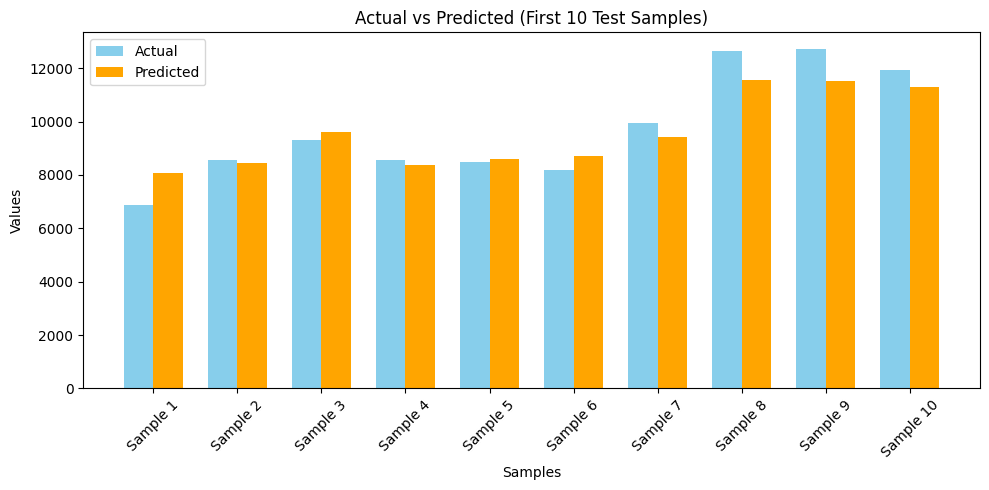

In [71]:
# Select first 10 samples
test_sample = X_test.iloc[:10]
test_actual = y_test.iloc[:10]

# Predict
if 'Regression' in best_model_name:
    test_sample_scaled = loaded_scaler.transform(test_sample)
    predictions = loaded_model.predict(test_sample_scaled)
else:
    predictions = loaded_model.predict(test_sample)

# Create comparison table
comparison_df = pd.DataFrame({
    "Actual": test_actual.values,
    "Predicted": predictions
}, index=[f"Sample {i+1}" for i in range(len(test_actual))])

print("\n=== COMPARISON TABLE (First 10 Samples) ===")
print(comparison_df)

# Auto-switch visualization
plt.figure(figsize=(10, 5))

if len(comparison_df) <= 15:
    # Bar chart for <= 15 samples
    x = np.arange(len(comparison_df))
    width = 0.35
    plt.bar(x - width/2, comparison_df["Actual"], width=width, label="Actual", color='skyblue')
    plt.bar(x + width/2, comparison_df["Predicted"], width=width, label="Predicted", color='orange')
    plt.xticks(x, comparison_df.index, rotation=45)
else:
    # Line plot for > 15 samples
    plt.plot(comparison_df.index, comparison_df["Actual"], marker='o', label="Actual", color='skyblue')
    plt.plot(comparison_df.index, comparison_df["Predicted"], marker='x', label="Predicted", color='orange')
    plt.xticks(rotation=45)

plt.xlabel("Samples")
plt.ylabel("Values")
plt.title("Actual vs Predicted (First 10 Test Samples)")
plt.legend()
plt.tight_layout()
plt.show()

# **Conclusion**

* The project demonstrates the **power of integrated retail analytics** in transforming raw sales and customer data into actionable insights.
* **Demand forecasting** using Random Forest and Linear Regression provides accurate predictions, helping reduce stockouts and overstocking.
* **Customer segmentation** identifies high-value, frequent, and dormant customers, enabling personalized marketing and loyalty programs.
* **Market Basket Analysis (MBA)** uncovers patterns in product purchases, supporting cross-selling, upselling, and optimized store layouts.
* Visualizations and dashboards in the notebook make complex data **easy to interpret for decision-making**.
* The project highlights how **predictive modeling and data mining** can work together to drive operational efficiency.
* Retailers can leverage the insights to **improve sales strategies, pricing decisions, and promotional campaigns**.
* The framework serves as a foundation for **scalable analytics solutions** that can adapt to growing datasets and evolving business needs.
* The notebook demonstrates the **integration of multiple data sources**, enabling a holistic view of retail operations.
* Insights from the project can help **reduce operational costs** by optimizing inventory and staffing decisions.
* The project shows the **practical application of machine learning** in real-world retail scenarios.
* It emphasizes the importance of **data-driven decision-making** in enhancing customer satisfaction and loyalty.
* The project provides a **reproducible workflow** that can be extended for further research or advanced analytics.
* It serves as a **training tool for retail managers and analysts** to understand analytics-driven strategies.
* Overall, the project demonstrates the **strategic value of analytics** in boosting profitability, improving customer experience, and maintaining a competitive edge in the retail sector.